# EDA Bank Loan Case Study

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Warnings

In [5]:
# Suppressing warnings to enhance readability
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Notebook settings to display all rows and columns for improved data clarity
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1500)
pd.set_option('display.expand_frame_repr', False)

In [7]:
columns_description = pd.read_csv('columns_description.csv', encoding='cp1252')
columns_description.head()

Unnamed: 0             Table                 Row                                        Description Special
0           1  application_data          SK_ID_CURR                           ID of loan in our sample     NaN
1           2  application_data              TARGET  Target variable (1 - client with payment diffi...     NaN
2           5  application_data  NAME_CONTRACT_TYPE        Identification if loan is cash or revolving     NaN
3           6  application_data         CODE_GENDER                               Gender of the client     NaN
4           7  application_data        FLAG_OWN_CAR                      Flag if the client owns a car     NaN

In [8]:
# description of application_data
columns_description[columns_description['Table']=='application_data']

Unnamed: 0             Table                           Row                                        Description                                Special
0             1  application_data                    SK_ID_CURR                           ID of loan in our sample                                    NaN
1             2  application_data                        TARGET  Target variable (1 - client with payment diffi...                                    NaN
2             5  application_data            NAME_CONTRACT_TYPE        Identification if loan is cash or revolving                                    NaN
3             6  application_data                   CODE_GENDER                               Gender of the client                                    NaN
4             7  application_data                  FLAG_OWN_CAR                      Flag if the client owns a car                                    NaN
5             8  application_data               FLAG_OWN_REALTY                Flag if client owns a house or flat                                    NaN
6             9  application_data                  CNT_CHILDREN                  Number of children the client has                                    NaN
7            10  application_data              AMT_INCOME_TOTAL                               Income of the client                                    NaN
8            11  application_data                    AMT_CREDIT                          Credit amount of the loan                                    NaN
9            12  application_data                   AMT_ANNUITY                                       Loan annuity                                    NaN
10           13  application_data               AMT_GOODS_PRICE  For consumer loans it is the price of the good...                                    NaN
11           14  application_data               NAME_TYPE_SUITE  Who was accompanying client when he was applyi...                                    NaN
12           15  application_data              NAME_INCOME_TYPE  Clients income type (businessman, working, mat...                                    NaN
13           16  application_data           NAME_EDUCATION_TYPE     Level of highest education the client achieved                                    NaN
14           17  application_data            NAME_FAMILY_STATUS                        Family status of the client                                    NaN
15           18  application_data             NAME_HOUSING_TYPE  What is the housing situation of the client (r...                                    NaN
16           19  application_data    REGION_POPULATION_RELATIVE  Normalized population of region where client l...                            normalized 
17           20  application_data                    DAYS_BIRTH    Client's age in days at the time of application  time only relative to the application
18           21  application_data                 DAYS_EMPLOYED  How many days before the application the perso...  time only relative to the application
19           22  application_data             DAYS_REGISTRATION  How many days before the application did clien...  time only relative to the application
20           23  application_data               DAYS_ID_PUBLISH  How many days before the application did clien...  time only relative to the application
21           24  application_data                   OWN_CAR_AGE                                Age of client's car                                    NaN
22           25  application_data                    FLAG_MOBIL      Did client provide mobile phone (1=YES, 0=NO)                                    NaN
23           26  application_data                FLAG_EMP_PHONE        Did client provide work phone (1=YES, 0=NO)                                    NaN
24           27  application_data               FLAG_WORK_PHONE        Did client provide home phone (1=YES, 0=NO)                                    NaN
2

In [9]:
# description of previous application_data
columns_description[columns_description['Table'] =='previous_application.csv']

Unnamed: 0                     Table                          Row                                        Description                                Special
122         176  previous_application.csv                  SK_ID_PREV   ID of previous credit in Home credit related t...                                 hashed
123         177  previous_application.csv                   SK_ID_CURR                           ID of loan in our sample                                 hashed
124         178  previous_application.csv           NAME_CONTRACT_TYPE  Contract product type (Cash loan, consumer loa...                                    NaN
125         179  previous_application.csv                  AMT_ANNUITY                    Annuity of previous application                                    NaN
126         180  previous_application.csv              AMT_APPLICATION  For how much credit did client ask on the prev...                                    NaN
127         181  previous_application.csv                   AMT_CREDIT  Final credit amount on the previous applicatio...                                    NaN
128         182  previous_application.csv             AMT_DOWN_PAYMENT           Down payment on the previous application                                    NaN
129         183  previous_application.csv              AMT_GOODS_PRICE  Goods price of good that client asked for (if ...                                    NaN
130         184  previous_application.csv   WEEKDAY_APPR_PROCESS_START  On which day of the week did the client apply ...                                    NaN
131         185  previous_application.csv      HOUR_APPR_PROCESS_START  Approximately at what day hour did the client ...                                rounded
132         186  previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT  Flag if it was last application for the previo...                                    NaN
133         187  previous_application.csv       NFLAG_LAST_APPL_IN_DAY  Flag if the application was the last applicati...                                    NaN
134         188  previous_application.csv             NFLAG_MICRO_CASH                            Flag Micro finance loan                                    NaN
135         189  previous_application.csv            RATE_DOWN_PAYMENT    Down payment rate normalized on previous credit                             normalized
136         190  previous_application.csv        RATE_INTEREST_PRIMARY        Interest rate normalized on previous credit                             normalized
137         191  previous_application.csv     RATE_INTEREST_PRIVILEGED        Interest rate normalized on previous credit                             normalized
138         192  previous_application.csv       NAME_CASH_LOAN_PURPOSE                           Purpose of the cash loan                                    NaN
139         193  previous_application.csv         NAME_CONTRACT_STATUS  Contract status (approved, cancelled, ...) of ...                                    NaN
140         194  previous_application.csv                DAYS_DECISION  Relative to current application when was the d...  time only relative to the application
141         195  previous_application.csv            NAME_PAYMENT_TYPE  Payment method that client chose to pay for th...                                    NaN
142         196  previous_application.csv           CODE_REJECT_REASON          Why was the previous application rejected                                    NaN
143         197  previous_application.csv              NAME_TYPE_SUITE  Who accompanied client when applying for the p...                                    NaN
144         198  previous_application.csv             NAME_CLIENT_TYPE  Was the client old or new client when applying...                                    NaN
145         199  previous_application.csv          NAME_GOODS_CATEGORY  What kind of goods did the client apply for in...                    

 ## Import Datasets

In [10]:
# import application_data.csv
application_data_df = pd.read_csv('application_data.csv')

## Understanding the application_data_df

In [11]:
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [12]:
# lets look at the data set shape
application_data_df.shape

(307511, 122)

####  application_data_df have 122 column and 307511 rows

In [13]:
# Exploring the Numeric Variables in application data set:
application_data_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [14]:
# Gathering info for the data types across all columns:
application_data_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

##### The dataset consists of 122 columns with diverse data types, including object, integer, and float, spanning across 305,711 rows.






### Observations:

-The dataset encompasses  307,511 rows and 122 columns.

-Certain columns contain negative and positive values, including days. Remedial action is needed.

-Several columns feature exceedingly high values, particularly those associated with amounts or prices. Standardization will be addressed later in the notebook.

###  Data Cleaning 

In [15]:
# checking for null values in application_data_df

null_data = round((application_data_df.isnull().sum()*100/len(application_data_df)),3)
null_data.sort_values(ascending = False)

COMMONAREA_MEDI                 69.872
COMMONAREA_AVG                  69.872
COMMONAREA_MODE                 69.872
NONLIVINGAPARTMENTS_MODE        69.433
NONLIVINGAPARTMENTS_AVG         69.433
NONLIVINGAPARTMENTS_MEDI        69.433
FONDKAPREMONT_MODE              68.386
LIVINGAPARTMENTS_MODE           68.355
LIVINGAPARTMENTS_AVG            68.355
LIVINGAPARTMENTS_MEDI           68.355
FLOORSMIN_AVG                   67.849
FLOORSMIN_MODE                  67.849
FLOORSMIN_MEDI                  67.849
YEARS_BUILD_MEDI                66.498
YEARS_BUILD_MODE                66.498
YEARS_BUILD_AVG                 66.498
OWN_CAR_AGE                     65.991
LANDAREA_MEDI                   59.377
LANDAREA_MODE                   59.377
LANDAREA_AVG                    59.377
BASEMENTAREA_MEDI               58.516
BASEMENTAREA_AVG                58.516
BASEMENTAREA_MODE               58.516
EXT_SOURCE_1                    56.381
NONLIVINGAREA_MODE              55.179
NONLIVINGAREA_AVG        

In [16]:
# Handling Null Values Exceeding 35%: 
null_values_above_35 = null_data[null_data>35]
print(null_values_above_35);

OWN_CAR_AGE                     65.991
EXT_SOURCE_1                    56.381
APARTMENTS_AVG                  50.750
BASEMENTAREA_AVG                58.516
YEARS_BEGINEXPLUATATION_AVG     48.781
YEARS_BUILD_AVG                 66.498
COMMONAREA_AVG                  69.872
ELEVATORS_AVG                   53.296
ENTRANCES_AVG                   50.349
FLOORSMAX_AVG                   49.761
FLOORSMIN_AVG                   67.849
LANDAREA_AVG                    59.377
LIVINGAPARTMENTS_AVG            68.355
LIVINGAREA_AVG                  50.193
NONLIVINGAPARTMENTS_AVG         69.433
NONLIVINGAREA_AVG               55.179
APARTMENTS_MODE                 50.750
BASEMENTAREA_MODE               58.516
YEARS_BEGINEXPLUATATION_MODE    48.781
YEARS_BUILD_MODE                66.498
COMMONAREA_MODE                 69.872
ELEVATORS_MODE                  53.296
ENTRANCES_MODE                  50.349
FLOORSMAX_MODE                  49.761
FLOORSMIN_MODE                  67.849
LANDAREA_MODE            

In [17]:
print(len(null_values_above_35), "Columns with null Values Exceeding 35%");

49 Columns with null Values Exceeding 35%



### Observation:

A total of 49 columns exhibit null values exceeding 35%. 

In [18]:
# Removing all these columns
null_values_above_35.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTAT

In [19]:
# droping the columns which exceedes null value more then 35%
application_data_df = application_data_df[application_data_df.columns.difference(null_values_above_35.index)]

In [20]:
# check the shape
application_data_df.shape

(307511, 73)

- 73 columns are left droping the columns

### Analyzing and Removing unrequired columns

In [21]:
application_data_df.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_

- "EXT_SOURCE_3" and "EXT_SOURCE_2," columns contain normalized values, we will now check the correlation between these 2 columns with "TARGET" column by plotting a heatmap.

In [22]:
# Storing normalized Columns in the Variable "Normalized_col"
Normalized_col = ['EXT_SOURCE_2','EXT_SOURCE_3'] 

In [23]:
plt.style.use('seaborn')
# sns.set_style("seaborn")

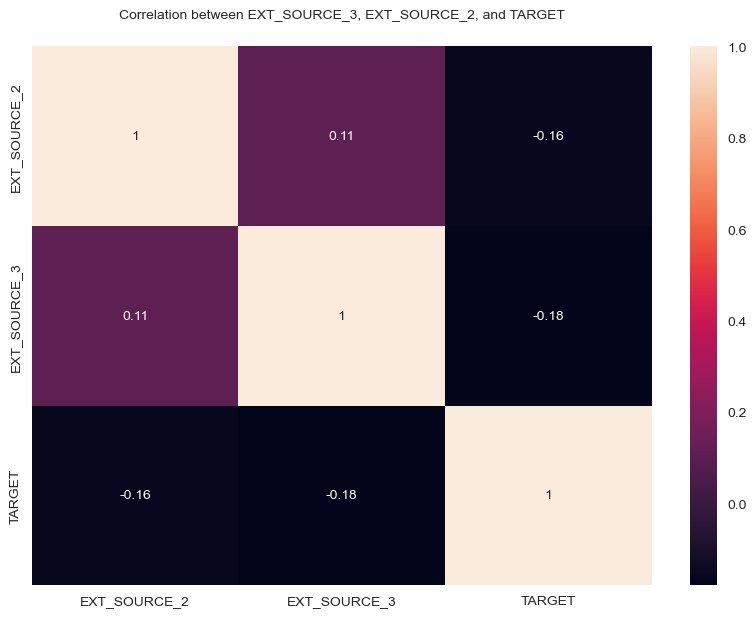

In [24]:
plt.figure(figsize= [10,7])

sns.heatmap(application_data_df[Normalized_col+["TARGET"]].corr(), annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, and TARGET", fontdict={"fontsize":10}, pad=20)
plt.show()

### Observation:

- on analyzing, we can say that there is no proper linear correlation between the "EXT_SOURCE_3," "EXT_SOURCE_2," and "TARGET" columns. let's drop these columns.


In [25]:
application_data_df.drop(Normalized_col, axis=1, inplace= True)

In [26]:
application_data_df.shape  # At this point, we have 71 columns.


(307511, 71)

now, we'll check columns with "FLAGS" and there connection with the "TARGET" column to delete the columns that are irrelevant.  lets  create dataframe containing all the FLAG columns. Then, we'll plot bar graphs for each of these columns in relation to the TARGET column. In these graphs, "0" will represent Repayers, while "1" will denote Defaulters.

In [27]:
columns_with_flag = [column for column in application_data_df.columns if column.startswith("FLAG")]

# Displaying the list of FLAG columns
columns_with_flag

['FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE']

In [28]:
application_data_df.TARGET

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [29]:
# Creating the "flag_table" DataFrame that Includes All FLAG Columns and the TARGET Column

flag_table = application_data_df[columns_with_flag+["TARGET"]]

In [30]:
flag_table["TARGET"] = flag_table["TARGET"].replace({1:"Defaulter", 0:"Repayer"})
flag_table.head()
flag_table

FLAG_CONT_MOBILE  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_PHONE  FLAG_WORK_PHONE     TARGET
0                      1                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                1                0                0                0                0                0                0           0               1           1            N               Y           1                0  Defaulter
1                      1                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                1                0                0                0                0                0                0           0               1           1            N               N           1                0    Repayer
2                      1                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                0                0                0                0                0                0                0           0               1           1            Y               Y           1                1    Repayer
3                      1                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                1                0                0                0                0                0                0           0               1           1            N               Y           0                0    Repayer
4                      1                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                0                0                0                0                0                1                0           0               1           1            N               Y           0                0    Repayer
...                  ...               ...               ...               ...               ...               ...               ...               ...               ...               ...               ...              ...               ...               ...              ...              ...              ...              ...              ...              ...              ...         ...             ...         ...          ...             ...         ...              ...        ...
307506                 1                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                0                0                0                0                0                1                0           0               1           1            N               N           0                0    Repayer
307507                 1                 0                 0                 0                 0                 0      

In [31]:
for i in flag_table:
    if i!= "TARGET":
        flag_table[i] = flag_table[i].replace({1:"Yes", 0:"No","Y":"Yes","N":"No"})

In [32]:
flag_table.head()

FLAG_CONT_MOBILE FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_2 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_EMAIL FLAG_EMP_PHONE FLAG_MOBIL FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_PHONE FLAG_WORK_PHONE     TARGET
0              Yes               No               No               No               No               No               No               No               No               No               No              No               No               No             Yes              No              No              No              No              No              No         No            Yes        Yes           No             Yes        Yes              No  Defaulter
1              Yes               No               No               No               No               No               No               No               No               No               No              No               No               No             Yes              No              No              No              No              No              No         No            Yes        Yes           No              No        Yes              No    Repayer
2              Yes               No               No               No               No               No               No               No               No               No               No              No               No               No              No              No              No              No              No              No              No         No            Yes        Yes          Yes             Yes        Yes             Yes    Repayer
3              Yes               No               No               No               No               No               No               No               No               No               No              No               No               No             Yes              No              No              No              No              No              No         No            Yes        Yes           No             Yes         No              No    Repayer
4              Yes               No               No               No               No               No               No               No               No               No               No              No               No               No              No              No              No              No              No             Yes              No         No            Yes        Yes           No             Yes         No              No    Repayer

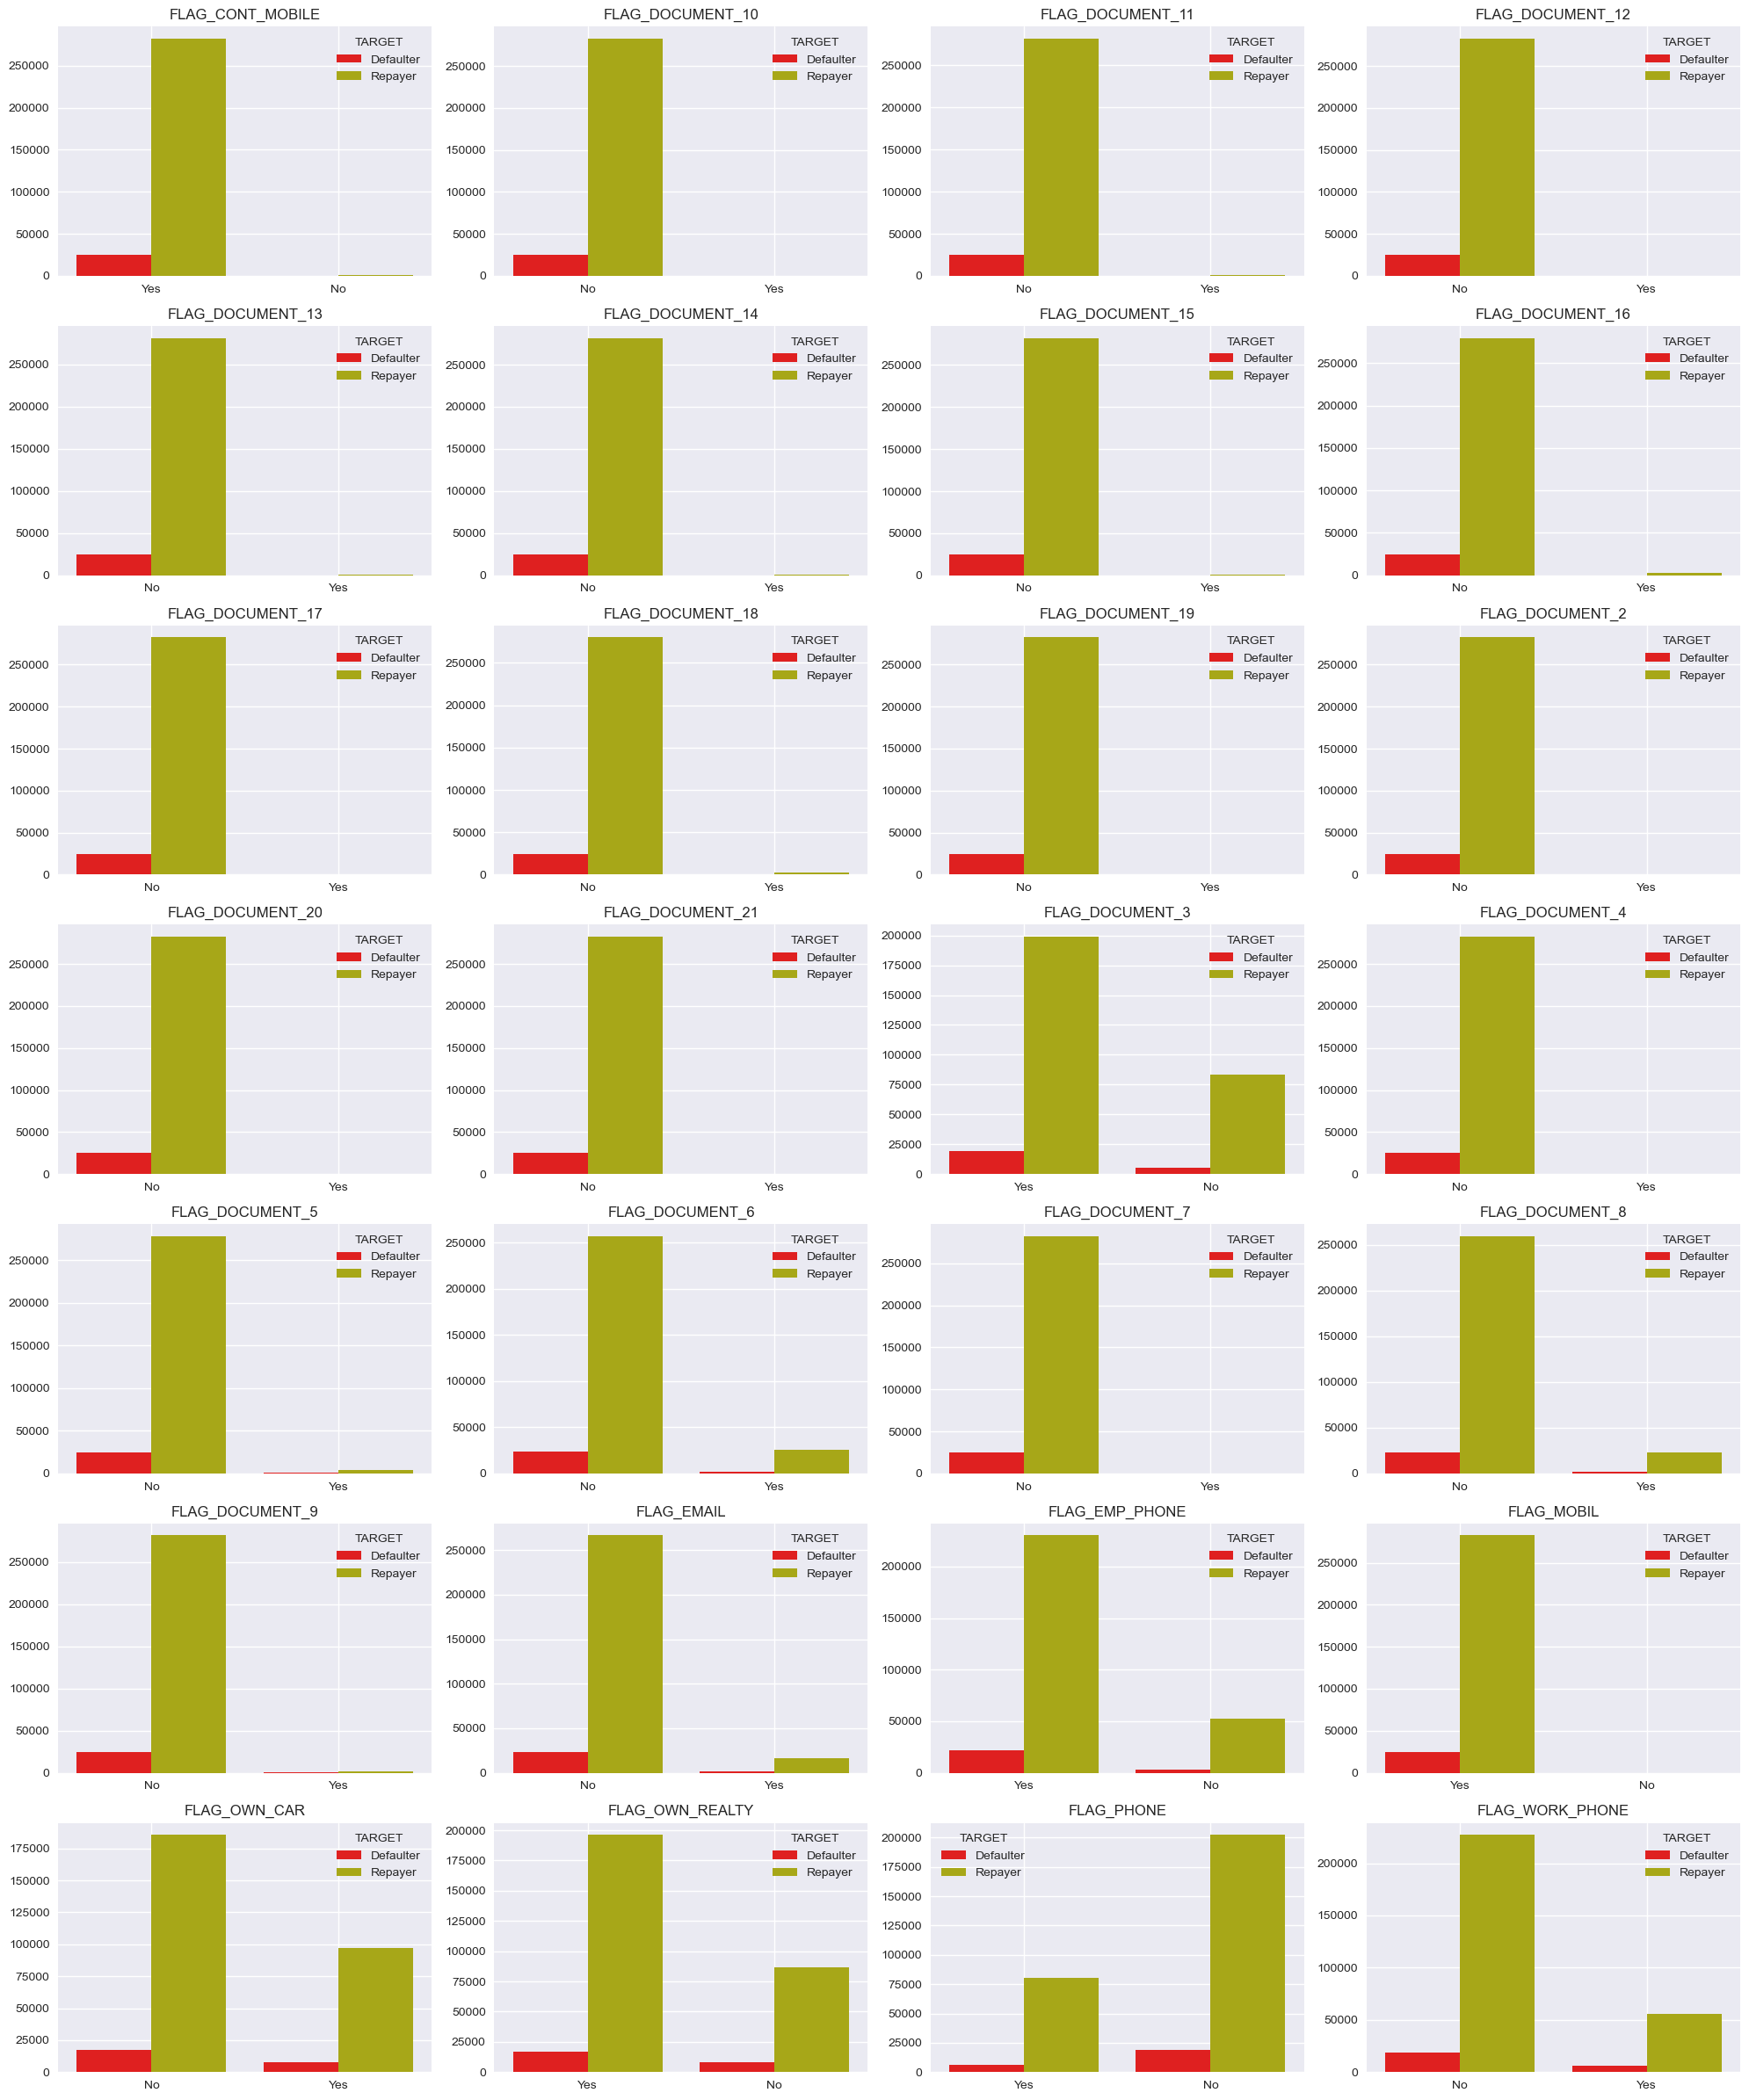

In [33]:
import itertools

# Create a figure with subplots
plt.figure(figsize=[20, 24])

# Loop through FLAG columns and enumerate using itertools.zip_longest
for i, j in itertools.zip_longest(columns_with_flag, range(len(columns_with_flag))):
    plt.subplot(7, 4, j + 1)
    ax = sns.countplot(data=flag_table, x=i, hue="TARGET", palette=["r", "y"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


in the above subplots bargraph we can see that "FLAG_CONT_MOBILE","FLAG_DOCUMENT_3", "FLAG_OWN_REALTY", "FLAG_MOBIL",and "FLAG_EMP_PHONE" columns have more number of Repayers

Considering this, it's more sensible to retain the columns FLAG_DOCUMENT_3, FLAG_OWN_REALTY, and FLAG_MOBIL. Consequently, we can include these columns in our analysis, while other FLAG columns will be excluded.

In [34]:
flag_table.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

len(flag_table.columns)


25

In [35]:
# Dropping Columns from the "flag_df" DataFrame to Remove Over 25 Columns from the "application_data_df" DataFrame
application_data_df.drop(flag_table.columns, axis=1, inplace= True)

In [36]:
application_data_df.shape

(307511, 46)

### Observation:

Following the elimination of unnecessary, irrelevant, and missing columns, our dataset has been refined, leaving us with a total of 46 columns.

## Imputing values & data Manipulation

In [37]:
null_count = round((application_data_df.isnull().sum()*100/len(application_data_df)).sort_values(ascending = False),2)
null_count.head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

In [38]:
#   checking columns having null values more then 10%
null_count[null_count>10]

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
dtype: float64

we can see that there are 7 columns here with null value percentage more then 10% let check them one-by-one

In [39]:
# handeling "OCCUPATION_TYPE" columns
application_data_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

Based on the above observations, it is clear that the OCCUPATION_TYPE column is categorical 

In [40]:
#  filling the missing value with new category "Unknown" 
application_data_df.OCCUPATION_TYPE = application_data_df.OCCUPATION_TYPE.fillna("Unknown")

In [41]:
#  check for null values in OCCUPATION_TYPE column
application_data_df.OCCUPATION_TYPE.isnull().sum()

0

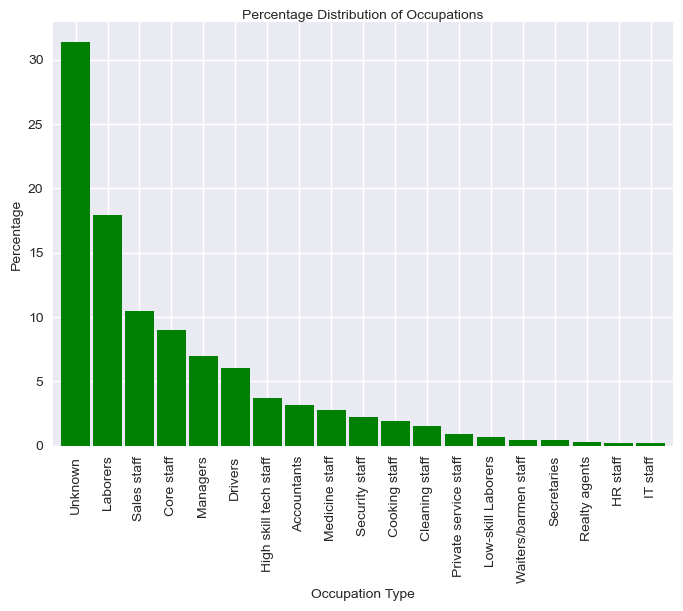

In [42]:
# Creating a Bar Graph for Each "OCCUPATION_TYPE" Category with Percentage:
(application_data_df["OCCUPATION_TYPE"].value_counts() / len(application_data_df) * 100).plot.bar(color="green", width=.9)
plt.title("Percentage Distribution of Occupations", fontdict={"fontsize":10}, pad=1)
plt.ylabel("Percentage")
plt.xlabel("Occupation Type")
plt.show()

### Observation:
- The highest percentage of values is attributed to the "Unknown" group, while the 2nd highest percentage is  "Laborers" category.

In [43]:
#  let check the other columns with null perentage more then 10%
null_count = round((application_data_df.isnull().sum()*100/len(application_data_df)).sort_values(ascending = False),2)
null_count[null_count>10]

AMT_REQ_CREDIT_BUREAU_YEAR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
dtype: float64

In [44]:
col = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [45]:
application_data_df[col].info()
# seems all this columns are numerical values lets check the math values of this column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [46]:
application_data_df[col].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     1.899974                   0.007000                    0.006402                   0.267395                   0.265474                    0.034362
std                      1.869295                   0.110757                    0.083849                   0.916002                   0.794056                    0.204685
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      1.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
75%                      3.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
max                     25.000000                   9.000000                    4.000000                  27.000000                 261.000000                    8.000000

In [47]:
median_values = application_data_df[col].median()
application_data_df[col] = application_data_df[col].fillna(median_values)

In [48]:
null_count = round((application_data_df.isnull().sum()*100/len(application_data_df)).sort_values(ascending = False),2)
null_count.head(10)

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
OCCUPATION_TYPE             0.00
dtype: float64

In [49]:
null_count[null_count>0]

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
dtype: float64

In [50]:
application_data_df[['NAME_TYPE_SUITE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE']].describe()

DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  AMT_GOODS_PRICE
count             306490.000000             306490.000000             306490.000000             306490.000000     3.072330e+05
mean                   0.100049                  0.143421                  1.422245                  1.405292     5.383962e+05
std                    0.362291                  0.446698                  2.400989                  2.379803     3.694465e+05
min                    0.000000                  0.000000                  0.000000                  0.000000     4.050000e+04
25%                    0.000000                  0.000000                  0.000000                  0.000000     2.385000e+05
50%                    0.000000                  0.000000                  0.000000                  0.000000     4.500000e+05
75%                    0.000000                  0.000000                  2.000000                  2.000000     6.795000e+05
max                   24.000000                 34.000000                348.000000                344.000000     4.050000e+06

seems this null values are very less ignoring them

In [51]:
# check the column description
columns_description[columns_description['Table']=='application_data']

Unnamed: 0             Table                           Row                                        Description                                Special
0             1  application_data                    SK_ID_CURR                           ID of loan in our sample                                    NaN
1             2  application_data                        TARGET  Target variable (1 - client with payment diffi...                                    NaN
2             5  application_data            NAME_CONTRACT_TYPE        Identification if loan is cash or revolving                                    NaN
3             6  application_data                   CODE_GENDER                               Gender of the client                                    NaN
4             7  application_data                  FLAG_OWN_CAR                      Flag if the client owns a car                                    NaN
5             8  application_data               FLAG_OWN_REALTY                Flag if client owns a house or flat                                    NaN
6             9  application_data                  CNT_CHILDREN                  Number of children the client has                                    NaN
7            10  application_data              AMT_INCOME_TOTAL                               Income of the client                                    NaN
8            11  application_data                    AMT_CREDIT                          Credit amount of the loan                                    NaN
9            12  application_data                   AMT_ANNUITY                                       Loan annuity                                    NaN
10           13  application_data               AMT_GOODS_PRICE  For consumer loans it is the price of the good...                                    NaN
11           14  application_data               NAME_TYPE_SUITE  Who was accompanying client when he was applyi...                                    NaN
12           15  application_data              NAME_INCOME_TYPE  Clients income type (businessman, working, mat...                                    NaN
13           16  application_data           NAME_EDUCATION_TYPE     Level of highest education the client achieved                                    NaN
14           17  application_data            NAME_FAMILY_STATUS                        Family status of the client                                    NaN
15           18  application_data             NAME_HOUSING_TYPE  What is the housing situation of the client (r...                                    NaN
16           19  application_data    REGION_POPULATION_RELATIVE  Normalized population of region where client l...                            normalized 
17           20  application_data                    DAYS_BIRTH    Client's age in days at the time of application  time only relative to the application
18           21  application_data                 DAYS_EMPLOYED  How many days before the application the perso...  time only relative to the application
19           22  application_data             DAYS_REGISTRATION  How many days before the application did clien...  time only relative to the application
20           23  application_data               DAYS_ID_PUBLISH  How many days before the application did clien...  time only relative to the application
21           24  application_data                   OWN_CAR_AGE                                Age of client's car                                    NaN
22           25  application_data                    FLAG_MOBIL      Did client provide mobile phone (1=YES, 0=NO)                                    NaN
23           26  application_data                FLAG_EMP_PHONE        Did client provide work phone (1=YES, 0=NO)                                    NaN
24           27  application_data               FLAG_WORK_PHONE        Did client provide home phone (1=YES, 0=NO)                                    NaN
2

In [52]:
application_data_df.describe()

AMT_ANNUITY    AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR   CNT_CHILDREN  CNT_FAM_MEMBERS     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3     FLAG_MOBIL  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     SK_ID_CURR         TARGET
count  307499.000000  3.075110e+05     3.072330e+05      3.075110e+05              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000               307511.000000  307511.000000    307509.000000  307511.000000  307511.000000    307511.000000           307510.000000      307511.000000             306490.000000             306490.000000    307511.000000  307511.000000            307511.000000            307511.000000                307511.000000             306490.000000             306490.000000               307511.000000         307511.000000                307511.000000           307511.000000           307511.000000               307511.000000               307511.000000  307511.000000  307511.000000
mean    27108.573909  5.990260e+05     5.383962e+05      1.687979e+05                   0.006055                    0.005538                   0.231293                   0.229631                    0.029723                    1.778463       0.417052         2.152665  -16036.995067   63815.045904     -2994.202373             -962.858788       -4986.120328                  0.143421                  0.100049         0.710023       0.999997                12.063419                 0.179555                     0.040659                  1.422245                  1.405292                    0.020868              2.052463                     2.031521                0.078173                0.230454                    0.015144                    0.050769  278180.518577       0.080729
std     14493.737315  4.024908e+05     3.694465e+05      2.371231e+05                   0.103037                    0.078014                   0.856810                   0.744059                    0.190728                    1.765523       0.722121         0.910682    4363.988632  141275.766519      1509.450419              826.808487        3522.886321                  0.446698                  0.362291         0.453752       0.001803                 3.265832                 0.383817                     0.197499                  2.400989                  2.379803                    0.013831              0.509034                     0.502737                0.268444                0.421124                    0.122126                    0.219526  102790.175348       0.272419
min      1615.500000  4.500000e+04     4.050000e+04      2.565000e+04                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000                    0.000000       0.000000         1.000000  -25229.000000  -17912.000000     -7197.000000            -4292.000000      -24672.000000                  0.000000                  0.000000         0.000000       0.000000                 0.000000                 0.000000                     0.000000                  0.000000                  0.000000                    0.000290              1.000000                     1.000000                0.000000                0.000000                    0.000000                    0.000000  100002.000000       0.000000
25%     16524.000000  2.700000e+05     2.385000e+05      1.125000e+05               

Columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE have a negitive values lets correct them


In [53]:
col_days = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
application_data_df[col_days]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
0            -9461           -637            -3648.0            -2120                 -1134.0
1           -16765          -1188            -1186.0             -291                  -828.0
2           -19046           -225            -4260.0            -2531                  -815.0
3           -19005          -3039            -9833.0            -2437                  -617.0
4           -19932          -3038            -4311.0            -3458                 -1106.0
...            ...            ...                ...              ...                     ...
307506       -9327           -236            -8456.0            -1982                  -273.0
307507      -20775         365243            -4388.0            -4090                     0.0
307508      -14966          -7921            -6737.0            -5150                 -1909.0
307509      -11961          -4786            -2562.0             -931                  -322.0
307510      -16856          -1262            -5128.0             -410                  -787.0

[307511 rows x 5 columns]

In [54]:
application_data_df[col_days] = application_data_df[col_days].apply(abs)

In [55]:
application_data_df[col_days].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count  307511.000000  307511.000000      307511.000000    307511.000000           307510.000000
mean    16036.995067   67724.742149        4986.120328      2994.202373              962.858788
std      4363.988632  139443.751806        3522.886321      1509.450419              826.808487
min      7489.000000       0.000000           0.000000         0.000000                0.000000
25%     12413.000000     933.000000        2010.000000      1720.000000              274.000000
50%     15750.000000    2219.000000        4504.000000      3254.000000              757.000000
75%     19682.000000    5707.000000        7479.500000      4299.000000             1570.000000
max     25229.000000  365243.000000       24672.000000      7197.000000             4292.000000

In [56]:
#  DAYS_BIRTh --> Client's age in days at the time of application
#  convert the days to age range in a new column CLIENT_AGE
application_data_df.CLIENT_AGE = round(application_data_df.DAYS_BIRTH /365)

In [57]:
# creating a new cloumn CLIENT_AGE_GROUP from CLIENT_AGE so easyly find which all age group people are eligible for loan
application_data_df.CLIENT_AGE
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

application_data_df.CLIENT_AGE_GROUP = pd.cut(application_data_df.CLIENT_AGE, bins=bins, labels=slots)

In [58]:
# application_data_df.CLIENT_AGE_GROUP
application_data_df.CLIENT_AGE_GROUP

0         25-30
1         45-50
2         50-55
3         50-55
4         50-55
          ...  
307506    25-30
307507    55-60
307508    40-45
307509    30-35
307510    45-50
Name: DAYS_BIRTH, Length: 307511, dtype: category
Categories (10, object): ['0-20' < '20-25' < '25-30' < '30-35' ... '45-50' < '50-55' < '55-60' < '60 Above']

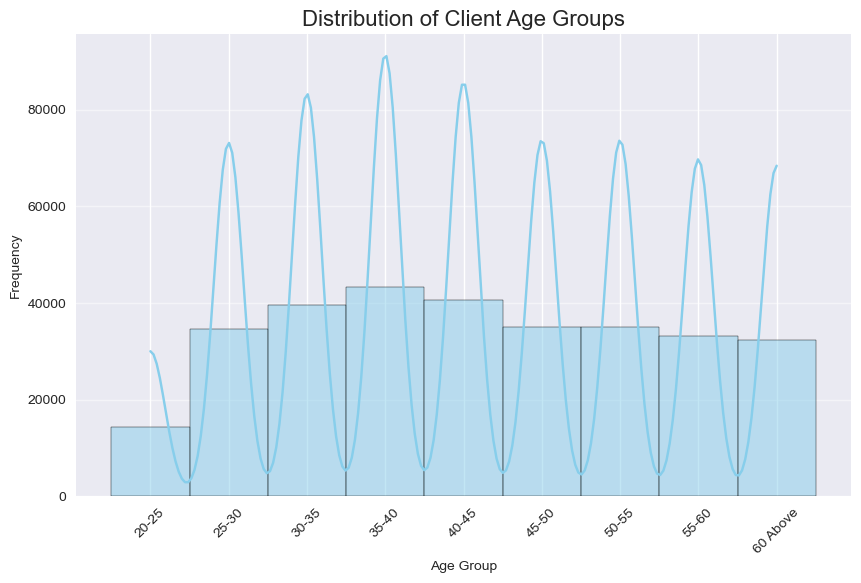

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(application_data_df.CLIENT_AGE_GROUP, kde=True, color='skyblue', bins = [0,20,25,30,35,40,45,50,55,60,100])
plt.title("Distribution of Client Age Groups", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


seems most of the clients are of age 35-40 and above

In [62]:
# DAYS_EMPLOYED --> no of days empolyee working 
application_data_df.DAYS_EMPLOYED

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [63]:
# lets convert this to years to check sence how long the 
application_data_df.EMPLOYED_YEARS = round(application_data_df.DAYS_EMPLOYED/365)

In [64]:
application_data_df.EMPLOYED_YEARS

0            2.0
1            3.0
2            1.0
3            8.0
4            8.0
           ...  
307506       1.0
307507    1001.0
307508      22.0
307509      13.0
307510       3.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [65]:
#  groping the clients based on there total years of employment
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","35 Above"]
application_data_df['TOTAL_YEARS_OF_EMPLOYMENT'] = pd.cut(application_data_df.EMPLOYED_YEARS, bins=bins, labels=slots)

In [66]:
application_data_df.TOTAL_YEARS_OF_EMPLOYMENT

0           0-5
1           0-5
2           0-5
3          5-10
4          5-10
          ...  
307506      0-5
307507      NaN
307508    20-25
307509    10-15
307510      0-5
Name: TOTAL_YEARS_OF_EMPLOYMENT, Length: 307511, dtype: category
Categories (7, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30' < '35 Above']

In [67]:
round(application_data_df.TOTAL_YEARS_OF_EMPLOYMENT.value_counts(normalize= True)*100,2)

0-5         55.77
5-10        24.80
10-15       10.43
15-20        4.19
20-25        2.40
25-30        1.28
35 Above     1.13
Name: TOTAL_YEARS_OF_EMPLOYMENT, dtype: float64

<Axes: >

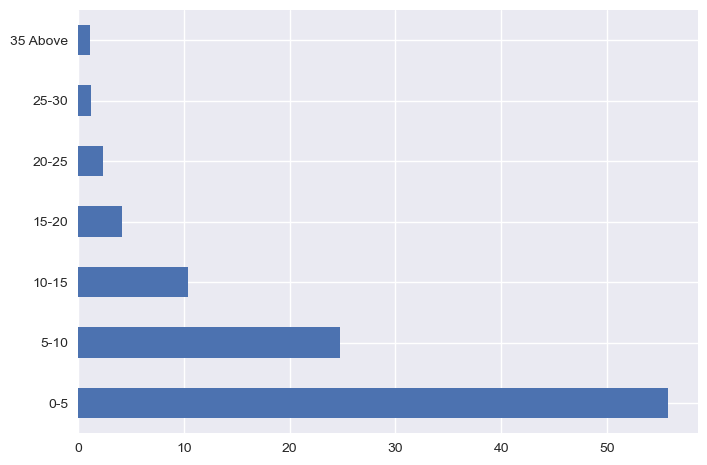

In [68]:
round(application_data_df.TOTAL_YEARS_OF_EMPLOYMENT.value_counts(normalize= True)*100,2).plot.barh()

according to above ovservation more then 55%  of people have a 0-5 years of work experiance

###   lets check for, Columns wich deals with amount

In [69]:
# dealing with AMT_CREDIT column
application_data_df.AMT_CREDIT
application_data_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [70]:
# converting the AMT_CREDIT numerical values to categorical value

application_data_df['AMT_CREDIT'] = application_data_df.AMT_CREDIT/100000
bins=[0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
application_data_df['RANGE_AMT_CREDIT'] = pd.cut(application_data_df.AMT_CREDIT,bins,labels=slot)

In [71]:
application_data_df.RANGE_AMT_CREDIT

0         4L-5L
1           NaN
2         1L-2L
3         3L-4L
4         5L-6L
          ...  
307506    2L-3L
307507    2L-3L
307508    6L-7L
307509    3L-4L
307510    6L-7L
Name: RANGE_AMT_CREDIT, Length: 307511, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [72]:
#  dealing with AMT_INCOME_TOTAL column
application_data_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
# converting the AMT_INCOME_TOTAL numerical values to categorical

application_data_df['AMT_INCOME_TOTAL'] = application_data_df.AMT_INCOME_TOTAL/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
lable = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']


In [74]:
application_data_df['RANGE_AMT_INCOME'] =pd.cut(application_data_df.AMT_INCOME_TOTAL,bins,labels=lable)

In [75]:
application_data_df.RANGE_AMT_INCOME

0         2L-3L
1         2L-3L
2          0-1L
3         1L-2L
4         1L-2L
          ...  
307506    1L-2L
307507     0-1L
307508    1L-2L
307509    1L-2L
307510    1L-2L
Name: RANGE_AMT_INCOME, Length: 307511, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [76]:
#  dealing with AMT_GOODS_PRICE column
application_data_df['AMT_GOODS_PRICE'] = application_data_df.AMT_GOODS_PRICE / 100000
application_data_df.AMT_GOODS_PRICE
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
lable = ['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L', '10L-Above']
application_data_df['RANGE_AMT_GOODS_PRICE'] = pd.cut(application_data_df['AMT_GOODS_PRICE'],bins=bins, labels=lable)

In [77]:
application_data_df.RANGE_AMT_GOODS_PRICE

0         3L-4L
1           NaN
2         1L-2L
3         2L-3L
4         5L-6L
          ...  
307506    2L-3L
307507    2L-3L
307508    5L-6L
307509    3L-4L
307510    6L-7L
Name: RANGE_AMT_GOODS_PRICE, Length: 307511, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L-Above']

In [78]:
#   checking for outliners
application_data_df.describe()

AMT_ANNUITY     AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR   CNT_CHILDREN  CNT_FAM_MEMBERS     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3     FLAG_MOBIL  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     SK_ID_CURR         TARGET
count  307499.000000  307511.000000    307233.000000     307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000               307511.000000  307511.000000    307509.000000  307511.000000  307511.000000    307511.000000           307510.000000      307511.000000             306490.000000             306490.000000    307511.000000  307511.000000            307511.000000            307511.000000                307511.000000             306490.000000             306490.000000               307511.000000         307511.000000                307511.000000           307511.000000           307511.000000               307511.000000               307511.000000  307511.000000  307511.000000
mean    27108.573909       5.990260         5.383962          1.687979                   0.006055                    0.005538                   0.231293                   0.229631                    0.029723                    1.778463       0.417052         2.152665   16036.995067   67724.742149      2994.202373              962.858788        4986.120328                  0.143421                  0.100049         0.710023       0.999997                12.063419                 0.179555                     0.040659                  1.422245                  1.405292                    0.020868              2.052463                     2.031521                0.078173                0.230454                    0.015144                    0.050769  278180.518577       0.080729
std     14493.737315       4.024908         3.694465          2.371231                   0.103037                    0.078014                   0.856810                   0.744059                    0.190728                    1.765523       0.722121         0.910682    4363.988632  139443.751806      1509.450419              826.808487        3522.886321                  0.446698                  0.362291         0.453752       0.001803                 3.265832                 0.383817                     0.197499                  2.400989                  2.379803                    0.013831              0.509034                     0.502737                0.268444                0.421124                    0.122126                    0.219526  102790.175348       0.272419
min      1615.500000       0.450000         0.405000          0.256500                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000                    0.000000       0.000000         1.000000    7489.000000       0.000000         0.000000                0.000000           0.000000                  0.000000                  0.000000         0.000000       0.000000                 0.000000                 0.000000                     0.000000                  0.000000                  0.000000                    0.000290              1.000000                     1.000000                0.000000                0.000000                    0.000000                    0.000000  100002.000000       0.000000
25%     16524.000000       2.700000         2.385000          1.125000         

In [79]:
#  from the above observation we can find these columns have a large variations

col_outlier = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","AMT_REQ_CREDIT_BUREAU_YEAR"]

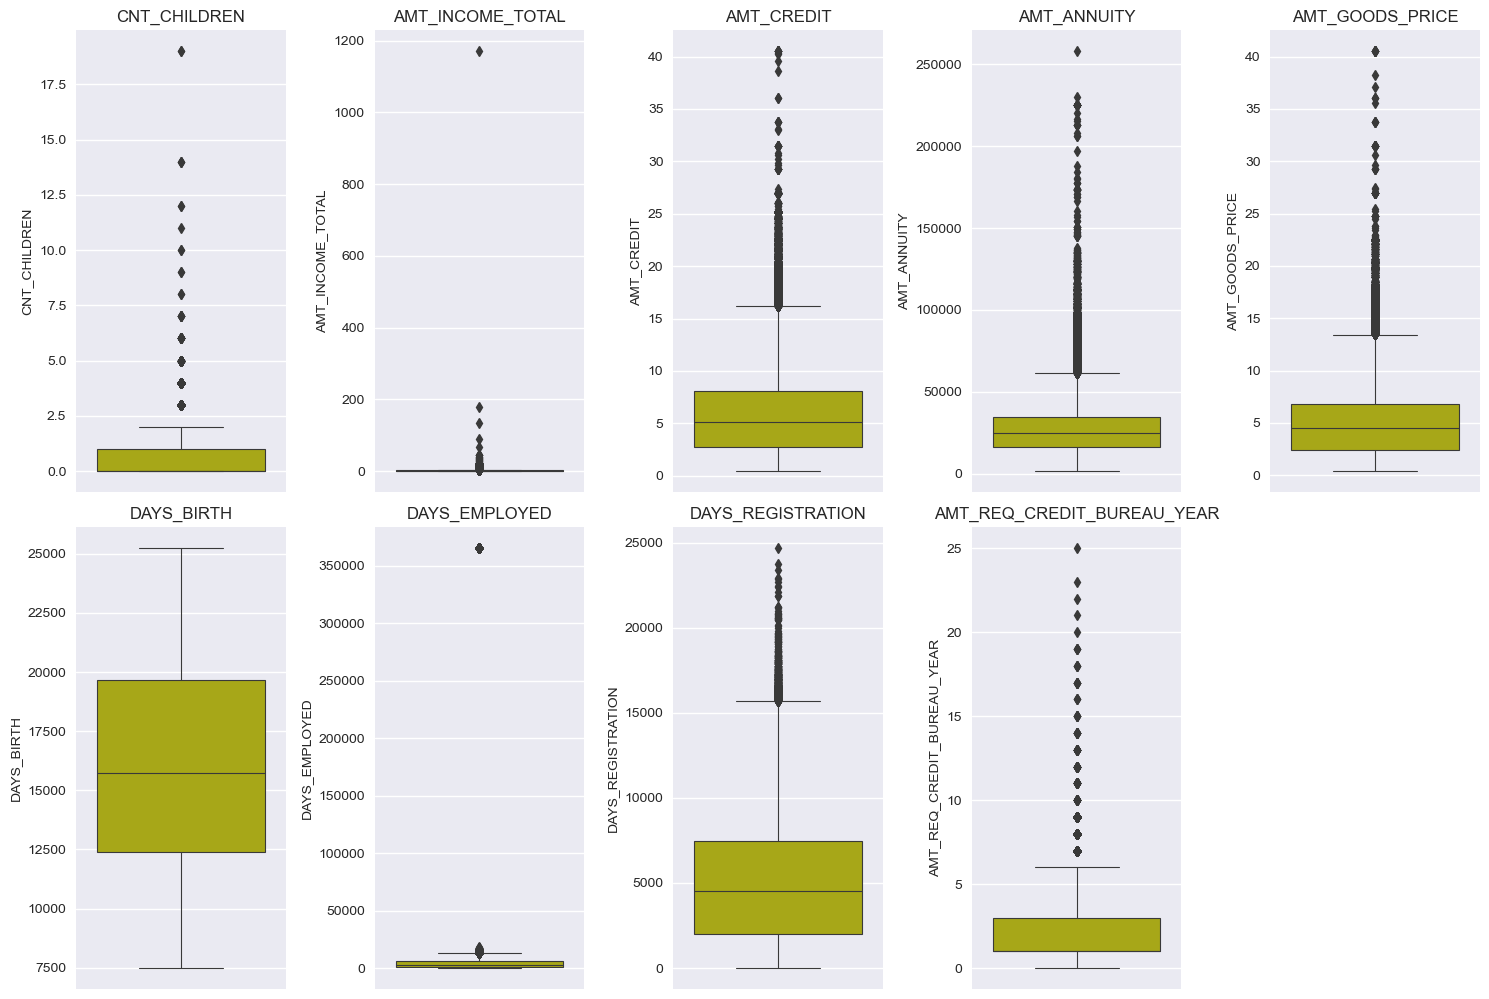

In [80]:
#  lets plot a boxplot to find outeliners visualy
plt.figure(figsize=[15, 25])

for i, col in enumerate(col_outlier, start=1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=application_data_df[col], color="y", width= 0.8, linewidth=0.8)
    plt.title(col)

plt.tight_layout()
plt.show()


### Observations:


- from the above boxplots DAYS_BIRTH has no outliners.

- DAYS_EMPLOYED has a huge difference, value above 350000 days,thismay be a wrong input

- DAYS_REGISTRATION, AMT_REQ_CREDIT_BUREAU_YEAR ,AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN seem to have some outliers in the current application data.

- AMT_INCOME_TOTAL showcases a substantial number of outliers, suggesting that certain loan applicants possess significantly higher income in comparison to others.


In [81]:
application_data_df.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
RANGE_AMT_CREDIT                   11
RANGE_AMT_INCOME                   11
RANGE_AMT_GOODS_PRICE              11
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CRED

In [82]:
# Inspecting the Number of Unique Values in Each Column to Identify Categorical Columns:

application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   AMT_ANNUITY                  307499 non-null  float64 
 1   AMT_CREDIT                   307511 non-null  float64 
 2   AMT_GOODS_PRICE              307233 non-null  float64 
 3   AMT_INCOME_TOTAL             307511 non-null  float64 
 4   AMT_REQ_CREDIT_BUREAU_DAY    307511 non-null  float64 
 5   AMT_REQ_CREDIT_BUREAU_HOUR   307511 non-null  float64 
 6   AMT_REQ_CREDIT_BUREAU_MON    307511 non-null  float64 
 7   AMT_REQ_CREDIT_BUREAU_QRT    307511 non-null  float64 
 8   AMT_REQ_CREDIT_BUREAU_WEEK   307511 non-null  float64 
 9   AMT_REQ_CREDIT_BUREAU_YEAR   307511 non-null  float64 
 10  CNT_CHILDREN                 307511 non-null  int64   
 11  CNT_FAM_MEMBERS              307509 non-null  float64 
 12  CODE_GENDER                  307511 non-null

In [83]:
application_data_df.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'FLAG_MOBIL', 'FLAG_OWN_REALTY', 'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WO

In [84]:
columns_categorical =['CODE_GENDER','OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE',
                      'NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','ORGANIZATION_TYPE',
                      'REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION',
                      'REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS',
                      'WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_WORK_CITY']
len(columns_categorical)
application_data_df.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [85]:
for column in columns_categorical:
    application_data_df[column] = pd.Categorical(application_data_df[column])

application_data_df[columns_categorical]

CODE_GENDER OCCUPATION_TYPE       ORGANIZATION_TYPE    NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE NAME_CONTRACT_TYPE      NAME_INCOME_TYPE  NAME_HOUSING_TYPE NAME_TYPE_SUITE       ORGANIZATION_TYPE REG_REGION_NOT_WORK_REGION REG_CITY_NOT_WORK_CITY REG_REGION_NOT_LIVE_REGION REGION_RATING_CLIENT_W_CITY REG_CITY_NOT_LIVE_CITY CNT_CHILDREN CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_CITY_NOT_WORK_CITY
0                M        Laborers  Business Entity Type 3  Single / not married  Secondary / secondary special         Cash loans               Working  House / apartment   Unaccompanied  Business Entity Type 3                          0                      0                          0                           2                      0            0             1.0                  WEDNESDAY                          0                      0
1                F      Core staff                  School               Married               Higher education         Cash loans         State servant  House / apartment          Family                  School                          0                      0                          0                           1                      0            0             2.0                     MONDAY                          0                      0
2                M        Laborers              Government  Single / not married  Secondary / secondary special    Revolving loans               Working  House / apartment   Unaccompanied              Government                          0                      0                          0                           2                      0            0             1.0                     MONDAY                          0                      0
3                F        Laborers  Business Entity Type 3        Civil marriage  Secondary / secondary special         Cash loans               Working  House / apartment   Unaccompanied  Business Entity Type 3                          0                      0                          0                           2                      0            0             2.0                  WEDNESDAY                          0                      0
4                M      Core staff                Religion  Single / not married  Secondary / secondary special         Cash loans               Working  House / apartment   Unaccompanied                Religion                          0                      1                          0                           2                      0            0             1.0                   THURSDAY                          0                      1
...            ...             ...                     ...                   ...                            ...                ...                   ...                ...             ...                     ...                        ...                    ...                        ...                         ...                    ...          ...             ...                        ...                        ...                    ...
307506           M     Sales staff                Services             Separated  Secondary / secondary special         Cash loans               Working       With parents   Unaccompanied                Services                          0                      0                          0                           1                      0            0             1.0                   THURSDAY                          0                      0
307507           F         Unknown                     XNA                 Widow  Secondary / secondary special         Cash loans             Pensioner  House / apartment   Unaccompanied                     XNA                          0                      0                          0                           2                      0            0             1.0                     MONDAY                          0                 

In [86]:
application_data_df.dtypes

AMT_ANNUITY                     float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
AMT_INCOME_TOTAL                float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
CNT_CHILDREN                   category
CNT_FAM_MEMBERS                category
CODE_GENDER                    category
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_ID_PUBLISH                   int64
DAYS_LAST_PHONE_CHANGE          float64
DAYS_REGISTRATION               float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
FLAG_DOCUMENT_3                   int64
FLAG_MOBIL                        int64
FLAG_OWN_REALTY                  object
HOUR_APPR_PROCESS_START           int64
LIVE_CITY_NOT_WORK_CITY           int64


## Import  previous_application.csv

In [87]:
previous_application_df = pd.read_csv('previous_application.csv')

In [88]:
previous_application_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [89]:
previous_application_df.shape

(1670214, 37)

- previous application data set have 37 columns

In [90]:
previous_application_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [91]:
#  analysing  the columns
previous_application_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

- previous_application_df have positive and  negitive values need to fix them

In [92]:
#  check for null values
null_values = round((previous_application_df.isnull().sum()*100 / len(previous_application_df)).sort_values(ascending=False),2)
null_values

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [93]:
# droping the columns having null values more then 50%

columns_above_50 = null_values[null_values > 50]
print(columns_above_50.index)
previous_application_df.drop(columns = columns_above_50.index, inplace = True)

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT'], dtype='object')


In [94]:
previous_application_df.shape

(1670214, 33)

- 33 columns are left after droping the columns having null values more then 50%

In [95]:
# analysing the columns vaving null values more then 10%

null_values_latest = round((previous_application_df.isnull().sum()*100 / len(previous_application_df)).sort_values(ascending=False),2)
column_above_10 = null_values_latest[null_values_latest>10]
column_above_10

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [96]:
#  checking for outliners
previous_application_df[column_above_10.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000              997149.000000     1.284699e+06  1.297979e+06  1.297984e+06
mean        342209.855039      81992.343838   76582.403064               33767.774054    13826.269337                   0.332570     2.278473e+05  1.595512e+04  1.605408e+01
std          88916.115834     153303.516729  149647.415123              106857.034789    72444.869708                   0.471134     3.153966e+05  1.478214e+04  1.456729e+01
min          -2922.000000      -2874.000000   -2889.000000               -2801.000000    -2892.000000                   0.000000     0.000000e+00  0.000000e+00  0.000000e+00
25%         365243.000000      -1270.000000   -1314.000000               -1242.000000    -1628.000000                   0.000000     5.084100e+04  6.321780e+03  6.000000e+00
50%         365243.000000       -499.000000    -537.000000                -361.000000     -831.000000                   0.000000     1.123200e+05  1.125000e+04  1.200000e+01
75%         365243.000000        -44.000000     -74.000000                 129.000000     -411.000000                   1.000000     2.340000e+05  2.065842e+04  2.400000e+01
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000                   1.000000     6.905160e+06  4.180581e+05  8.400000e+01

In [97]:
# description of application_data
columns_description[columns_description['Table'] =='previous_application.csv']

Unnamed: 0                     Table                          Row                                        Description                                Special
122         176  previous_application.csv                  SK_ID_PREV   ID of previous credit in Home credit related t...                                 hashed
123         177  previous_application.csv                   SK_ID_CURR                           ID of loan in our sample                                 hashed
124         178  previous_application.csv           NAME_CONTRACT_TYPE  Contract product type (Cash loan, consumer loa...                                    NaN
125         179  previous_application.csv                  AMT_ANNUITY                    Annuity of previous application                                    NaN
126         180  previous_application.csv              AMT_APPLICATION  For how much credit did client ask on the prev...                                    NaN
127         181  previous_application.csv                   AMT_CREDIT  Final credit amount on the previous applicatio...                                    NaN
128         182  previous_application.csv             AMT_DOWN_PAYMENT           Down payment on the previous application                                    NaN
129         183  previous_application.csv              AMT_GOODS_PRICE  Goods price of good that client asked for (if ...                                    NaN
130         184  previous_application.csv   WEEKDAY_APPR_PROCESS_START  On which day of the week did the client apply ...                                    NaN
131         185  previous_application.csv      HOUR_APPR_PROCESS_START  Approximately at what day hour did the client ...                                rounded
132         186  previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT  Flag if it was last application for the previo...                                    NaN
133         187  previous_application.csv       NFLAG_LAST_APPL_IN_DAY  Flag if the application was the last applicati...                                    NaN
134         188  previous_application.csv             NFLAG_MICRO_CASH                            Flag Micro finance loan                                    NaN
135         189  previous_application.csv            RATE_DOWN_PAYMENT    Down payment rate normalized on previous credit                             normalized
136         190  previous_application.csv        RATE_INTEREST_PRIMARY        Interest rate normalized on previous credit                             normalized
137         191  previous_application.csv     RATE_INTEREST_PRIVILEGED        Interest rate normalized on previous credit                             normalized
138         192  previous_application.csv       NAME_CASH_LOAN_PURPOSE                           Purpose of the cash loan                                    NaN
139         193  previous_application.csv         NAME_CONTRACT_STATUS  Contract status (approved, cancelled, ...) of ...                                    NaN
140         194  previous_application.csv                DAYS_DECISION  Relative to current application when was the d...  time only relative to the application
141         195  previous_application.csv            NAME_PAYMENT_TYPE  Payment method that client chose to pay for th...                                    NaN
142         196  previous_application.csv           CODE_REJECT_REASON          Why was the previous application rejected                                    NaN
143         197  previous_application.csv              NAME_TYPE_SUITE  Who accompanied client when applying for the p...                                    NaN
144         198  previous_application.csv             NAME_CLIENT_TYPE  Was the client old or new client when applying...                                    NaN
145         199  previous_application.csv          NAME_GOODS_CATEGORY  What kind of goods did the client apply for in...                    

In [98]:
previous_application_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC              NaN         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN
5     1383531      199383         Cash loans    23703.930         315000.0    340573.5         315000.0                   SATURDAY                        8              

In [99]:
previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [100]:
#  droping the nonessential columns

nonessential_col = ['FLAG_LAST_APPL_PER_CONTRACT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY']

# previous_application_df[nonessential_col]

In [101]:
previous_application_df.drop(nonessential_col,axis =1, inplace = True)


In [102]:
previous_application_df.shape

(1670214, 29)

In [103]:
previous_application_df[column_above_10.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000              997149.000000     1.284699e+06  1.297979e+06  1.297984e+06
mean        342209.855039      81992.343838   76582.403064               33767.774054    13826.269337                   0.332570     2.278473e+05  1.595512e+04  1.605408e+01
std          88916.115834     153303.516729  149647.415123              106857.034789    72444.869708                   0.471134     3.153966e+05  1.478214e+04  1.456729e+01
min          -2922.000000      -2874.000000   -2889.000000               -2801.000000    -2892.000000                   0.000000     0.000000e+00  0.000000e+00  0.000000e+00
25%         365243.000000      -1270.000000   -1314.000000               -1242.000000    -1628.000000                   0.000000     5.084100e+04  6.321780e+03  6.000000e+00
50%         365243.000000       -499.000000    -537.000000                -361.000000     -831.000000                   0.000000     1.123200e+05  1.125000e+04  1.200000e+01
75%         365243.000000        -44.000000     -74.000000                 129.000000     -411.000000                   1.000000     2.340000e+05  2.065842e+04  2.400000e+01
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000                   1.000000     6.905160e+06  4.180581e+05  8.400000e+01

- <b>DAYS_FIRST_DRAWING</b> , <b>DAYS_TERMINATION</b> , <b>DAYS_LAST_DUE</b> , <b>DAYS_LAST_DUE_1ST_VERSION</b> , <b>DAYS_FIRST_DUE</b>,  are a Day values numerical seems to have negitive values, lets convert them and related Days column   to positive

In [104]:
Days_column =['DAYS_FIRST_DRAWING','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_DECISION']

In [105]:
previous_application_df[Days_column].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  DAYS_DECISION
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000   1.670214e+06
mean        342209.855039      81992.343838   76582.403064               33767.774054    13826.269337  -8.806797e+02
std          88916.115834     153303.516729  149647.415123              106857.034789    72444.869708   7.790997e+02
min          -2922.000000      -2874.000000   -2889.000000               -2801.000000    -2892.000000  -2.922000e+03
25%         365243.000000      -1270.000000   -1314.000000               -1242.000000    -1628.000000  -1.300000e+03
50%         365243.000000       -499.000000    -537.000000                -361.000000     -831.000000  -5.810000e+02
75%         365243.000000        -44.000000     -74.000000                 129.000000     -411.000000  -2.800000e+02
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000  -1.000000e+00

In [106]:
previous_application_df[Days_column] = previous_application_df[Days_column].apply(abs)
previous_application_df[Days_column].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  DAYS_DECISION
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000   1.670214e+06
mean        342340.056543      83505.775017   78152.730207               35163.363265    15949.224065   8.806797e+02
std          88413.495220     152484.418802  148833.342466              106405.950190    72007.270877   7.790997e+02
min              2.000000          2.000000       2.000000                   0.000000        2.000000   1.000000e+00
25%         365243.000000        447.000000     455.000000                 257.000000      475.000000   2.800000e+02
50%         365243.000000       1171.000000    1155.000000                 741.000000      921.000000   5.810000e+02
75%         365243.000000       2501.000000    2418.000000                1735.000000     1825.000000   1.300000e+03
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000   2.922000e+03

In [107]:
previous_application_df[column_above_10.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT
0                    NaN            365243.0              37.0           42.0                      300.0            42.0                        0.0          17145.0     1730.430         12.0
1          Unaccompanied            365243.0          365243.0       365243.0                      916.0           134.0                        1.0         607500.0    25188.615         36.0
2        Spouse, partner            365243.0          365243.0       365243.0                       59.0           271.0                        1.0         112500.0    15060.735         12.0
3                    NaN            365243.0             177.0          182.0                      152.0           482.0                        1.0         450000.0    47041.335         12.0
4                    NaN                 NaN               NaN            NaN                        NaN             NaN                        NaN         337500.0    31924.395         24.0
...                  ...                 ...               ...            ...                        ...             ...                        ...              ...          ...          ...
1670209              NaN            365243.0             351.0          358.0                      362.0           508.0                        0.0         267295.5    14704.290         30.0
1670210    Unaccompanied            365243.0            1297.0         1304.0                     1274.0          1604.0                        0.0          87750.0     6622.020         12.0
1670211  Spouse, partner            365243.0            1181.0         1187.0                     1187.0          1457.0                        0.0         105237.0    11520.855         10.0
1670212           Family            365243.0             817.0          825.0                      825.0          1155.0                        1.0         180000.0    18821.520         12.0
1670213           Family            365243.0             423.0          443.0                      247.0          1163.0                        0.0         360000.0    16431.300         48.0

[1670214 rows x 10 columns]

In [108]:
previous_application_df['NAME_TYPE_SUITE'].isnull()

0           True
1          False
2          False
3           True
4           True
           ...  
1670209     True
1670210    False
1670211    False
1670212    False
1670213    False
Name: NAME_TYPE_SUITE, Length: 1670214, dtype: bool

- <b>NAME_TYPE_SUITE</b>  have a null values lets replacethe null values with "unKnown" 

In [109]:
previous_application_df['NAME_TYPE_SUITE'] = previous_application_df['NAME_TYPE_SUITE'].fillna('Unknown');

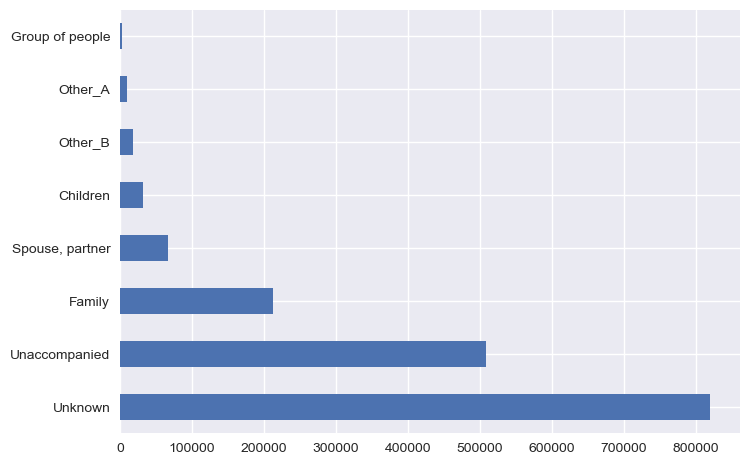

In [110]:
previous_application_df['NAME_TYPE_SUITE'].value_counts().plot.barh()
plt.show()

- <b>NAME_TYPE_SUITE</b> is a categorical column and Unknow catogery seems to have the higest value og above 800000 and above 

In [111]:
null_values_latest_1 = round((previous_application_df.isnull().sum()*100 / len(previous_application_df)).sort_values(ascending=False),2)
null_values_latest

NAME_TYPE_SUITE                49.12
DAYS_FIRST_DRAWING             40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
NFLAG_INSURED_ON_APPROVAL      40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
SK_ID_CURR                      0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
D

In [112]:
null_values_latest[null_values_latest>10]

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

 - dealing with columns AMT_GOODS_PRICE, AMT_ANNUITY, CNT_PAYMENT

In [113]:
previous_application_df['CNT_PAYMENT'].isnull().sum()

372230

In [114]:
#  is a numerical value column, fill null value with 0
previous_application_df['CNT_PAYMENT'].fillna(0,inplace = True) 

In [115]:
previous_application_df['CNT_PAYMENT'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1670209    False
1670210    False
1670211    False
1670212    False
1670213    False
Name: CNT_PAYMENT, Length: 1670214, dtype: bool

In [116]:
previous_application_df.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [117]:
#   fill the null values of AMT_GOODS_PRICE column with mode values
imput_value = previous_application_df.AMT_GOODS_PRICE.mode()[0]
previous_application_df.fillna(imput_value, inplace=True)

In [118]:
previous_application_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved             73  Cash through the bank                XAP          Unknown         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0            42.0                      300.0           42.0              37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved            164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0           134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved            301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0           271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                    XNA             Approved            512  Cash through the bank                XAP          Unknown         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0           482.0                      152.0          182.0             177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                Repairs              Refused            781  Cash through the bank                 HC          Unknown         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high             45000.0         45000.0                    45000.0        45000.0           45000.0                    45000.0
5     1383531      199383         Cash loans    23703.930         315000.0    340573.5         315000.0      Everyday expenses             Approved            684  Cash through the bank                XAP           Family         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         18.0       low_normal          Cash X-Sell: low            365243.0           654.0                      144.0          144.0             137.0                        1.0
6     2315218      175704         Cash loans    45000.000              0.0         0.0          45000.0                    XNA             Canceled             14                    XNA                XAP          Unknown         Repeater                 XNA

---------------------------------------------------------------------

- handeling days columns

In [119]:
previous_application_df['DAYS_DECISION']  #  DAYS_DESISION gives a count of number of days lets group it to years

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

In [120]:

bins = [0, 365, 730, 1095, 1460, 1825, 2190, 2555, np.inf]
slots = ["1", "2", "3", "4", "5", "6", "7", "7 above"]
previous_application_df['DECISION_YEAR'] = pd.cut(previous_application_df['DAYS_DECISION'], bins, labels=slots, right=False)

In [121]:
previous_application_df['DECISION_YEAR']

0          1
1          1
2          1
3          2
4          3
          ..
1670209    2
1670210    5
1670211    5
1670212    4
1670213    4
Name: DECISION_YEAR, Length: 1670214, dtype: category
Categories (8, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7' < '7 above']

### Check for Outliners

In [122]:
previous_application_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06  1.670214e+06     1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06        1.670214e+06    1.670214e+06               1.670214e+06   1.670214e+06      1.670214e+06               1.670214e+06
mean   1.923089e+06  2.783572e+05  2.242826e+04     1.752339e+05  1.961139e+05     1.856429e+05   8.806797e+02      3.139511e+02  1.247621e+01        2.225176e+05    2.765614e+04               3.912734e+04   6.479280e+04      6.798867e+04               1.813436e+04
std    5.325980e+05  1.028148e+05  1.777421e+04     2.927798e+05  3.185745e+05     2.871413e+05   7.790997e+02      7.127443e+03  1.447588e+01        1.610511e+05    5.743354e+04               8.235810e+04   1.161430e+05      1.193243e+05               2.207221e+04
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00        2.000000e+00    2.000000e+00               0.000000e+00   2.000000e+00      2.000000e+00               0.000000e+00
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00  0.000000e+00        4.500000e+04    7.520000e+02               5.360000e+02   8.730000e+02      8.760000e+02               0.000000e+00
50%    1.923110e+06  2.787145e+05  1.544967e+04     7.104600e+04  8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00  1.000000e+01        3.652430e+05    2.289000e+03               2.224000e+03   4.500000e+04      4.500000e+04               1.000000e+00
75%    2.384280e+06  3.675140e+05  4.500000e+04     1.803600e+05  2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01  1.600000e+01        3.652430e+05    4.500000e+04               4.500000e+04   4.500000e+04      4.500000e+04               4.500000e+04
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06  8.400000e+01        3.652430e+05    3.652430e+05               3.652430e+05   3.652430e+05      3.652430e+05               4.500000e+04

- ploting the boxplot graph for the columns which have large difference between there 75% and max value

In [123]:
column_outliner = ['AMT_ANNUITY', 'AMT_CREDIT','AMT_APPLICATION', 'AMT_GOODS_PRICE','DAYS_DECISION', 'SELLERPLACE_AREA','DAYS_TERMINATION','CNT_PAYMENT','DAYS_FIRST_DUE',]

In [124]:
column_outliner

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'DAYS_TERMINATION',
 'CNT_PAYMENT',
 'DAYS_FIRST_DUE']

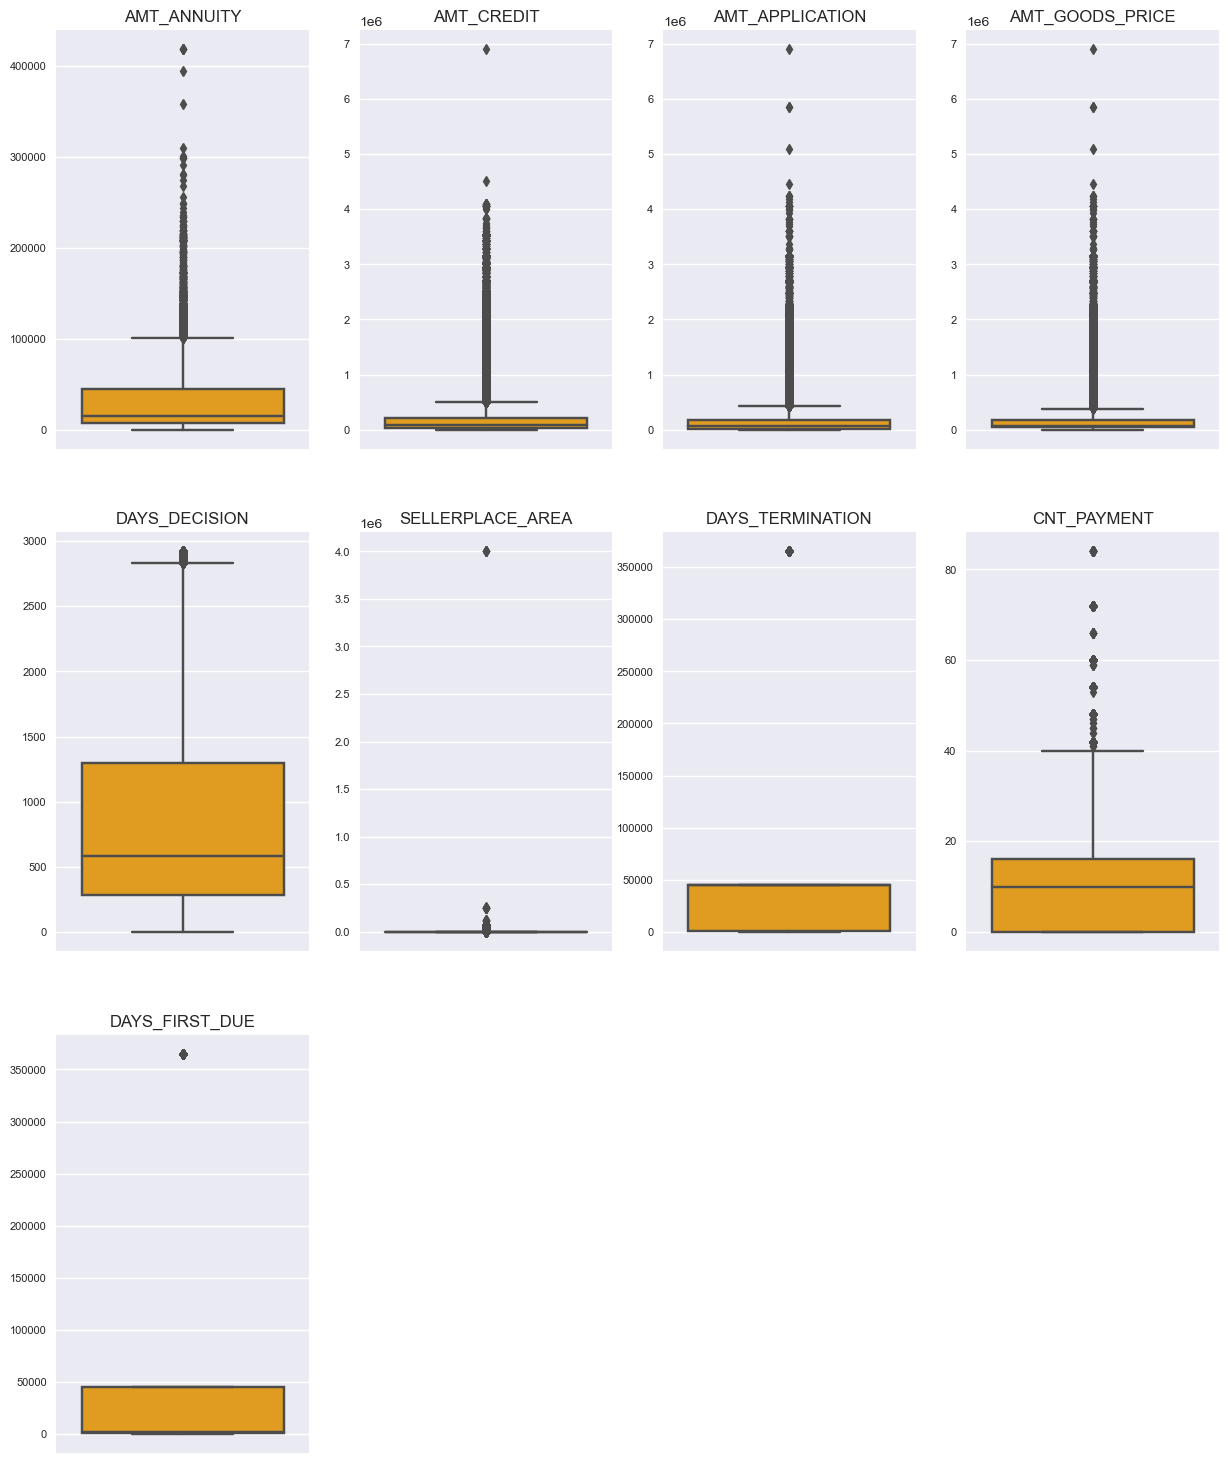

In [125]:

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(column_outliner, range(len(column_outliner))):
    plt.subplot(4,4,j+1)
    sns.boxplot(y = previous_application_df[i], orient = "h", color = "orange")
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)


### Observations: 

- we can see that DAY_DECISION have a very few Outliners
- AMT_ANNUITY, AMT_CREDIT,AMT_APPLICATION, AMT_GOODS_PRICE have a large numbers of Outliners
- CNT_PAYMENT have few outliners

## Data Analysis

The data analysis process is structured as follows:

**Data Analysis Flow:**

1. *Imbalance in Data Analysis*

2. *Categorical Data Analysis*

3. *Categorical Univariate/Bi/Multivariate Analysis*

4. *Numeric Data Analysis*

5. *Bi-Furcation of Data Based on Target Data*

6. *Correlation Matrix*

7. *Numerical Segmented Univariate/Bi/Multivariate Analysis*


By following this planned flow, you'll systematically uncover insights and relationships within the dataset, addressing both categorical and numeric aspects while considering the impact of the target variable.

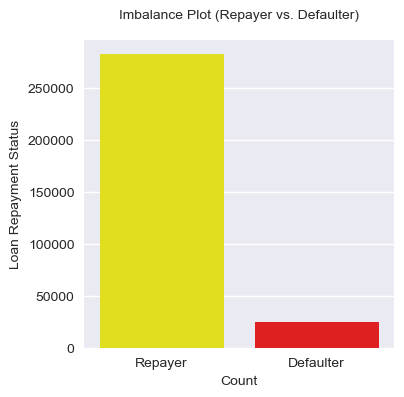

In [126]:
# ploting a bargraph for, defaulters vs Repayers 

plt.figure(figsize=(4, 4))
sns.barplot(y=application_data_df["TARGET"].value_counts().values, x=["Repayer", "Defaulter"], palette=["yellow", "red"])
plt.xlabel("Count", fontdict={"fontsize": 10})
plt.ylabel("Loan Repayment Status", fontdict={"fontsize": 10})
plt.title("Imbalance Plot (Repayer vs. Defaulter)", fontdict={"fontsize": 10}, pad=15)
plt.show()

In [127]:
repayer_percentage = round((sum(application_data_df['TARGET'] == 0)/len(application_data_df)* 100),2)
defaulter_percentage = round((sum(application_data_df["TARGET"] == 1) / len(application_data_df) * 100), 2)
print(f" Defaulter:{defaulter_percentage}% and repayers: {repayer_percentage}%")
print(f"The imbalance ratio concerning Repayers and Defaulters is approximately: {repayer_percentage/defaulter_percentage:.2f}/1 (approx)")

 Defaulter:8.07% and repayers: 91.93%
The imbalance ratio concerning Repayers and Defaulters is approximately: 11.39/1 (approx)


### Oservations:
- we can see that, the count of Repayers is less then Defaulters, 

In [128]:
application_data_df.head(15)

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  FLAG_MOBIL FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE      NAME_INCOME_TYPE  NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  SK_ID_CURR  TARGET WEEKDAY_APPR_PROCESS_START TOTAL_YEARS_OF_EMPLOYMENT RANGE_AMT_CREDIT RANGE_AMT_INCOME RANGE_AMT_GOODS_PRICE
0       24700.5    4.065975            3.510          2.025000                        0.0                         0.0                        0.0                        0.0                         0.0                         1.0            0             1.0           M        9461            637             2120                  1134.0             3648.0                       2.0                       2.0                1           1               Y                       10                        0                            0         Cash loans  Secondary / secondary special  Single / not married  House / apartment               Working    Unaccompanied                       2.0                       2.0        Laborers  Business Entity Type 3                    0.018801                     2                           2                      0                      0                          0                          0      100002       1                  WEDNESDAY                       0-5            4L-5L            2L-3L                 3L-4L
1       35698.5   12.935025           11.295          2.700000                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             2.0           F       16765           1188              291                   828.0             1186.0                       0.0                       0.0                1           1               N                       11                        0                            0         Cash loans               Higher education               Married  House / apartment         State servant           Family                       1.0                       1.0      Core staff                  School                    0.003541                     1                           1                      0                      0                          0                          0      100003       0                     MONDAY                       0-5              NaN            2L-3L                   NaN
2        6750.0    1.350000            1.350          0.675000                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             1.0           M       19046            225             2531                   815.0             4260.0                       0.0                       0.0                0           1               Y                        9                        0                            0    Revolving loans  Secondary / secondary special  Single / not married  House / apartment               Working    Unaccompanied                       0.0                       0.0        Laborers              Government                    0.010032                     2                  

In [129]:
previous_application_df.head(15)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE     NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL DECISION_YEAR
0      2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved             73  Cash through the bank                XAP          Unknown         Repeater                  Mobile            POS               XNA             Country-wide                35          Connectivity         12.0           middle        POS mobile with interest            365243.0            42.0                      300.0           42.0              37.0                        0.0             1
1      2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved            164                    XNA                XAP    Unaccompanied         Repeater                     XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action                Cash X-Sell: low            365243.0           134.0                      916.0       365243.0          365243.0                        1.0             1
2      2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved            301  Cash through the bank                XAP  Spouse, partner         Repeater                     XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high               Cash X-Sell: high            365243.0           271.0                       59.0       365243.0          365243.0                        1.0             1
3      2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                    XNA             Approved            512  Cash through the bank                XAP          Unknown         Repeater                     XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle             Cash X-Sell: middle            365243.0           482.0                      152.0          182.0             177.0                        1.0             2
4      1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                Repairs              Refused            781  Cash through the bank                 HC          Unknown         Repeater                     XNA           Cash           walk-in  Credit and cash offices                -1                   XNA         24.0             high               Cash Street: high             45000.0         45000.0                    45000.0        45000.0           45000.0                    45000.0             3
5      1383531      199383         Cash loans    23703.930         315000.0    340573.5         315000.0      Everyday expenses             Approved            684  Cash through the bank                XAP           Family         Repeater                     XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         18.0       low_normal                Cash X-Sell: low            365243.0           654.0                      144.0          144.0             137.0                        1.0             2
6      2315218      175704         Cash loans    45000.000              0.0  

In [130]:
def get_column_data_type(dataset_df, column):
    if dataset_df[column].dtype == np.int64 or dataset_df[column].dtype == np.float64:
        return "numerical"
    elif dataset_df[column].dtype == "category":
        return "categorical"

def analyze_univariate(dataset_df, column, target_col, ylog=False, x_label_angle=False, h_layout=True):
    if get_column_data_type(dataset_df, column) == "numerical":
        sns.distplot(dataset_df[column], hist=False)
    elif get_column_data_type(dataset_df, column) == "categorical":
        val_count = dataset_df[column].value_counts()
        df1 = pd.DataFrame({column: val_count.index, 'count': val_count.values})
        target_percentage = dataset_df[[column, target_col]].groupby([column], as_index=False).mean()
        target_percentage[target_col] = target_percentage[target_col] * 100
        target_percentage.sort_values(by=target_col, inplace=True)
        
        if h_layout:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 20))
        
        s = sns.countplot(ax=ax1, x=column, data=dataset_df, hue=target_col, )
        ax1.set_title(column, fontsize=15)
        ax1.legend(['repayer', 'defaulter'])
        ax1.set_xlabel(column, fontdict={'fontsize': 15, 'fontweight': 2})
        
        if x_label_angle:
            s.set_xticklabels(s.get_xticklabels(), rotation=60)
        
        s = sns.barplot(ax=ax2, x=column, y=target_col, data=target_percentage,)
        ax2.set_title("defaulters % in " + column, fontsize=15)
        ax2.set_xlabel(column, fontdict={'fontsize': 10, 'fontweight': 2})
        ax2.set_ylabel(target_col, fontdict={'fontsize': 10, 'fontweight': 2})
        
        if x_label_angle:
            s.set_xticklabels(s.get_xticklabels(), rotation=60)
            
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 2})
        else:
            ax1.set_ylabel("Count", fontdict={'fontsize': 10, 'fontweight': 2})
        plt.show()


#### univeriant analysis 

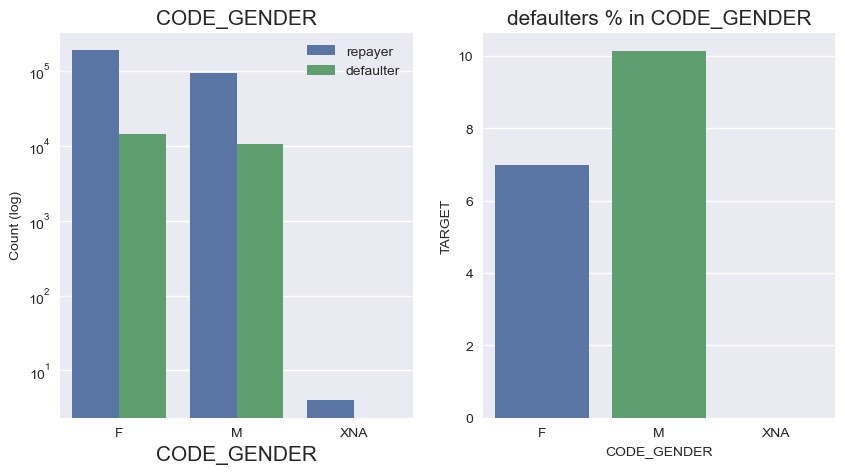

In [131]:
# 1)  Examining the Impact of Gender on Loan Repayment Status
analyze_univariate(application_data_df,"CODE_GENDER","TARGET",True,False,True)



Observation: **Gender Type**

The number of female customers is almost double that of male customers. According to the
loan insufficiency percentage, mens have the high chance of not repaying the loan around 10%, where as women have around 7%.

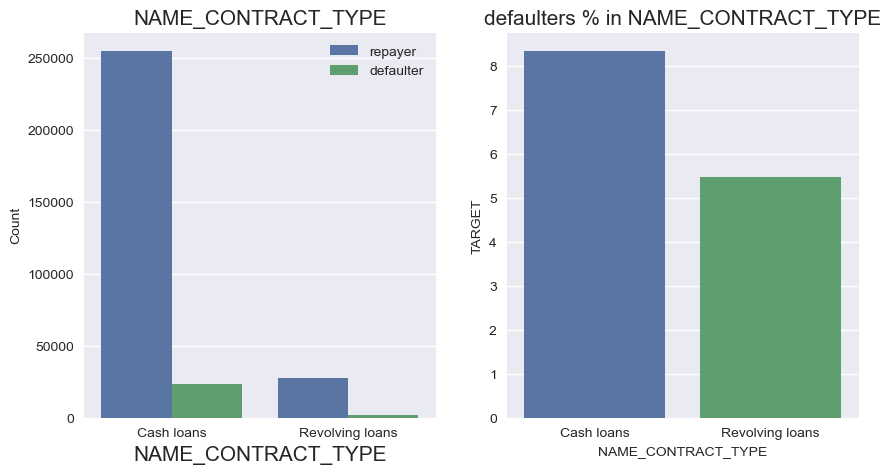

In [132]:
# 2) Analyzing Contract Types Based on Loan Repayment Status

analyze_univariate(application_data_df,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

Observation: **Contract types**

Revolving loans represent only a small fraction (10%) of all loans
About 8-9% of loan applicants and 5-6% of people claim the loan back if they default

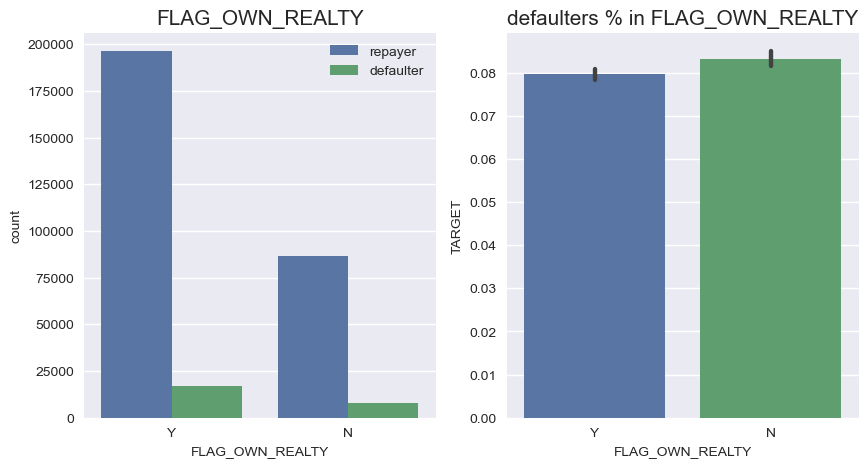

In [133]:
#  3) Investigating the Relationship Between Real Estate Ownership and Loan Repayment Status

fig, (gh1, gh2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.barplot(ax=gh2,x='FLAG_OWN_REALTY', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in FLAG_OWN_REALTY", fontsize=15)
gh2.set_xlabel('FLAG_OWN_REALTY', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})

sns.countplot(ax=gh1, x='FLAG_OWN_REALTY', data=application_data_df, hue='TARGET', )
gh1.set_title('FLAG_OWN_REALTY', fontsize=15)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('FLAG_OWN_REALTY', fontdict={'fontsize': 10, 'fontweight': 2})
plt.show()

### Observation:

- applicants who have real estate properties are double then the applicants who donst own any real estate 
- The defaulter count for both groups is approximately the same. Therefore, we can assume that there is no corelation between the authenticity of the loans and their default.

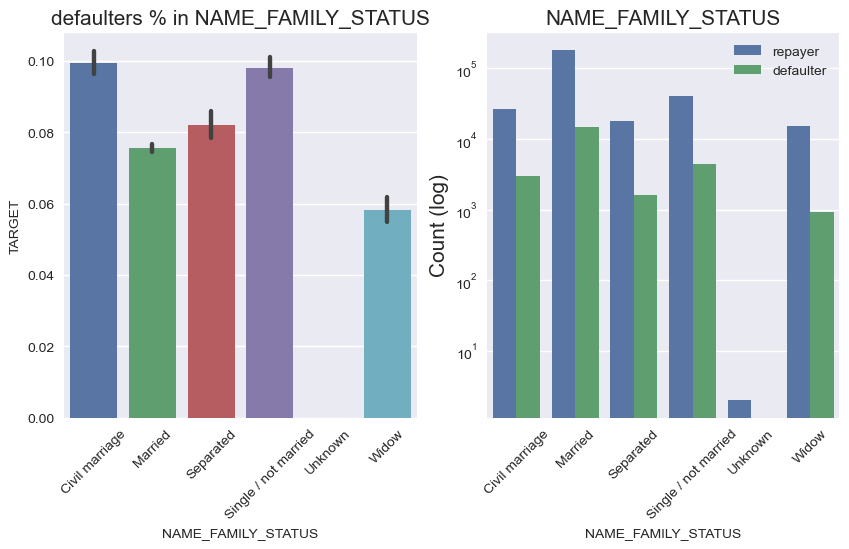

In [134]:
#  4) Examining Family Status in Relation to Loan Repayment Status

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(10, 5))

gh = sns.barplot(ax=gh2,x='NAME_FAMILY_STATUS', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in " + 'NAME_FAMILY_STATUS', fontsize=15)
gh2.set_xlabel('NAME_FAMILY_STATUS', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)


gh = sns.countplot(ax=gh1, x='NAME_FAMILY_STATUS', data=application_data_df, hue='TARGET', )
gh1.set_title('NAME_FAMILY_STATUS', fontsize=15)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('NAME_FAMILY_STATUS', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

#### Observation :
from the above subplots we can say that,
- When considering the percentage of defaulters, civil marriages exhibit the highest rate at approximately above 9.5%, while widows have the lowest rate at around 5.8%, with the exception of the "Unknown" category.
- The majority of loan applicants are married, followed by those who are single or not married,and those in civil marriages

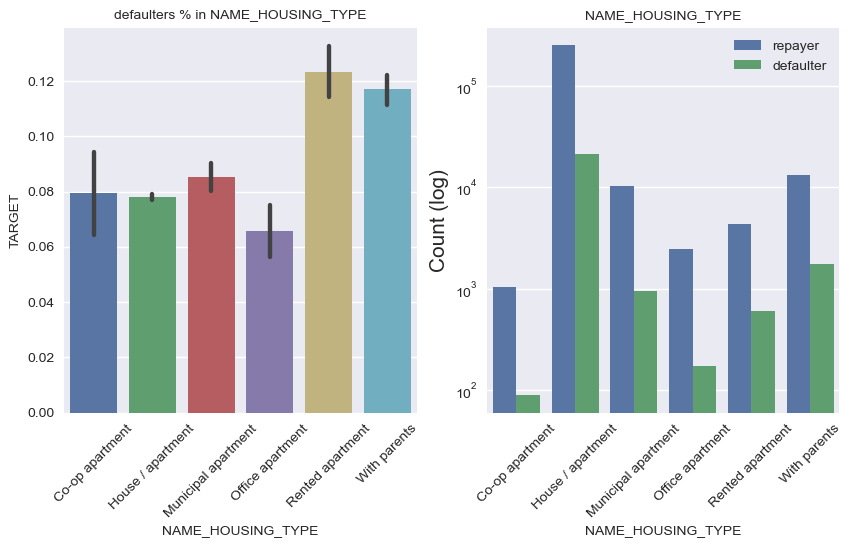

In [135]:
# 5) Exploring Housing Types in Relation to Loan Repayment Status

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(10, 5))

gh = sns.barplot(ax=gh2,x='NAME_HOUSING_TYPE', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in " + 'NAME_HOUSING_TYPE', fontsize=10)
gh2.set_xlabel('NAME_HOUSING_TYPE', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh = sns.countplot(ax=gh1, x='NAME_HOUSING_TYPE', data=application_data_df, hue='TARGET', )
gh1.set_title('NAME_HOUSING_TYPE', fontsize=10)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('NAME_HOUSING_TYPE', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

### Observation :

from the above subplots we can say that,
- clients who live in rented apartments (~12%) and with parents (~11.5%) are more likly to be a defaulters
- people leaving in co-op apartment and office apartment have low rate being a defaulters 

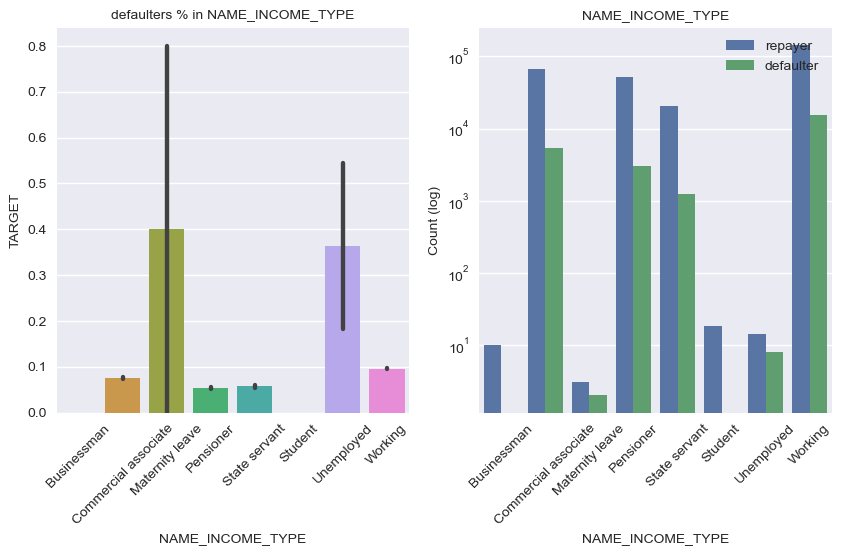

In [136]:
#  6) Evaluating Income Types in Relation to Loan Repayment Status

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(10, 5))

gh = sns.barplot(ax=gh2,x='NAME_INCOME_TYPE', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in " + 'NAME_INCOME_TYPE', fontsize=10)
gh2.set_xlabel('NAME_INCOME_TYPE', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)


gh = sns.countplot(ax=gh1, x='NAME_INCOME_TYPE', data=application_data_df, hue='TARGET', )
gh1.set_title('NAME_INCOME_TYPE', fontsize=10)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('NAME_INCOME_TYPE', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3})
plt.show()

### Observations:
from the above graph we can say that, 
- businessman and students have very less default rates
- consumers on maternity leave and unemployed are more likly to become defaulters as thay dont have  any source of income
- consumers comming under income type: working are the one who takes the loan follower by commercial associates and pensioners 

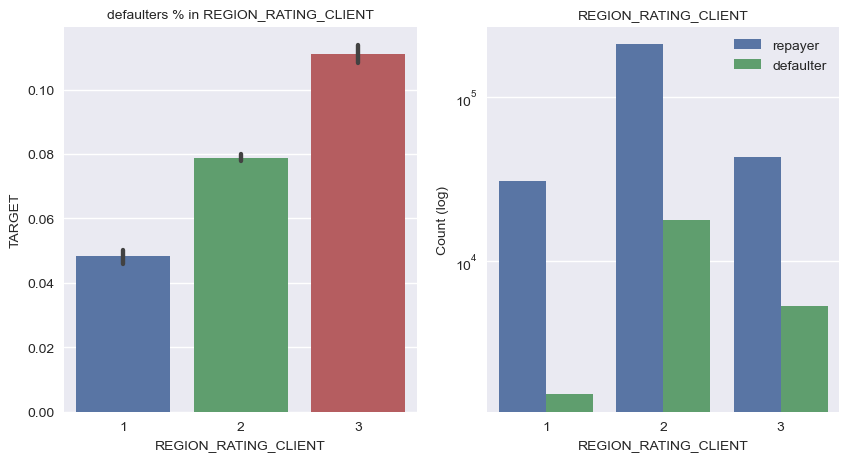

In [137]:
# 7) Evaluating the Relationship Between Applicant's Region Rating and Loan Repayment Status

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(10, 5))

gh = sns.barplot(ax=gh2,x='REGION_RATING_CLIENT', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in " + 'REGION_RATING_CLIENT', fontsize=10)
gh2.set_xlabel('REGION_RATING_CLIENT', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})

gh = sns.countplot(ax=gh1, x='REGION_RATING_CLIENT', data=application_data_df, hue='TARGET', )
gh1.set_title('REGION_RATING_CLIENT', fontsize=10)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('REGION_RATING_CLIENT', fontdict={'fontsize': 10, 'fontweight': 2})

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3})
plt.show()

### Observations:
from the above graph we can say that,

- applicants living in the Region 3 have higest default rate
- applicants from region 2 have taken the higest loan and also repayed 

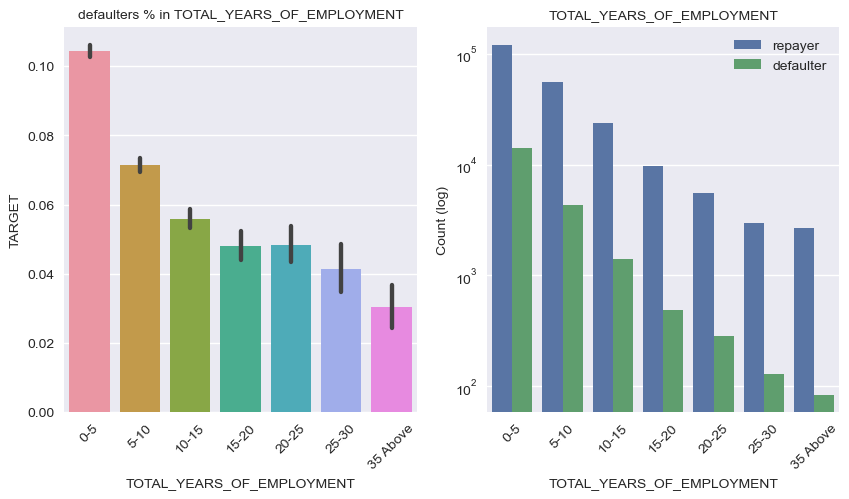

In [138]:
# 8) Analyzing Loan Repayment Status with Respect to Employment Year

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(10, 5))

gh = sns.barplot(ax=gh2,x='TOTAL_YEARS_OF_EMPLOYMENT', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in " + 'TOTAL_YEARS_OF_EMPLOYMENT', fontsize=10)
gh2.set_xlabel('TOTAL_YEARS_OF_EMPLOYMENT', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh = sns.countplot(ax=gh1, x='TOTAL_YEARS_OF_EMPLOYMENT', data=application_data_df, hue='TARGET', )
gh1.set_title('TOTAL_YEARS_OF_EMPLOYMENT', fontsize=10)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('TOTAL_YEARS_OF_EMPLOYMENT', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3})
plt.show()

### Observations:
from the above plot we can say that,

- applicants working in between 0-5 years have high default rate follower by 5-10 years,
- applicants with 35+ and above have approximatly   30% default rate
- default rate is decresing with increase in the year of experiance

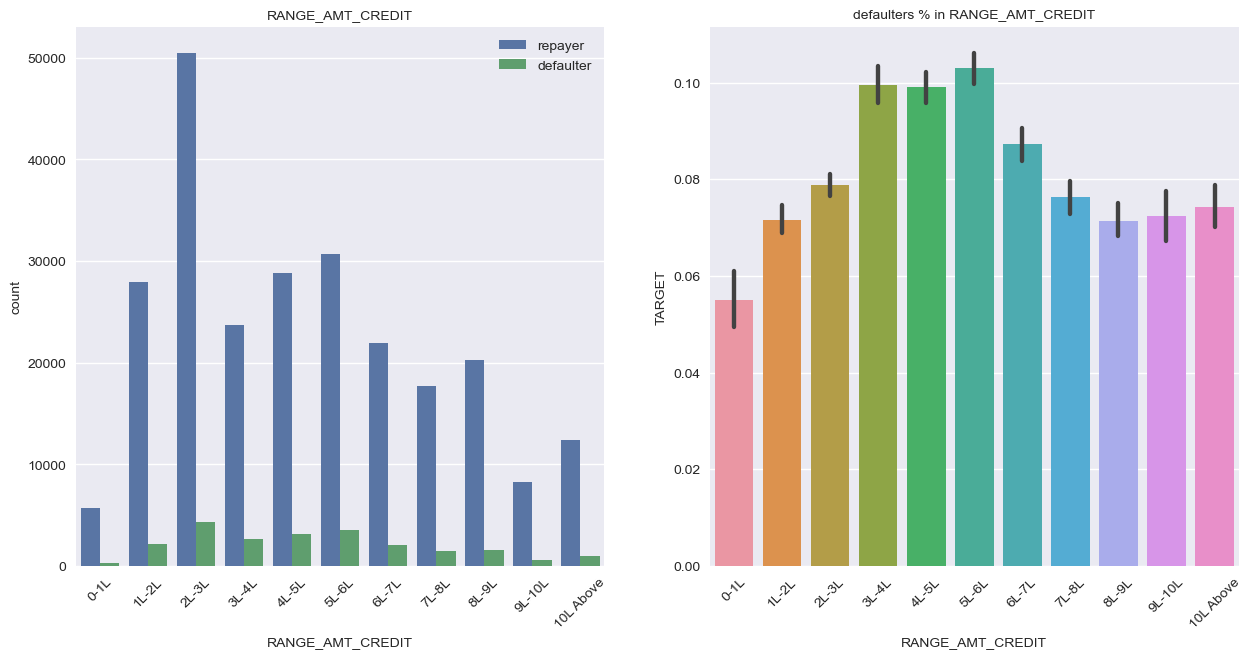

In [139]:
#  9) Analyzing Loan Repayment Status in Relation to Credit Amount

fig, (gh1, gh2) = plt.subplots(ncols=2, figsize=(15,7))

gh = sns.barplot(ax=gh2,x='RANGE_AMT_CREDIT', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in " + 'RANGE_AMT_CREDIT', fontsize=10)
gh2.set_xlabel('RANGE_AMT_CREDIT', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh = sns.countplot(ax=gh1, x='RANGE_AMT_CREDIT', data=application_data_df, hue='TARGET', )
gh1.set_title('RANGE_AMT_CREDIT', fontsize=10)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('RANGE_AMT_CREDIT', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)
plt.show()

###  Observations:
from the above plot we can say that,

- most of the applicants have taken the loan of 2L-3L range amount 
- applicants who have taken loan amount in the range of  6L-7L, 3L-4L, 4L-5L have the default higest rate 

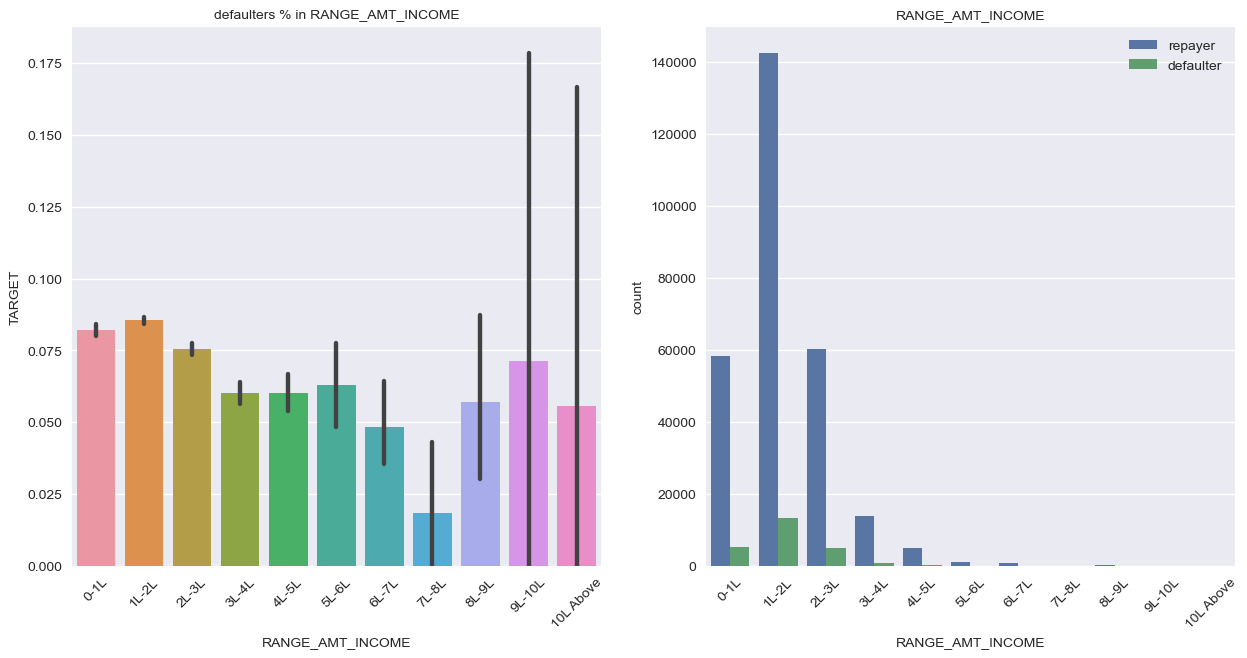

In [140]:
# 10)Analyzing Loan Repayment Status in Relation to Income Range

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(15,7))

gh = sns.barplot(ax=gh2,x='RANGE_AMT_INCOME', y='TARGET', data=application_data_df,)
gh2.set_title("defaulters % in RANGE_AMT_INCOME", fontsize=10)
gh2.set_xlabel('RANGE_AMT_INCOME', fontdict={'fontsize': 10, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh = sns.countplot(ax=gh1, x='RANGE_AMT_INCOME', data=application_data_df, hue='TARGET', )
gh1.set_title('RANGE_AMT_INCOME', fontsize=10)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('RANGE_AMT_INCOME', fontdict={'fontsize': 10, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

# gh1.set_yscale('log')
# gh1.set_ylabel("Count (log)", fontdict={'fontsize': 20, 'fontweight': 3})

plt.show()


### Observations:
from the above graph we can say that,

- Applicants with incomes 5L and above appear to be less prone to default.
- most of applications have an income total of less than 3 Lakhs. 
- Applicants with incomes below 3 Lakhs shows a higher likelihood of defaulting. 


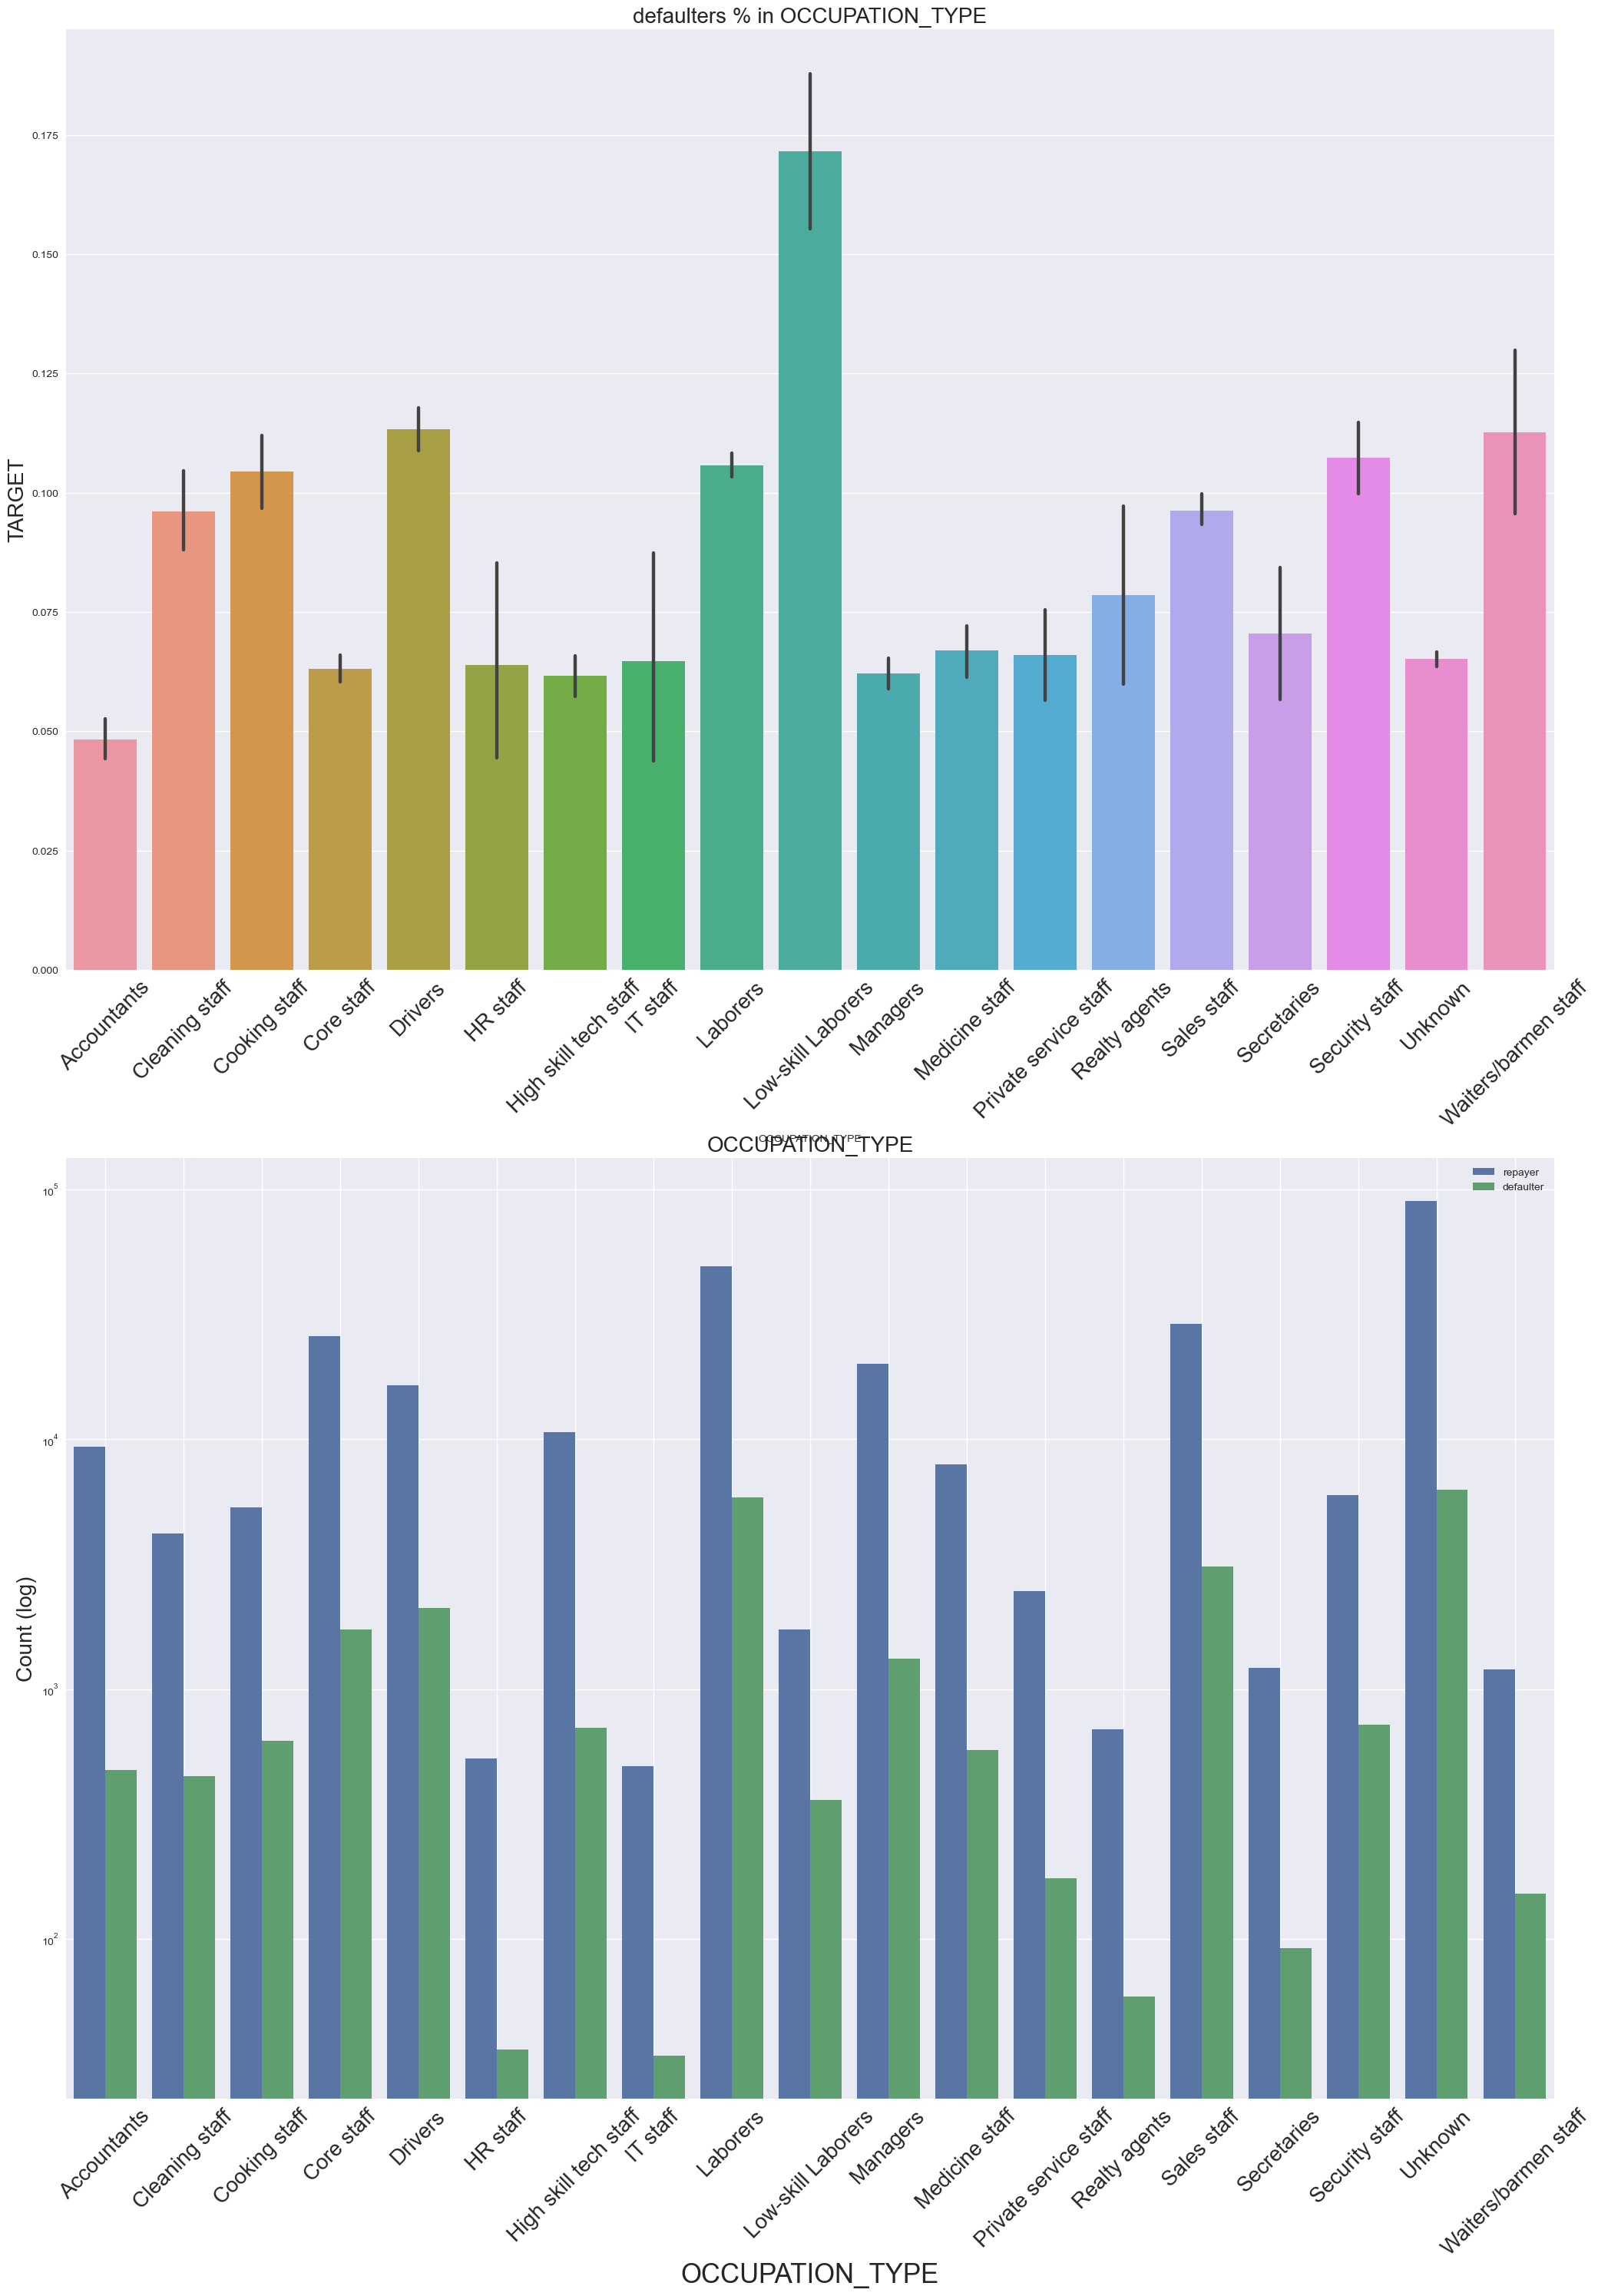

In [170]:
# 11) Exploring Occupation Types in Relation to Applicant's Loan Repayment Status


fig, (gh2, gh1) = plt.subplots(nrows=2, figsize=(25,35))

gh = sns.barplot(ax=gh2,x='OCCUPATION_TYPE', y='TARGET', data=application_data_df)
gh2.set_title('defaulters % in OCCUPATION_TYPE', fontsize=20)
# gh2.set_xlabel('OCCUPATION_TYPE', fontdict={'fontsize': 25, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 20, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45, fontsize=20)



gh = sns.countplot(ax=gh1, x='OCCUPATION_TYPE', data=application_data_df, hue='TARGET')
gh1.set_title('OCCUPATION_TYPE', fontsize=20)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('OCCUPATION_TYPE', fontdict={'fontsize': 25, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45,fontsize=20)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 20, 'fontweight': 3})

plt.grid(True)
plt.show()

### Observations:
from the above graph we can say that, 

- low skills labour have the highest default rate, follower by waiters/barmen staffs and Drivers
- HR staffs and IT staffs seems not much interested in applying for loan
- Labours, sales staffs, and core staffs are more lik;y to take loans 

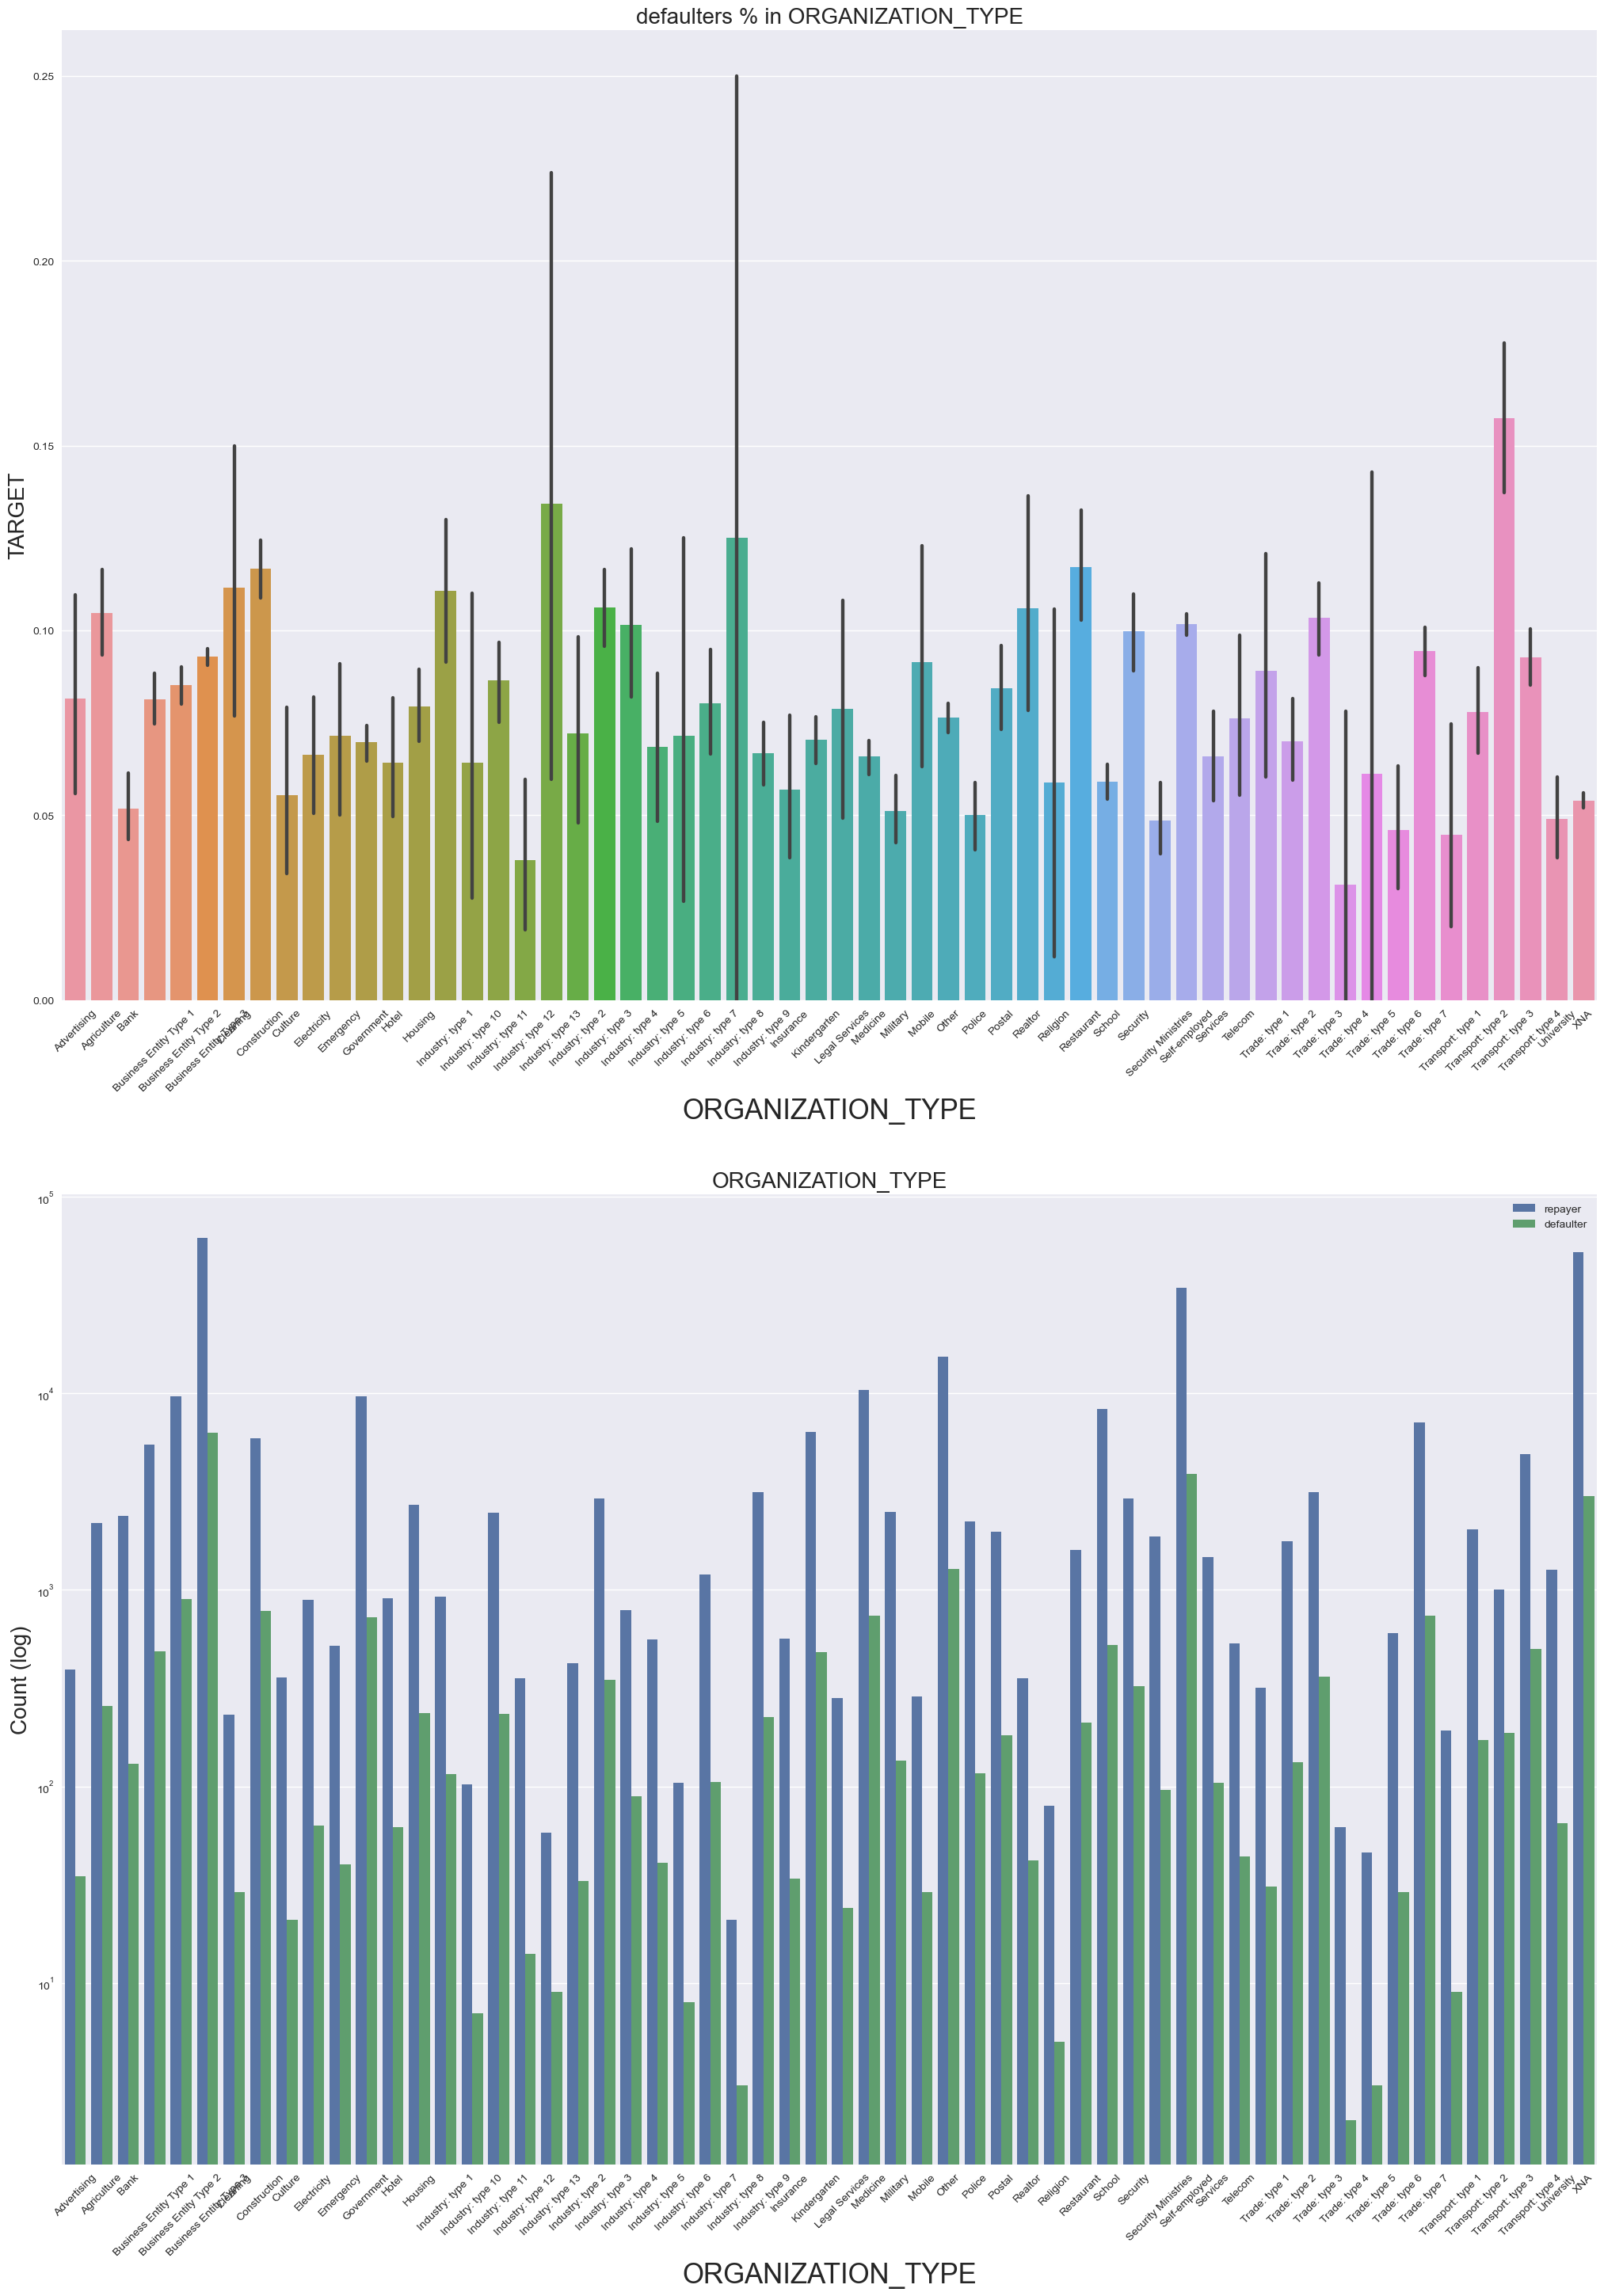

In [142]:
# 12) Examining Loan Repayment Status Based on Organization Type

fig, (gh2, gh1) = plt.subplots(nrows=2, figsize=(25,35))

gh = sns.barplot(ax=gh2,x='ORGANIZATION_TYPE', y='TARGET', data=application_data_df,)
gh2.set_title('defaulters % in ORGANIZATION_TYPE', fontsize=20)
gh2.set_xlabel('ORGANIZATION_TYPE', fontdict={'fontsize': 25, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 20, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)


gh = sns.countplot(ax=gh1, x='ORGANIZATION_TYPE', data=application_data_df, hue='TARGET', )
gh1.set_title('ORGANIZATION_TYPE', fontsize=20)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('ORGANIZATION_TYPE', fontdict={'fontsize': 25, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 20, 'fontweight': 3})

plt.show()

### Observations :
from the above graph we can say that,

- Transport: type 2, Industry: type 12, Industry: type 7 seen to have hife default rates
- Trade: type 3, Industry: type 11 have least default rates
- A significant number of applications lack organization type information (labeled as "XNA")
- The majority of loan applications originate from individuals associated with Business Entity Type 3
- Self-employed individuals exhibit a relatively higher defaulting rate. To ensure prudence, it's advisable to either refrain from disbursing loans to them or consider offering loans with a higher interest rate as a risk mitigation strategy against potential defaults.

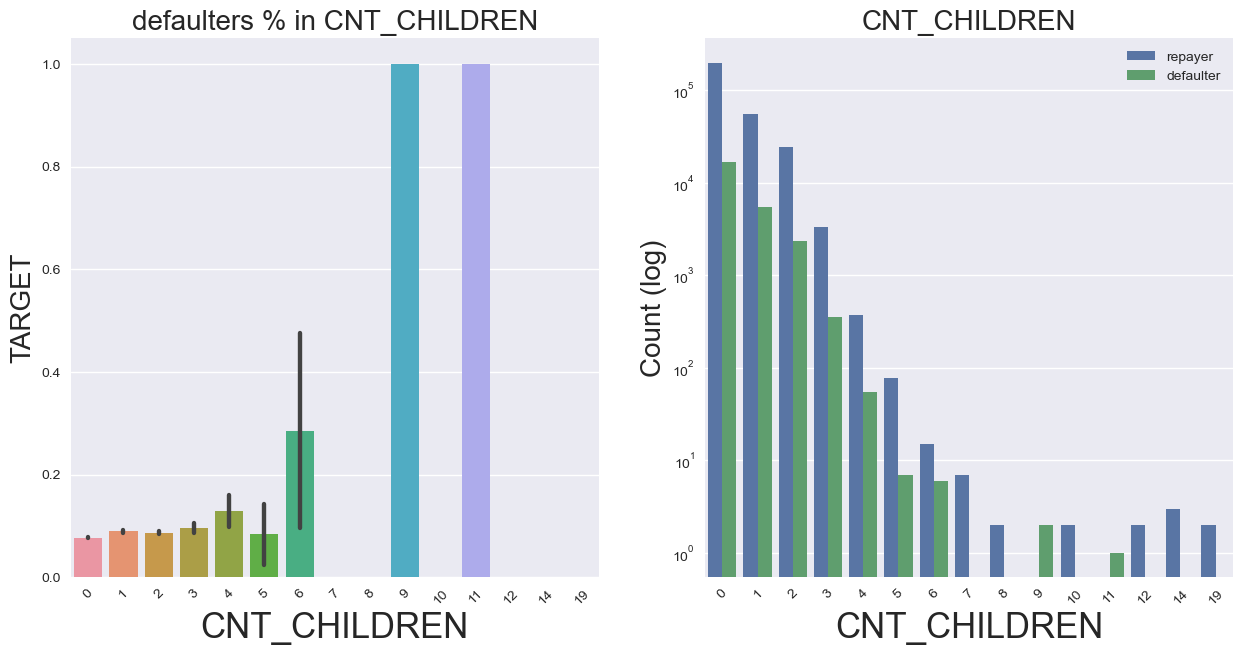

In [143]:
# Analyzing Loan Repayment Status in Relation to Number of Children

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(15,7))

gh = sns.barplot(ax=gh2,x='CNT_CHILDREN', y='TARGET', data=application_data_df,)
gh2.set_title('defaulters % in CNT_CHILDREN', fontsize=20)
gh2.set_xlabel('CNT_CHILDREN', fontdict={'fontsize': 25, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 20, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)


gh = sns.countplot(ax=gh1, x='CNT_CHILDREN', data=application_data_df, hue='TARGET', )
gh1.set_title('CNT_CHILDREN', fontsize=20)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('CNT_CHILDREN', fontdict={'fontsize': 25, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 20, 'fontweight': 3})

plt.show()

### Observations:

from the above grapg we can say that,

- Applicants having childern more then 5 have the higher default rates
- Applicants having childerun count less then 4 seem to take loan more

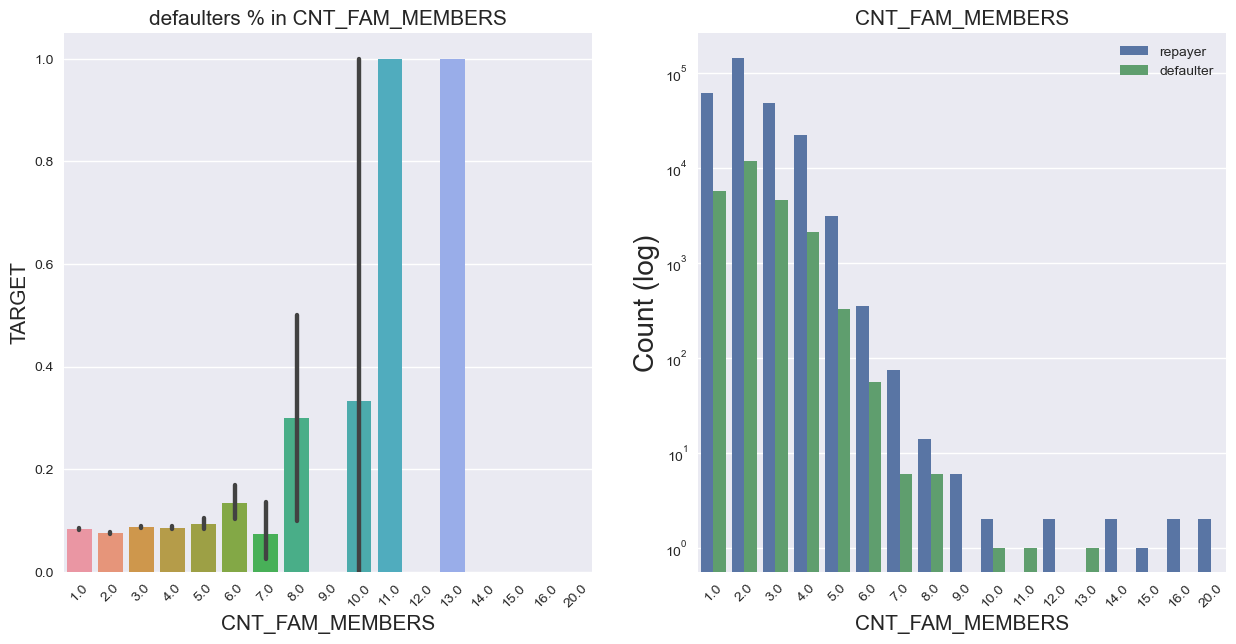

In [144]:
# Analyzing Loan Repayment Status Based on Number of Family Members

fig, (gh2, gh1) = plt.subplots(ncols=2, figsize=(15,7))

gh = sns.barplot(ax=gh2,x='CNT_FAM_MEMBERS', y='TARGET', data=application_data_df,)
gh2.set_title('defaulters % in CNT_FAM_MEMBERS', fontsize=15)
gh2.set_xlabel('CNT_FAM_MEMBERS', fontdict={'fontsize': 15, 'fontweight': 2})
gh2.set_ylabel('TARGET', fontdict={'fontsize': 15, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)


gh = sns.countplot(ax=gh1, x='CNT_FAM_MEMBERS', data=application_data_df, hue='TARGET', )
gh1.set_title('CNT_FAM_MEMBERS', fontsize=15)
gh1.legend(['repayer', 'defaulter'])
gh1.set_xlabel('CNT_FAM_MEMBERS', fontdict={'fontsize': 15, 'fontweight': 2})
gh.set_xticklabels(gh.get_xticklabels(), rotation=45)

gh1.set_yscale('log')
gh1.set_ylabel("Count (log)", fontdict={'fontsize': 20, 'fontweight': 3})

plt.show()

### Observation:

- The pattern located for own family members follows same pattern as that of no of children.  having a more  family members  seems to elevate the chance of loan defaulting.

In [145]:
# performing a bivariant analysis Between NAME_INCOME_TYPE and AMT_INCOME_TOTAL 
application_data_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

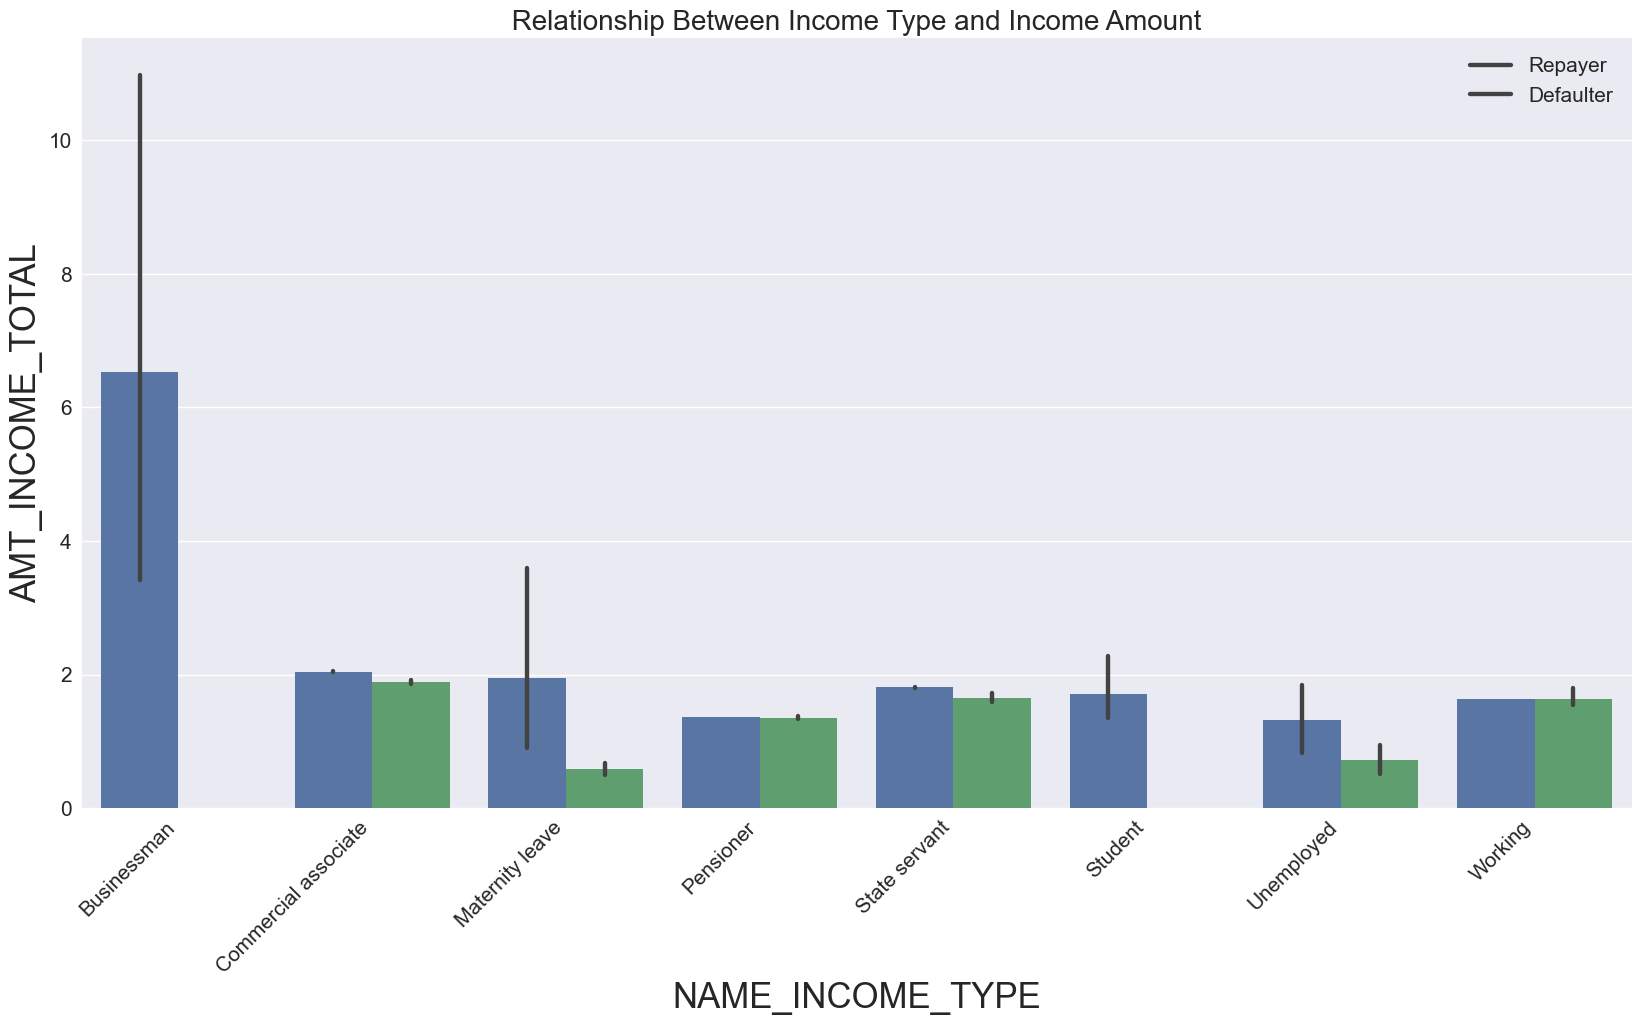

In [146]:
# Visualizing the Relationship Between Income Type and Income Amount Range Using a Seaborn Barplot

plt.figure(figsize=(20,10))
sns.barplot(x="NAME_INCOME_TYPE",y='AMT_INCOME_TOTAL',data=application_data_df, hue="TARGET")     
plt.xlabel('NAME_INCOME_TYPE',fontsize = 25)    
plt.ylabel('AMT_INCOME_TOTAL',fontsize = 25)    
plt.title(' Relationship Between Income Type and Income Amount ',fontsize = 20) 
plt.xticks(rotation=45, ha='right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(labels = ['Repayer','Defaulter'],fontsize = 15)
plt.show()

### Observation:

- default rate for business man is almost to zero,
- Observing the barplot, it's evident that individuals categorized as "Businessman" exhibit the highest income level. Additionally, considering the estimated range with a 95% confidence level, it appears that the income of a "Businessman" falls within a range slightly below 4 lakhs and extends slightly beyond 10 lakhs.


## Analysis Numerical columns

In [147]:
application_data_df.head(10)

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  FLAG_MOBIL FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE      NAME_INCOME_TYPE  NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  SK_ID_CURR  TARGET WEEKDAY_APPR_PROCESS_START TOTAL_YEARS_OF_EMPLOYMENT RANGE_AMT_CREDIT RANGE_AMT_INCOME RANGE_AMT_GOODS_PRICE
0      24700.5    4.065975            3.510             2.025                        0.0                         0.0                        0.0                        0.0                         0.0                         1.0            0             1.0           M        9461            637             2120                  1134.0             3648.0                       2.0                       2.0                1           1               Y                       10                        0                            0         Cash loans  Secondary / secondary special  Single / not married  House / apartment               Working    Unaccompanied                       2.0                       2.0        Laborers  Business Entity Type 3                    0.018801                     2                           2                      0                      0                          0                          0      100002       1                  WEDNESDAY                       0-5            4L-5L            2L-3L                 3L-4L
1      35698.5   12.935025           11.295             2.700                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             2.0           F       16765           1188              291                   828.0             1186.0                       0.0                       0.0                1           1               N                       11                        0                            0         Cash loans               Higher education               Married  House / apartment         State servant           Family                       1.0                       1.0      Core staff                  School                    0.003541                     1                           1                      0                      0                          0                          0      100003       0                     MONDAY                       0-5              NaN            2L-3L                   NaN
2       6750.0    1.350000            1.350             0.675                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             1.0           M       19046            225             2531                   815.0             4260.0                       0.0                       0.0                0           1               Y                        9                        0                            0    Revolving loans  Secondary / secondary special  Single / not married  House / apartment               Working    Unaccompanied                       0.0                       0.0        Laborers              Government                    0.010032                     2                     

In [148]:
numerical_columns = ['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_REQ_CREDIT_BUREAU_DAY',
                     'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_CHILDREN','CNT_FAM_MEMBERS',
                     'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                     'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER' ,
                     'FLAG_OWN_REALTY','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','OCCUPATION_TYPE',
                     'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                     'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                     'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE',
                     'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_3']
len(numerical_columns)

37

In [149]:
Repayer = application_data_df[application_data_df['TARGET'] == 0][numerical_columns]
Repayer

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3
1           35698.5   12.935025           11.295             2.700                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             2.0       16765           1188              291                   828.0                       11                     1                           1       0         Cash loans           F               N  House / apartment                    0.003541      Core staff                     MONDAY                          0                          0                            0                      0                      0                        0                  School                       1.0                       0.0                1
2            6750.0    1.350000            1.350             0.675                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             1.0       19046            225             2531                   815.0                        9                     2                           2       0    Revolving loans           M               Y  House / apartment                    0.010032        Laborers                     MONDAY                          0                          0                            0                      0                      0                        0              Government                       0.0                       0.0                0
3           29686.5    3.126825            2.970             1.350                        0.0                         0.0                        0.0                        0.0                         0.0                         1.0            0             2.0       19005           3039             2437                   617.0                       17                     2                           2       0         Cash loans           F               Y  House / apartment                    0.008019        Laborers                  WEDNESDAY                          0                          0                            0                      0                      0                        0  Business Entity Type 3                       2.0                       0.0                1
4           21865.5    5.130000            5.130             1.215                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             1.0       19932           3038             3458                  1106.0                       11                     2                           2       0         Cash loans           M               Y  House / apartment                    0.028663      Core staff                   THURSDAY                          0                          0                            0                      0                      1                        1                Religion                       0.0                       0.0                0
5           27517.5    4.904

In [150]:
Defaulter = application_data_df[application_data_df['TARGET'] == 1][numerical_columns]
Defaulter

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3
0           24700.5    4.065975            3.510             2.025                        0.0                         0.0                        0.0                        0.0                         0.0                         1.0            0             1.0        9461            637             2120                  1134.0                       10                     2                           2       1         Cash loans           M               Y  House / apartment                    0.018801        Laborers                  WEDNESDAY                          0                          0                            0                      0                      0                        0  Business Entity Type 3                       2.0                       2.0                1
26          27076.5    9.799920            7.020             1.125                        0.0                         0.0                        0.0                        2.0                         0.0                         2.0            0             1.0       18724           2628             1827                   161.0                        9                     3                           2       1         Cash loans           F               Y  House / apartment                    0.018029   Cooking staff                     MONDAY                          0                          0                            0                      0                      0                        0  Business Entity Type 3                      10.0                       0.0                1
40          35028.0   11.935800            8.550             2.025                        0.0                         0.0                        2.0                        0.0                         0.0                         4.0            0             2.0       17482           1262             1029                  1075.0                        9                     2                           2       1         Cash loans           M               Y  House / apartment                    0.025164        Laborers                    TUESDAY                          0                          0                            0                      0                      0                        0  Business Entity Type 3                       0.0                       0.0                1
42          16258.5    2.888730            2.385             1.350                        0.0                         0.0                        0.0                        0.0                         0.0                         2.0            0             2.0       13384           3597             4409                  1480.0                       11                     3                           3       1         Cash loans           F               N  House / apartment                    0.007305     Sales staff                   THURSDAY                          0                          0                            0                      0                      0                        0           Self-employed                       1.0                       0.0                1
81          14593.5    2.520

In [151]:
repayer_corr = Repayer.corr().unstack()
repayer_corr_df = repayer_corr[(repayer_corr != 1) & (repayer_corr.abs() > 0.5)].reset_index()
repayer_corr_df.columns = ['variables1', 'variables2', 'Corr']
repayer_corr_df.sort_values(by='Corr', ascending=False, inplace=True)
repayer_corr_df = repayer_corr_df.head(10)
repayer_corr_df

variables1                  variables2      Corr
3                  AMT_CREDIT             AMT_GOODS_PRICE  0.987250
5             AMT_GOODS_PRICE                  AMT_CREDIT  0.987250
1                 AMT_ANNUITY             AMT_GOODS_PRICE  0.776686
4             AMT_GOODS_PRICE                 AMT_ANNUITY  0.776686
0                 AMT_ANNUITY                  AMT_CREDIT  0.771309
2                  AMT_CREDIT                 AMT_ANNUITY  0.771309
6                  DAYS_BIRTH               DAYS_EMPLOYED  0.626114
7               DAYS_EMPLOYED                  DAYS_BIRTH  0.626114
8        REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE -0.539005
9  REGION_POPULATION_RELATIVE        REGION_RATING_CLIENT -0.539005

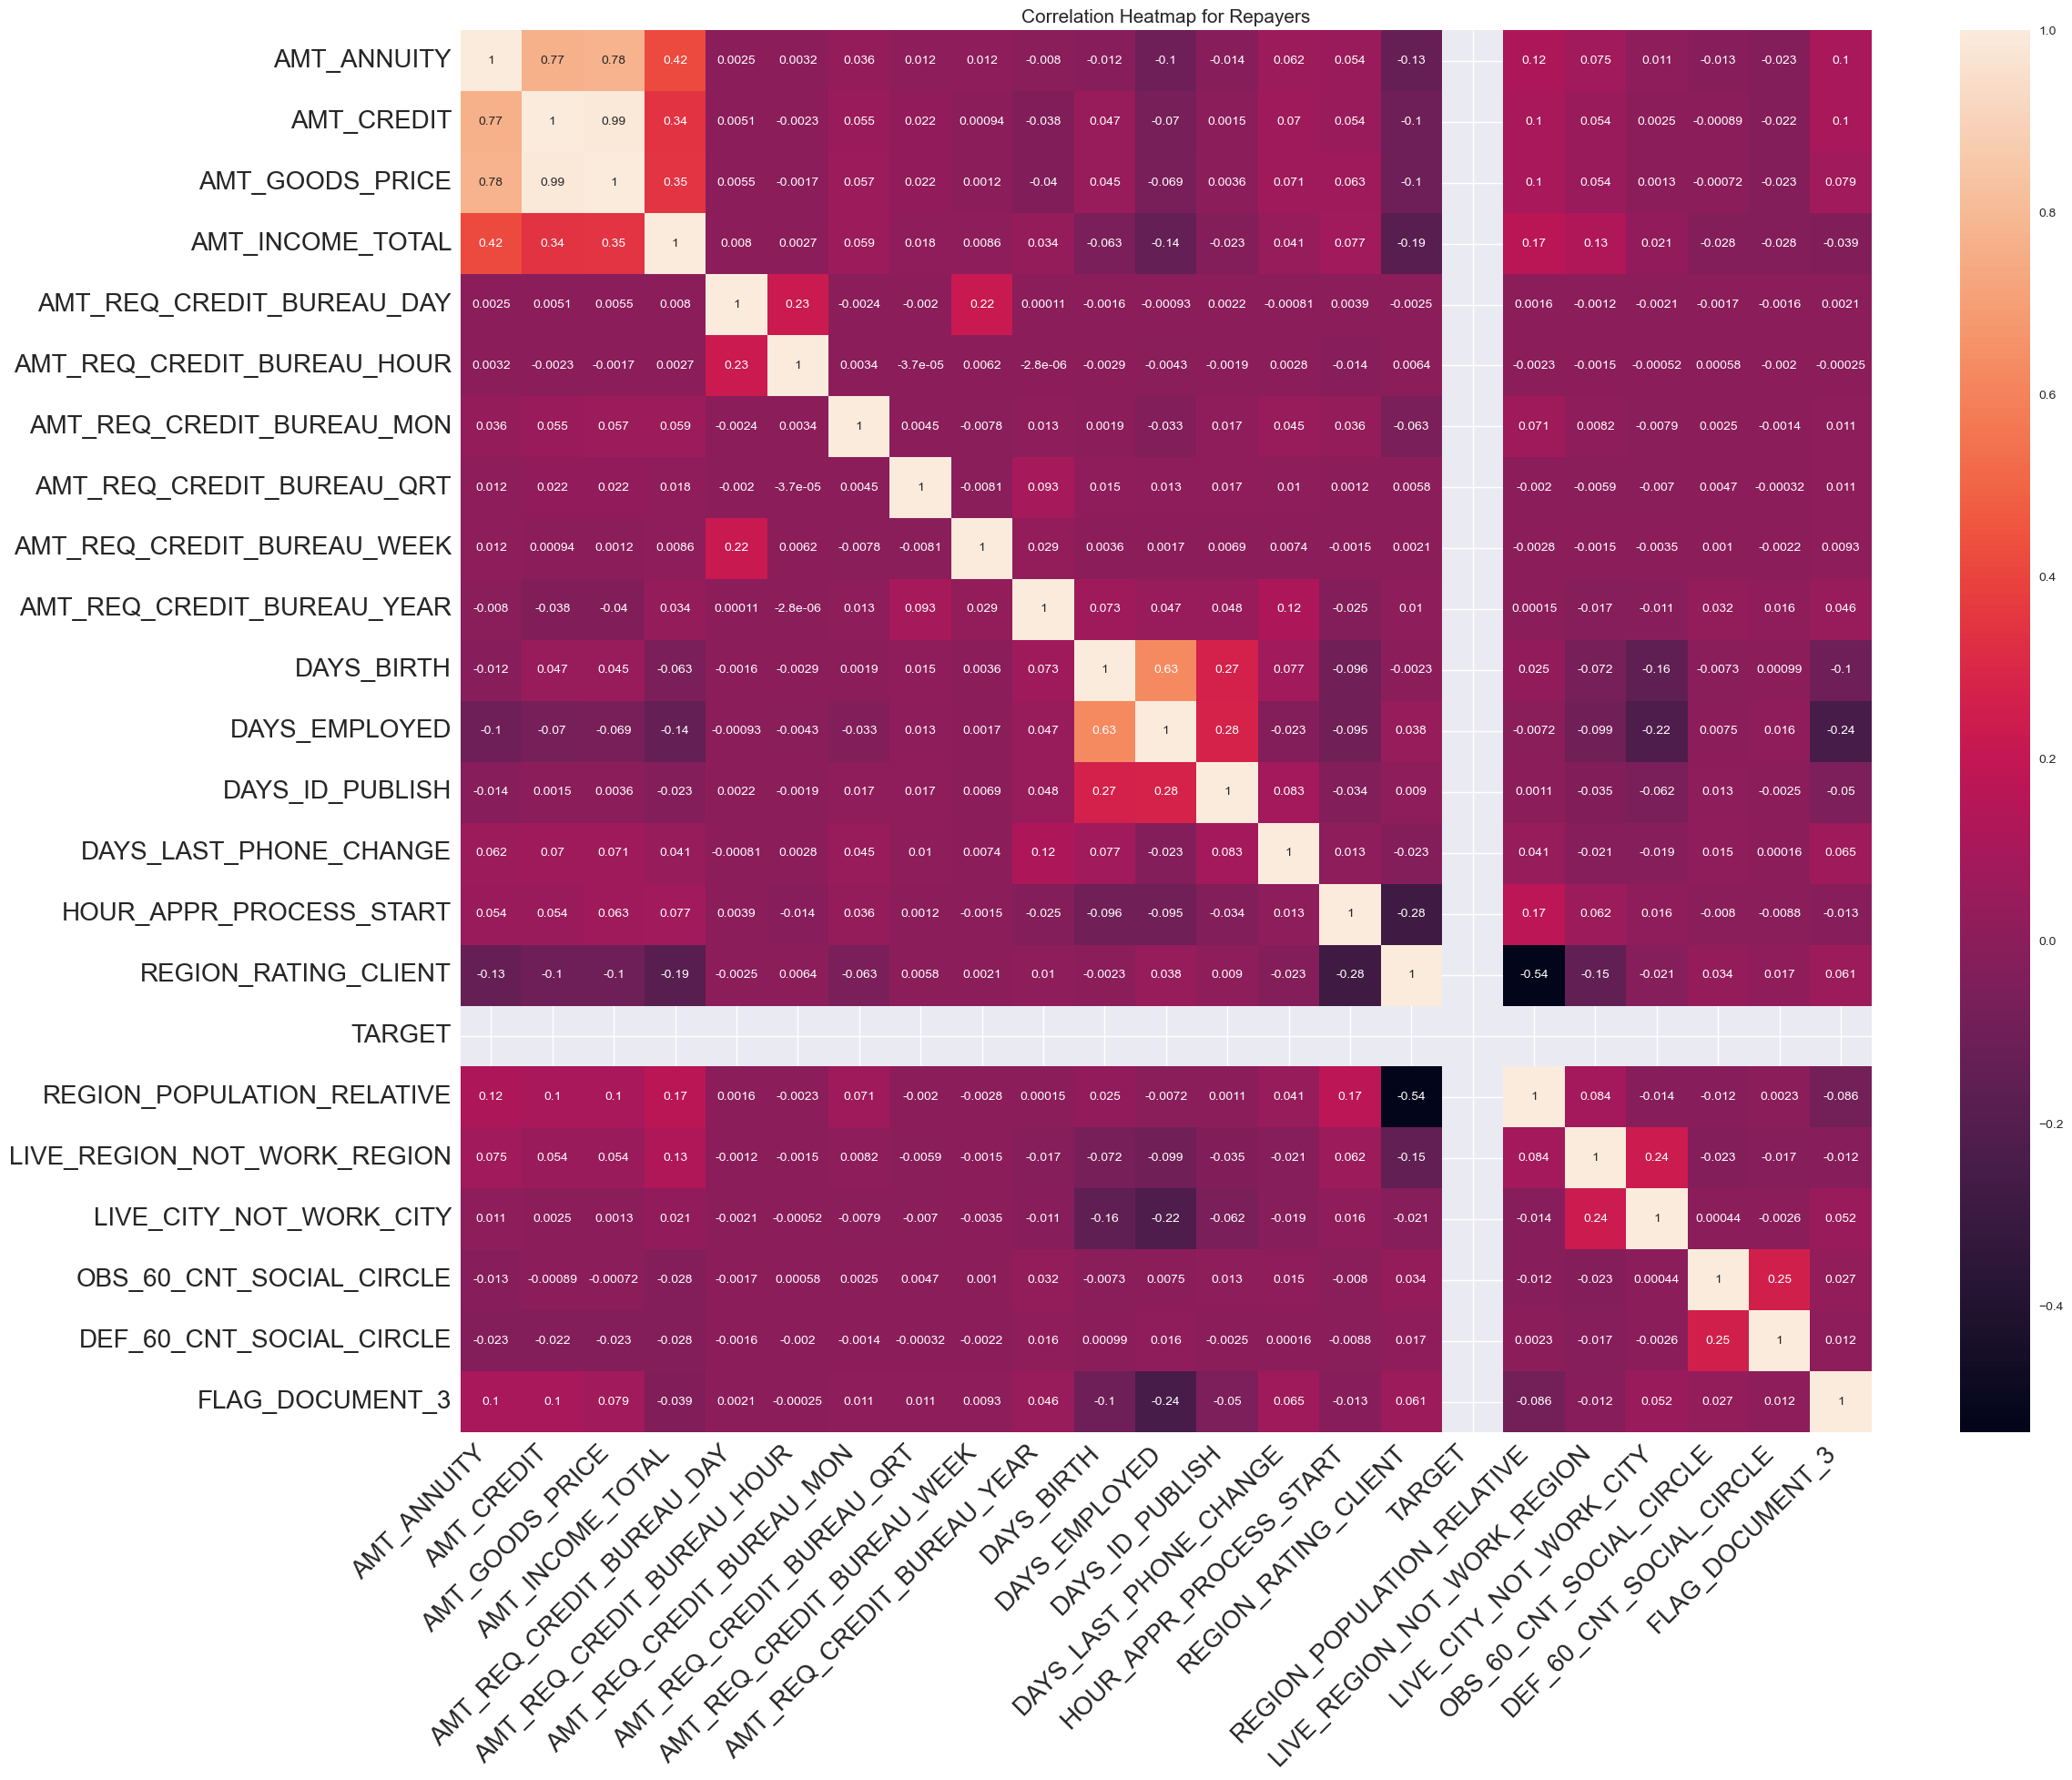

In [152]:
#  Creating a Heatmap to Visualize Linear Correlations Among Repayers

plt.figure(figsize=(25, 20))
hp = sns.heatmap(Repayer.corr(), annot=True)
hp.set_xticklabels(hp.get_xticklabels(), fontsize=20)
hp.set_yticklabels(hp.get_yticklabels(), fontsize=20)
plt.title("Correlation Heatmap for Repayers", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

### Observations:
from the above heatmap we can say that,

- AMT_CREDIT shows high correlation with AMT_ANNUITY , AMT_INCOME_TOTAL and AMT_GOODS_PRICE
- we can also see that DAYS_EMPLOYED also has a high correlation 

In [153]:
defaulter_corr = Defaulter.corr()
defaulter_corr_df = defaulter_corr.unstack().reset_index()
defaulter_corr_df.columns = ['variables1', 'variables2', 'Corr']
defaulter_corr_df = defaulter_corr_df[defaulter_corr_df['variables1'] != defaulter_corr_df['variables2']]
# defaulter_corr_df['Corr'] = defaulter_corr_df['Corr'].abs()
defaulter_corr_df.sort_values(by='Corr', ascending=False, inplace=True)
defaulter_top_corr = defaulter_corr_df.head(10)
defaulter_top_corr

variables1                variables2      Corr
47            AMT_GOODS_PRICE                AMT_CREDIT  0.983103
25                 AMT_CREDIT           AMT_GOODS_PRICE  0.983103
2                 AMT_ANNUITY           AMT_GOODS_PRICE  0.752699
46            AMT_GOODS_PRICE               AMT_ANNUITY  0.752699
1                 AMT_ANNUITY                AMT_CREDIT  0.752195
23                 AMT_CREDIT               AMT_ANNUITY  0.752195
241                DAYS_BIRTH             DAYS_EMPLOYED  0.582185
263             DAYS_EMPLOYED                DAYS_BIRTH  0.582185
481  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  0.264159
503  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  0.264159

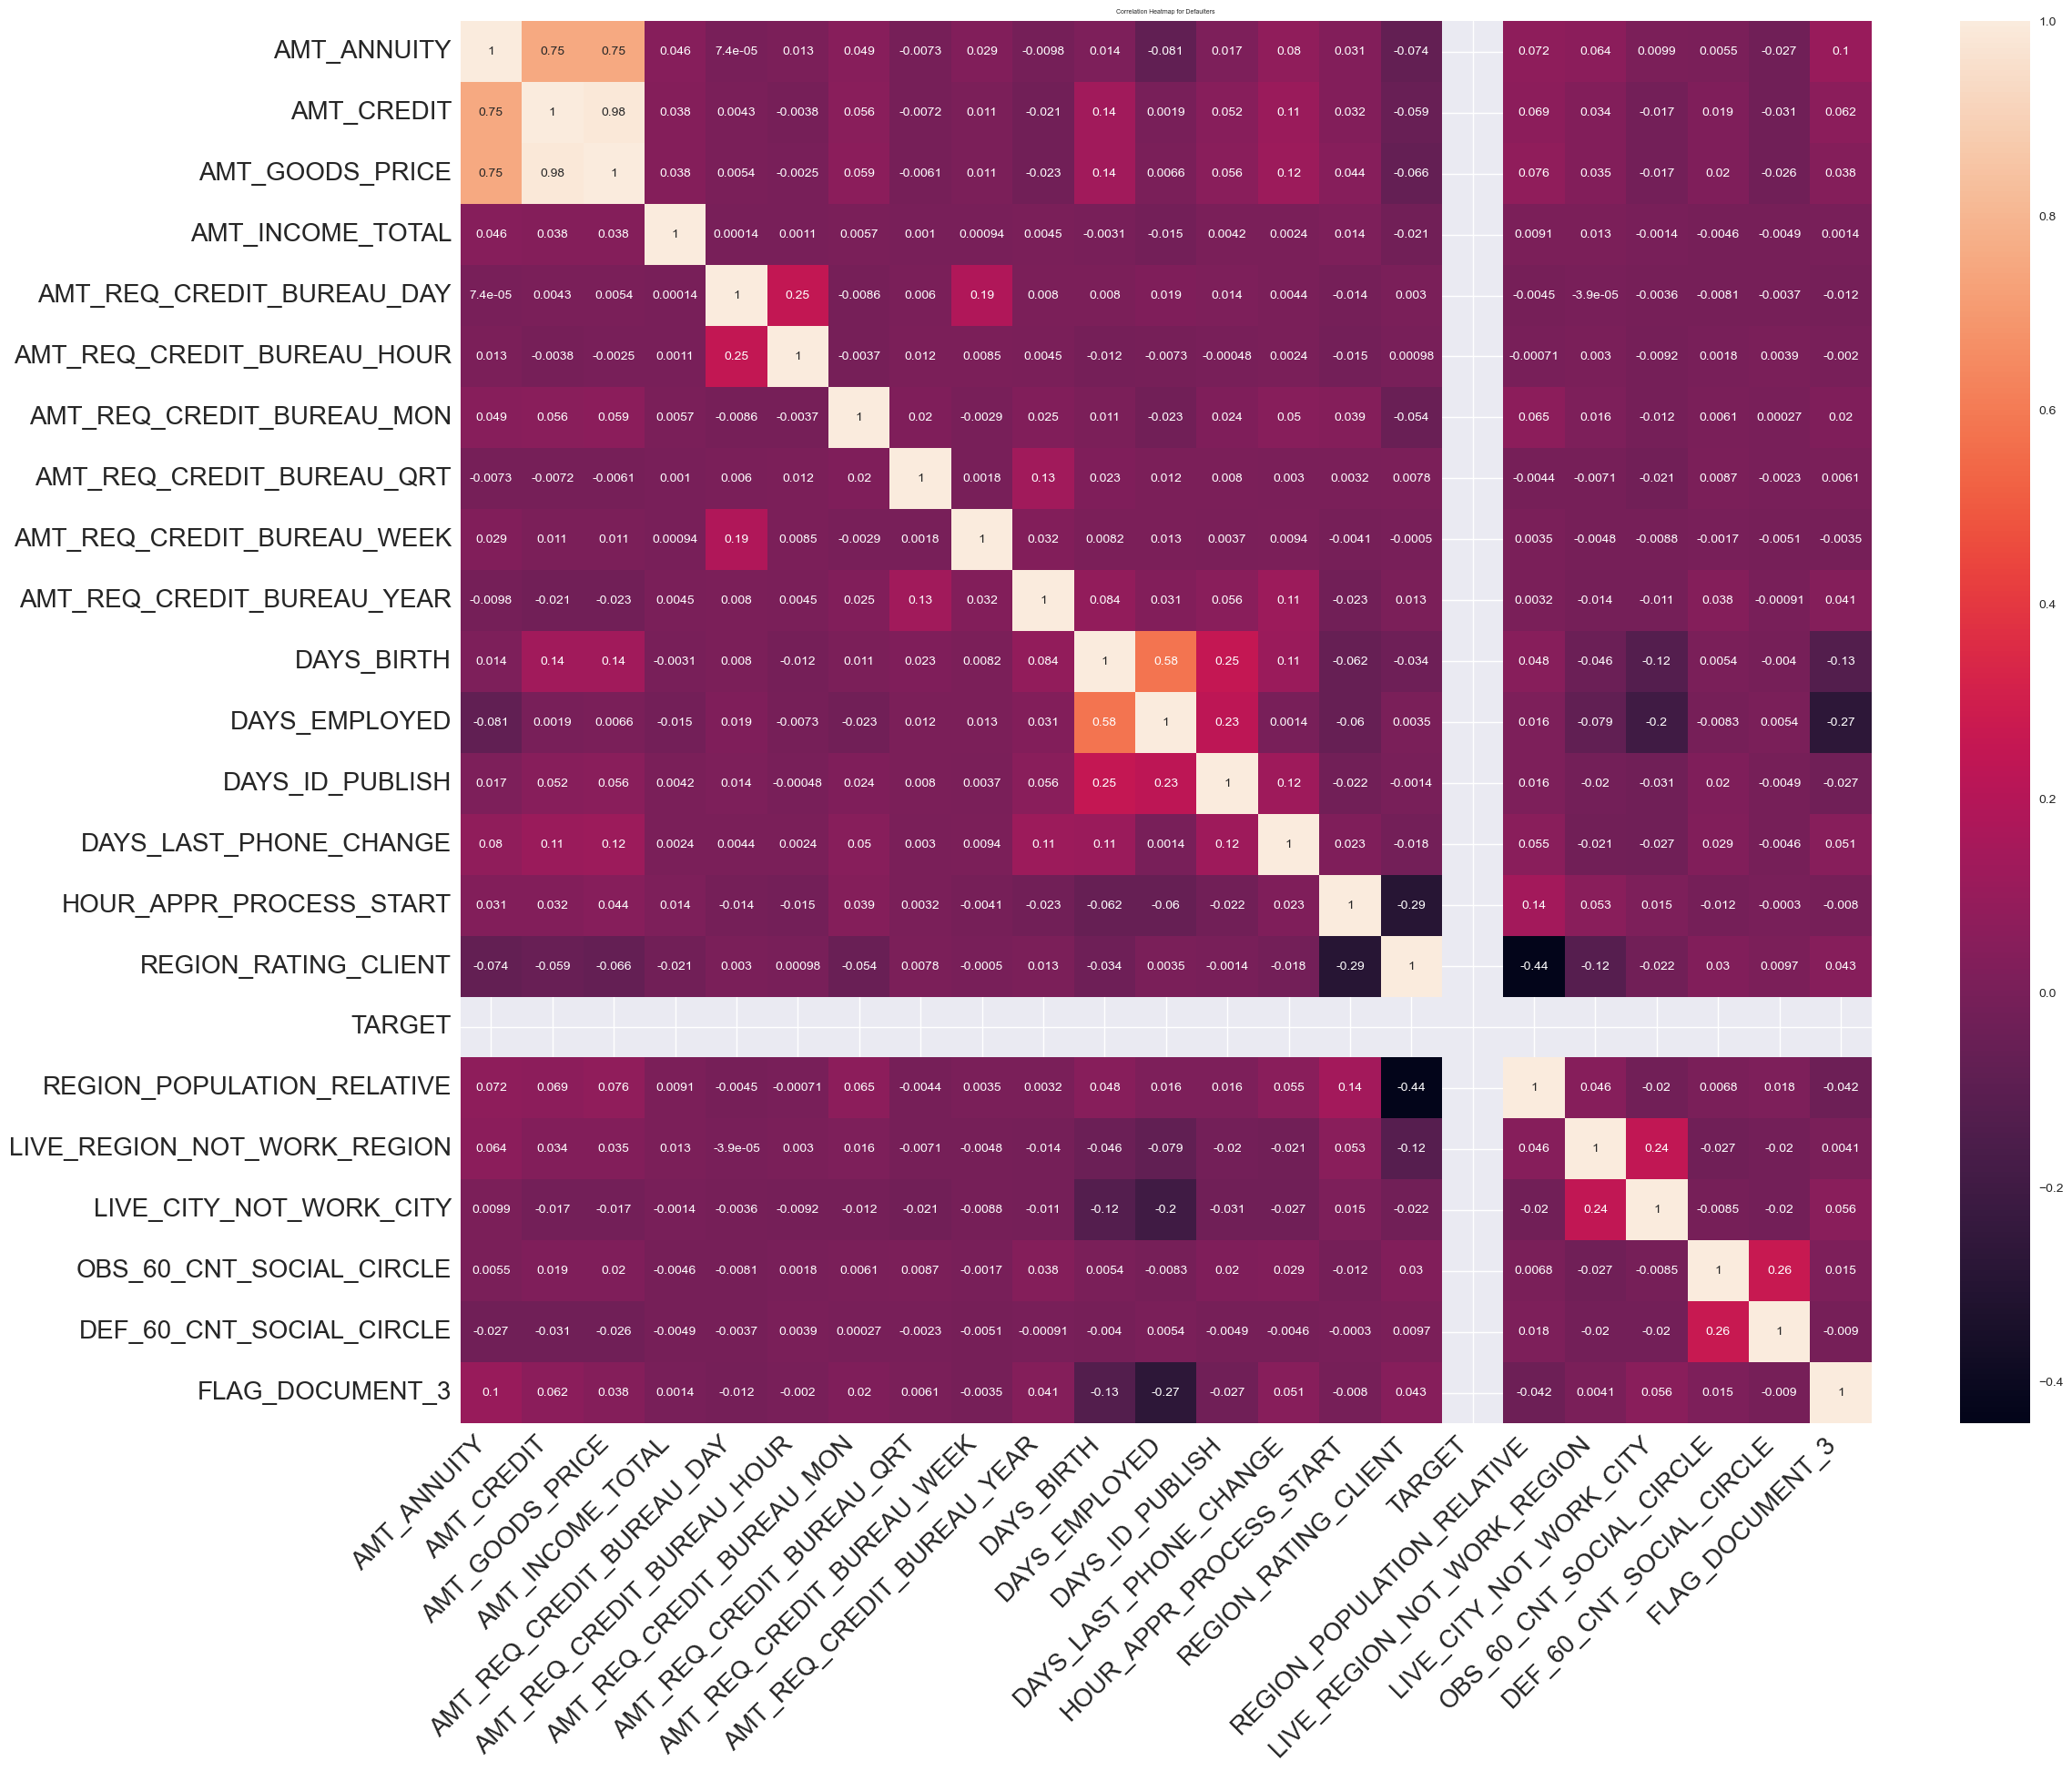

In [154]:
##  Creating a Heatmap to Visualize Linear Correlations Among Defaulters

plt.figure(figsize=(25, 20))
hp = sns.heatmap(Defaulter.corr(),annot=True)
hp.set_xticklabels(hp.get_xticklabels(), fontsize=20)
hp.set_yticklabels(hp.get_yticklabels(), fontsize=20)
plt.title("Correlation Heatmap for Defaulters", fontsize=5)
plt.xticks(rotation=45, ha='right')
plt.show()

In [155]:
# Plotting Distribution Plots for Numerical Columns Related to Amount to Visualize Density

amount_columns = application_data_df[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']]
amount_columns

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AMT_INCOME_TOTAL
0         4.065975      24700.5            3.510             2.025
1        12.935025      35698.5           11.295             2.700
2         1.350000       6750.0            1.350             0.675
3         3.126825      29686.5            2.970             1.350
4         5.130000      21865.5            5.130             1.215
...            ...          ...              ...               ...
307506    2.547000      27558.0            2.250             1.575
307507    2.695500      12001.5            2.250             0.720
307508    6.776640      29979.0            5.850             1.530
307509    3.701070      20205.0            3.195             1.710
307510    6.750000      49117.5            6.750             1.575

[307511 rows x 4 columns]

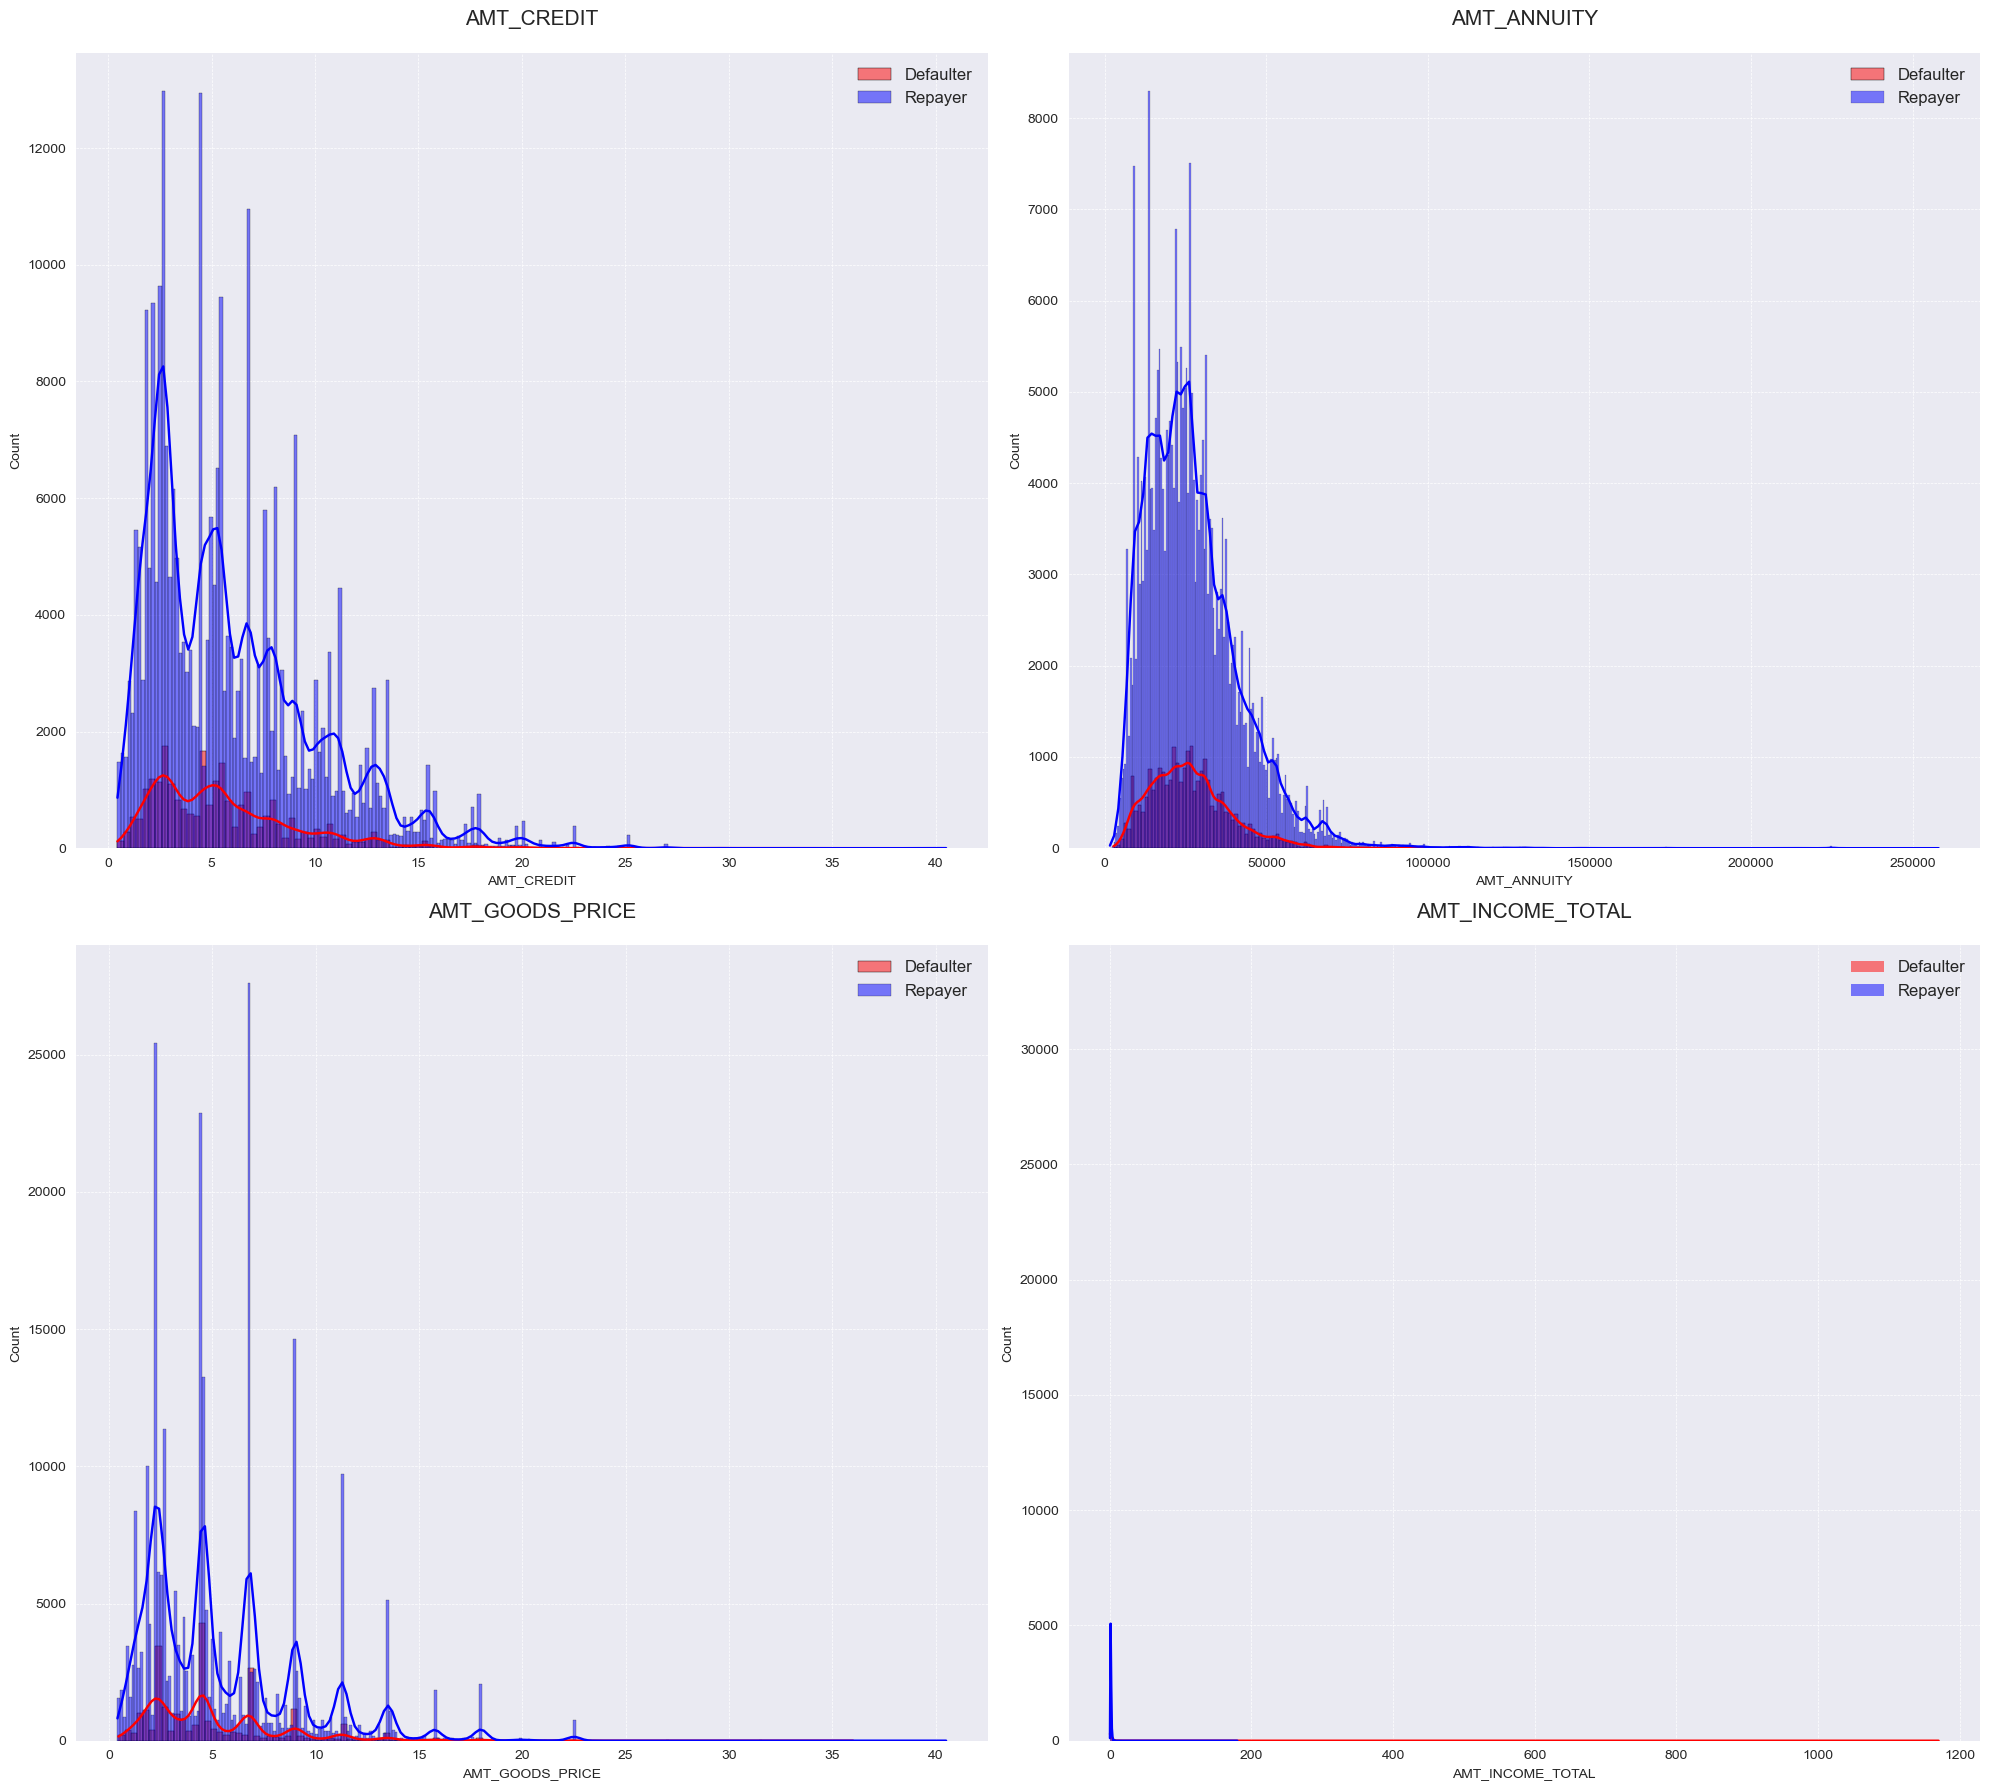

In [156]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

for col, ax in zip(amount_columns, axes.flat):
    sns.histplot(Defaulter[col], kde=True, label="Defaulter", ax=ax, color="red", alpha=0.5)
    sns.histplot(Repayer[col], kde=True, label="Repayer", ax=ax,color="blue", alpha=0.5)
    ax.set_title(col, fontdict={'fontsize': 20, 'fontweight': 5}, pad=20)
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)


plt.grid(True)    
plt.tight_layout()
plt.show()


In [157]:
sns.histplot(Defaulter[col], kde=True, label="Defaulter", ax=ax, color="red", alpha=0.5)
sns.histplot(Repayer[col], kde=True, label="Repayer", ax=ax, color="blue", alpha=0.5)
ax.set_title(col, fontdict={'fontsize': 15, 'fontweight': 'bold'}, pad=20)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xlabel("X-axis Label", fontsize=12)
ax.set_ylabel("Y-axis Label", fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

- The credit amount for the loan is predominantly below 10 lakhs.
- Most individuals make annuity payments below 50,000 for the credited loan.
- The distribution of repayers and defaulters overlaps in all the plots,

<Figure size 1500x1500 with 0 Axes>

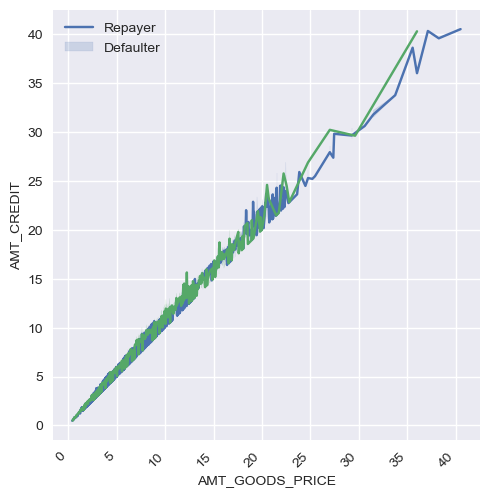

In [158]:
#  Checking the Relationship Between Goods Price and Credit Amount and Comparing it with Loan Repayment Status
plt.figure(figsize=[15,15])
sns.relplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=application_data_df, hue='TARGET',kind='line',legend = False)
plt.legend(labels=['Repayer','Defaulter'])
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
    


 - An increase in defaulters is observed when the credit amount exceeds 25 lakhs.

<Figure size 1000x800 with 0 Axes>

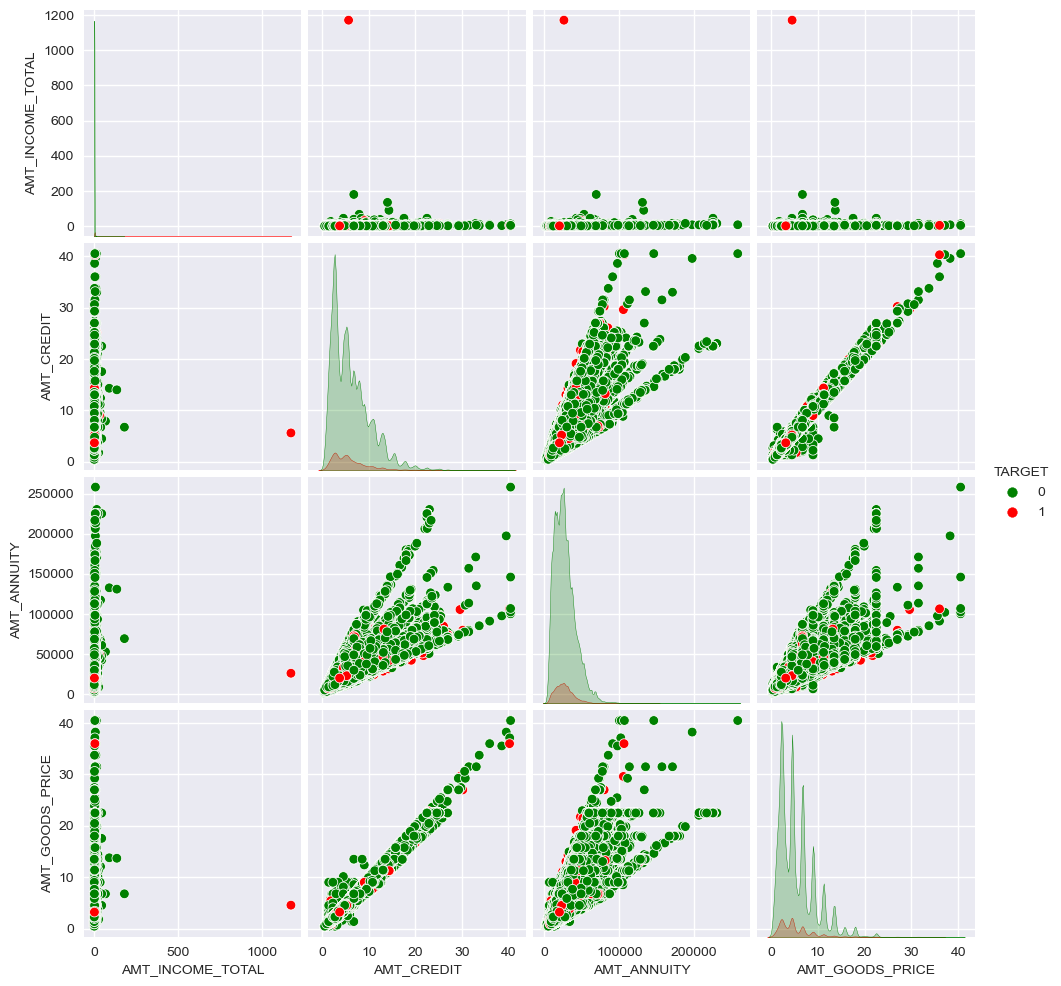

In [159]:

column_amount = application_data_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = column_amount[(column_amount["AMT_GOODS_PRICE"].isnull() == False) & (column_amount["AMT_ANNUITY"].isnull() == False)]


plt.figure(figsize=(10, 8))

pairplot = sns.pairplot(amount, hue="TARGET", palette=["green", "red"])
# pairplot.fig.legend(labels=['Defaulter', 'Repayer'])
plt.show()


- AMT_CREDIT and AMT_GOODS_PRICE exhibit a strong correlation, evident from the scatterplot where the data cluster along a line.
- defaulters are significantly less for Loan Amounts exceeding 20 lakhs.
- When the Annuity Amount is greater than 15,000 and the Goods Price Amount exceeds 20 lakhs, the likelihood of defaulters decreases.


In [160]:
# combining application_data_df and previous_application_df on SK_ID_CURR with Inner Joins
combined_df = pd.merge(application_data_df, previous_application_df, how='inner', on='SK_ID_CURR')
combined_df.head()

AMT_ANNUITY_x  AMT_CREDIT_x  AMT_GOODS_PRICE_x  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  FLAG_MOBIL FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE_x            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE NAME_INCOME_TYPE NAME_TYPE_SUITE_x  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  SK_ID_CURR  TARGET WEEKDAY_APPR_PROCESS_START TOTAL_YEARS_OF_EMPLOYMENT RANGE_AMT_CREDIT RANGE_AMT_INCOME RANGE_AMT_GOODS_PRICE  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL DECISION_YEAR
0        24700.5      4.065975              3.510             2.025                        0.0                         0.0                        0.0                        0.0                         0.0                         1.0            0             1.0           M        9461            637             2120                  1134.0             3648.0                       2.0                       2.0                1           1               Y                       10                        0                            0           Cash loans  Secondary / secondary special  Single / not married  House / apartment          Working     Unaccompanied                       2.0                       2.0        Laborers  Business Entity Type 3                    0.018801                     2                           2                      0                      0                          0                          0      100002       1                  WEDNESDAY                       0-5            4L-5L            2L-3L                 3L-4L     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP           Unknown              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest            365243.0           565.0                      125.0           25.0              17.0                        0.0             2
1        35698.5     12.935025             11.295             2.700                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             2.0           F       16765           1188              291                   828.0             1186.0                       0.0                       0.0                1           1               N                       11                        0                            0           Cash loans               Higher education               Married  House / apartment    State servant            Family                       1.0                       1.0      Core staff                  School                   

In [161]:
combined_df.shape

(1413701, 79)

In [162]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   AMT_ANNUITY_x                1413608 non-null  float64 
 1   AMT_CREDIT_x                 1413701 non-null  float64 
 2   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 3   AMT_INCOME_TOTAL             1413701 non-null  float64 
 4   AMT_REQ_CREDIT_BUREAU_DAY    1413701 non-null  float64 
 5   AMT_REQ_CREDIT_BUREAU_HOUR   1413701 non-null  float64 
 6   AMT_REQ_CREDIT_BUREAU_MON    1413701 non-null  float64 
 7   AMT_REQ_CREDIT_BUREAU_QRT    1413701 non-null  float64 
 8   AMT_REQ_CREDIT_BUREAU_WEEK   1413701 non-null  float64 
 9   AMT_REQ_CREDIT_BUREAU_YEAR   1413701 non-null  float64 
 10  CNT_CHILDREN                 1413701 non-null  category
 11  CNT_FAM_MEMBERS              1413701 non-null  category
 12  CODE_GENDER                 

In [163]:
combined_repayer = combined_df[combined_df['TARGET']==0]
combined_defaulter = combined_df[combined_df['TARGET']==1]

In [164]:
combined_repayer

AMT_ANNUITY_x  AMT_CREDIT_x  AMT_GOODS_PRICE_x  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  FLAG_MOBIL FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE_x            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE      NAME_INCOME_TYPE NAME_TYPE_SUITE_x  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  SK_ID_CURR  TARGET WEEKDAY_APPR_PROCESS_START TOTAL_YEARS_OF_EMPLOYMENT RANGE_AMT_CREDIT RANGE_AMT_INCOME RANGE_AMT_GOODS_PRICE  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL DECISION_YEAR
1              35698.5     12.935025             11.295             2.700                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             2.0           F       16765           1188              291                   828.0             1186.0                       0.0                       0.0                1           1               N                       11                        0                            0           Cash loans               Higher education               Married  House / apartment         State servant            Family                       1.0                       1.0      Core staff                  School                    0.003541                     1                           1                      0                      0                          0                          0      100003       0                     MONDAY                       0-5              NaN            2L-3L                   NaN     1810518           Cash loans      98356.995         900000.0     1035882.0           900000.0                    XNA             Approved            746                    XNA                XAP     Unaccompanied         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0       low_normal             Cash X-Sell: low            365243.0           716.0                      386.0          536.0             527.0                        1.0             3
2              35698.5     12.935025             11.295             2.700                        0.0                         0.0                        0.0                        0.0                         0.0                         0.0            0             2.0           F       16765           1188              291                   828.0             1186.0                       0.0                       0.0                1           1               N                       11                        0                            0           Cash loans               Higher education               Married  House / apartment         State servant            Family                       1.0                       1.0      Core staff                

In [165]:
combined_defaulter

AMT_ANNUITY_x  AMT_CREDIT_x  AMT_GOODS_PRICE_x  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR CNT_CHILDREN CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  FLAG_MOBIL FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE_x            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE      NAME_INCOME_TYPE NAME_TYPE_SUITE_x  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  SK_ID_CURR  TARGET WEEKDAY_APPR_PROCESS_START TOTAL_YEARS_OF_EMPLOYMENT RANGE_AMT_CREDIT RANGE_AMT_INCOME RANGE_AMT_GOODS_PRICE  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL DECISION_YEAR
0              24700.5      4.065975              3.510             2.025                        0.0                         0.0                        0.0                        0.0                         0.0                         1.0            0             1.0           M        9461            637             2120                  1134.0             3648.0                       2.0                       2.0                1           1               Y                       10                        0                            0           Cash loans  Secondary / secondary special  Single / not married  House / apartment               Working     Unaccompanied                       2.0                       2.0        Laborers  Business Entity Type 3                    0.018801                     2                           2                      0                      0                          0                          0      100002       1                  WEDNESDAY                       0-5            4L-5L            2L-3L                 3L-4L     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP           Unknown              New                  Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest            365243.0           565.0                      125.0           25.0              17.0                        0.0             2
161            35028.0     11.935800              8.550             2.025                        0.0                         0.0                        2.0                        0.0                         0.0                         4.0            0             2.0           M       17482           1262             1029                  1075.0             1182.0                       0.0                       0.0                1           1               Y                        9                        0                            0           Cash loans  Secondary / secondary special               Married  House / apartment  Commercial associate     Unaccompanied                       0.0                       0.0        Laborers  Busine

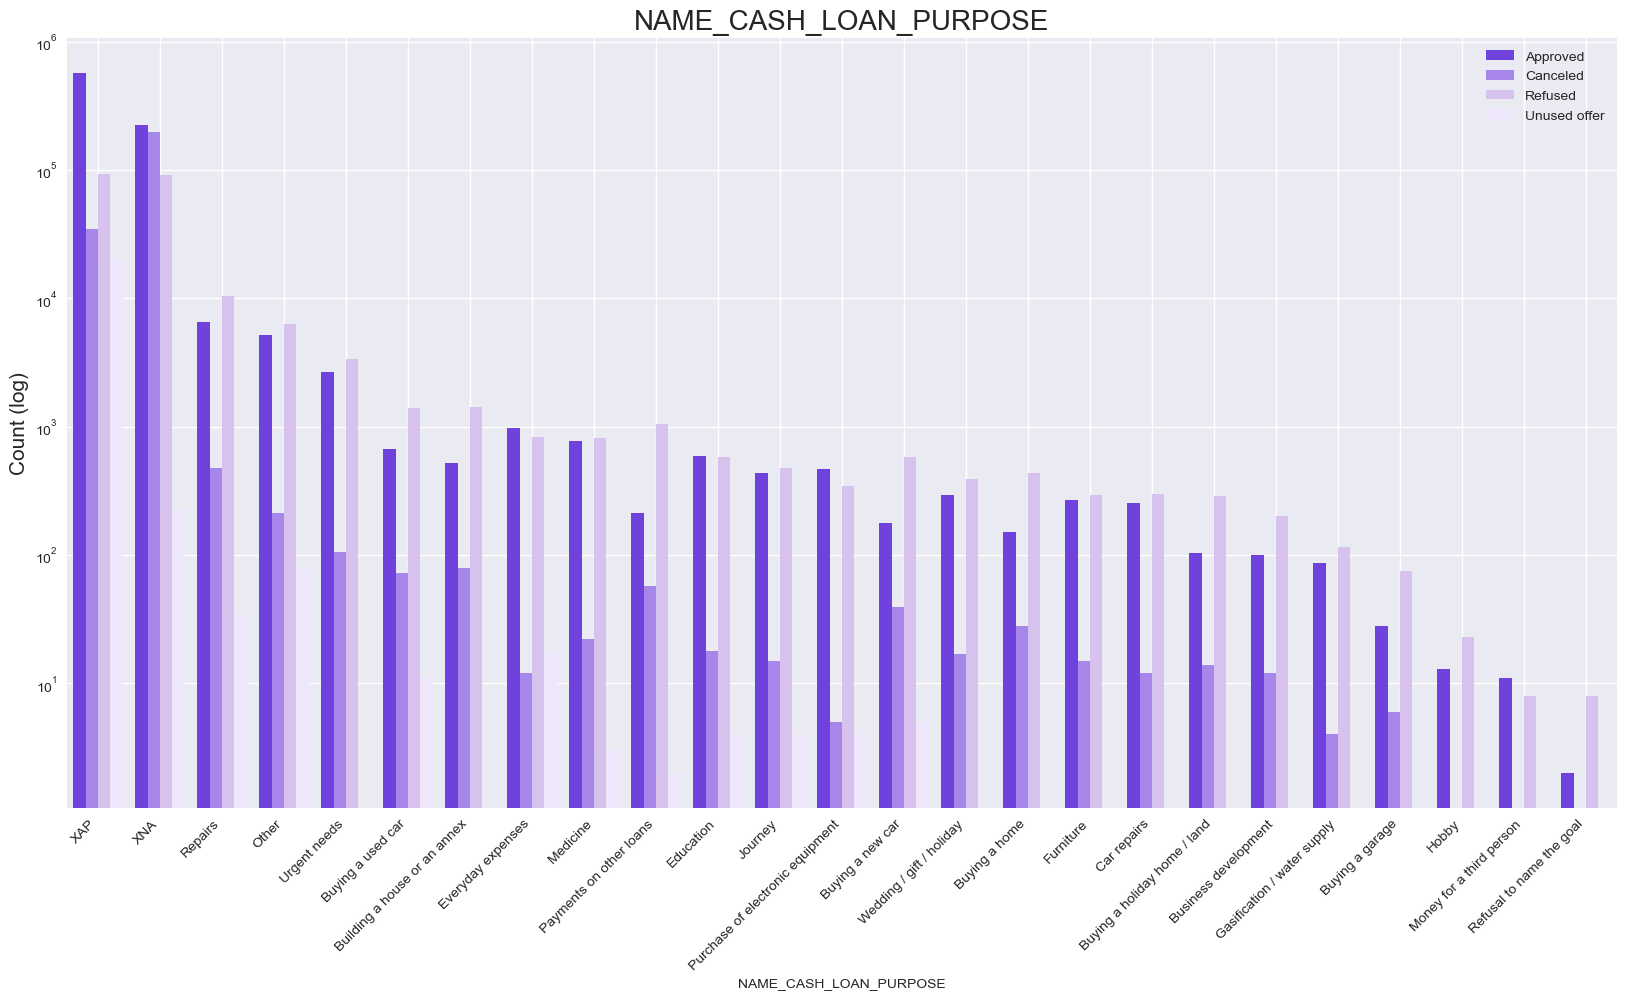

In [176]:
# Plotting Contract Status Against the Purpose of the Loan
plt.figure(figsize=(20,10))
ax=sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=combined_repayer,hue= 'NAME_CONTRACT_STATUS',palette=["#6528F7","#A076F9","#D7BBF5","#EDE4FF"],order=combined_repayer['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=15)     
plt.title('NAME_CASH_LOAN_PURPOSE' , fontsize=20) 
plt.legend(loc = "upper right")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

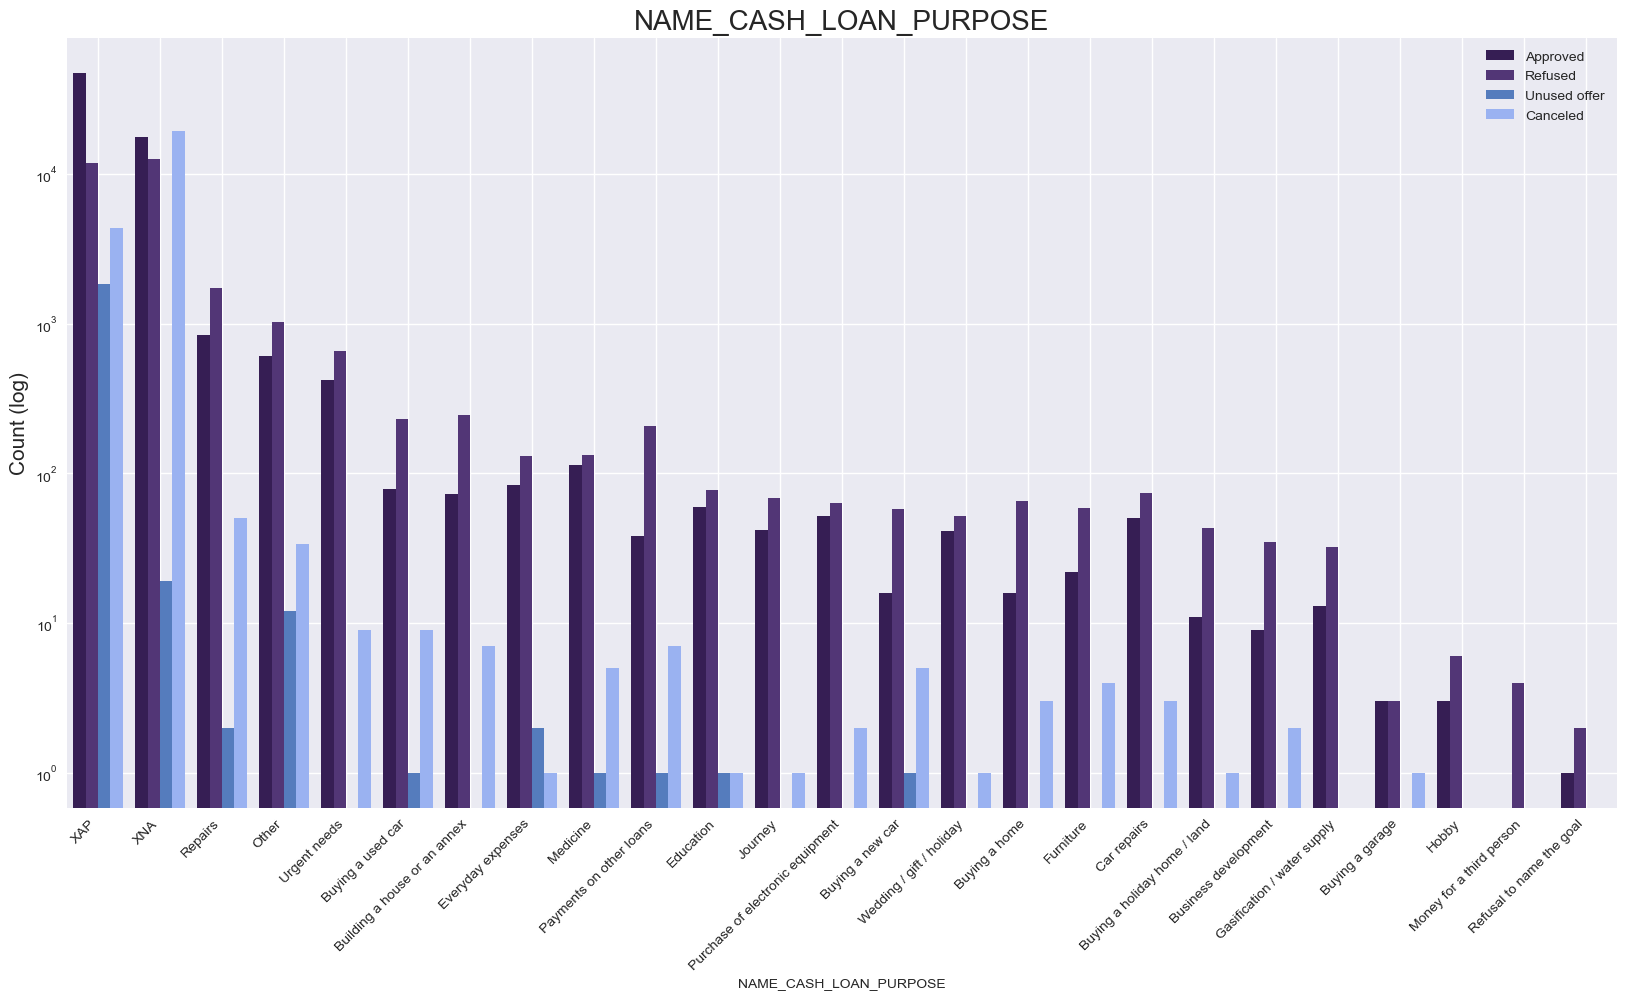

In [175]:
# Plotting Contract Status Against the Purpose of the Loan
plt.figure(figsize=(20,10))
ax=sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=combined_defaulter,hue= 'NAME_CONTRACT_STATUS',palette=["#35155D","#512B81","#4477CE","#8CABFF"],order=combined_repayer['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=15)     
plt.title('NAME_CASH_LOAN_PURPOSE' , fontsize=20) 
plt.legend(loc = "upper right")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Observations:
from the above plot, we can say that,
- the loan purpose is higher for unknow reasons like(XAP,XNA)
- loan approved for repair purpose seems to have higher default repayer
- Applications for Repair or Other purposes face a high rejection/refusal rate. This suggests that the bank considers Repair loans as high risk. Applicants are either rejected outright or offered loans with unfeasibly high interest rates, leading to client refusals


In [174]:
previous_application_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

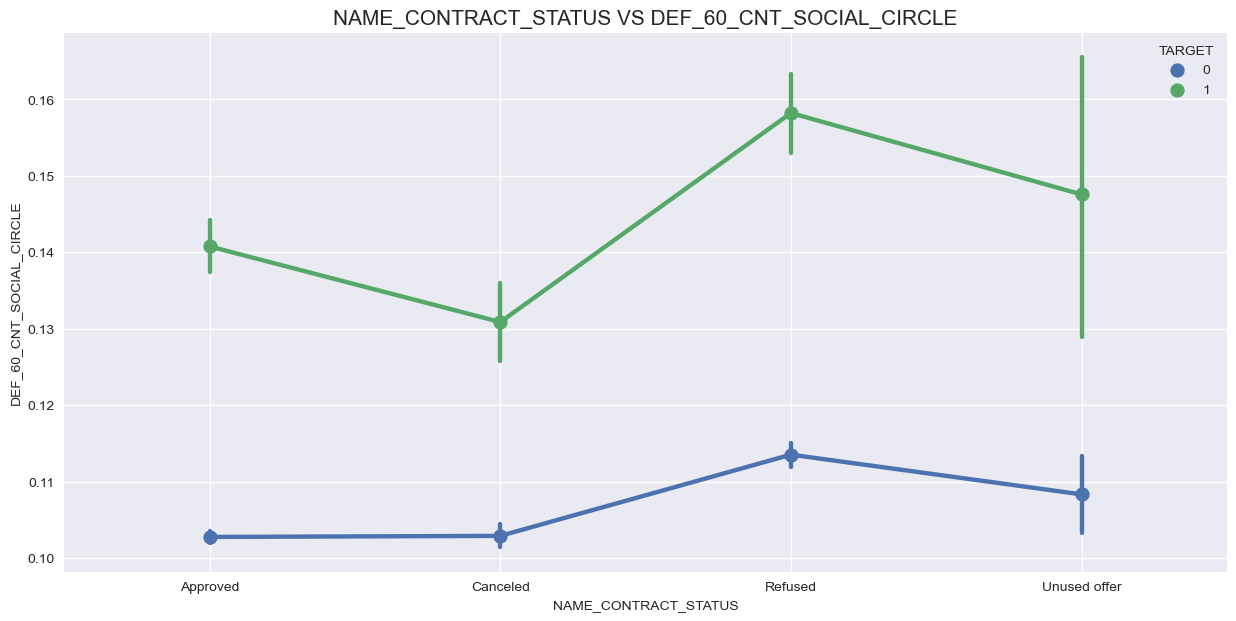

In [168]:
# Visualizing the Relationship Between Clients with Recent Default and Their Social Circle, Along with Contact Status
plt.figure(figsize=(15,7))
sns.pointplot(x='NAME_CONTRACT_STATUS', y='DEF_60_CNT_SOCIAL_CIRCLE', hue='TARGET', data=combined_df)
plt.title("NAME_CONTRACT_STATUS VS DEF_60_CNT_SOCIAL_CIRCLE",fontsize = 15)
plt.grid(True)


- Applicants with an average DEF_60_CNT_SOCIAL_CIRCLE score of 0.13 and above are more likely to no repay the loan , so identifying a applicant's social circle can help pay off the loan.

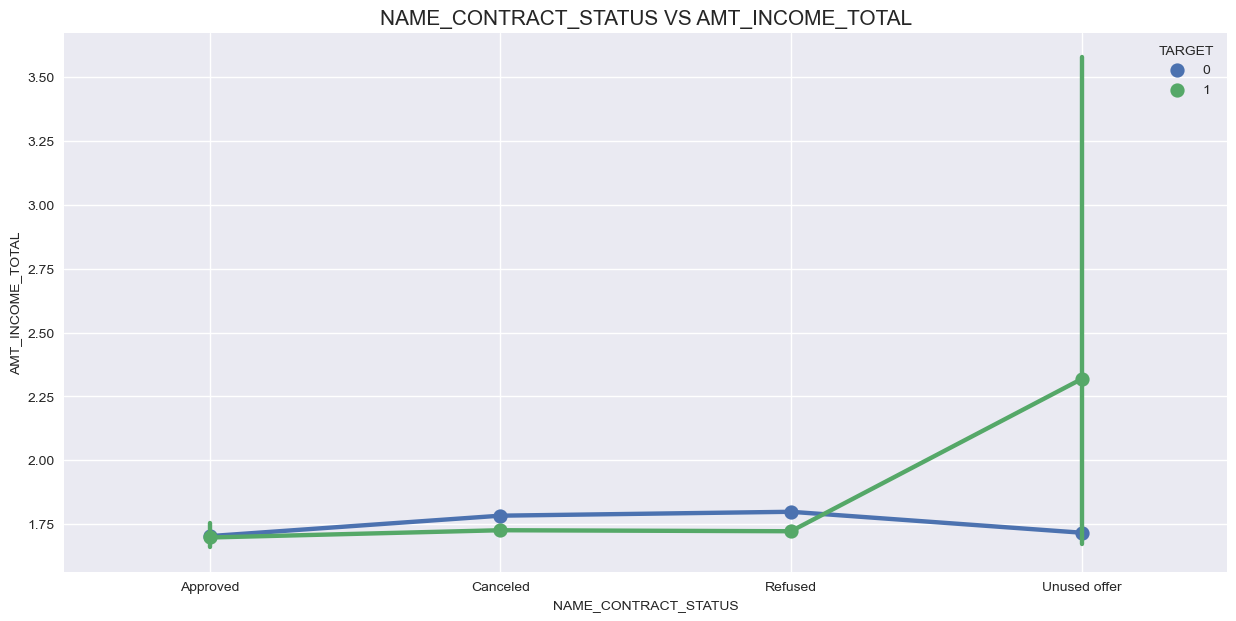

In [169]:
# Plotting the Relationship Between Total Income and Contact Status
plt.figure(figsize=(15,7))
sns.pointplot(x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', hue='TARGET', data=combined_df)
plt.title("NAME_CONTRACT_STATUS VS AMT_INCOME_TOTAL",fontsize = 15)
plt.grid(True)


The graph shows applicants who have unused approved loan also defaulted despite having a higher average income than others.